In [4]:
%reset -f

# Module imports
import seaborn as sns
from pandas import DataFrame, concat, Series
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
path = 'EEGEyeState_Training.arff.csv'
lag = 0
df = pd.read_csv(path)
df_values = df.values
df_values_count = len(df_values)
df_headers = df.columns
df_header_count = len(df_headers)
print('DF size before outlier removal: ' + str(df_values_count))

DF size before outlier removal: 10000


# Data Representation

### Box Plot EEG Eye State data set representation

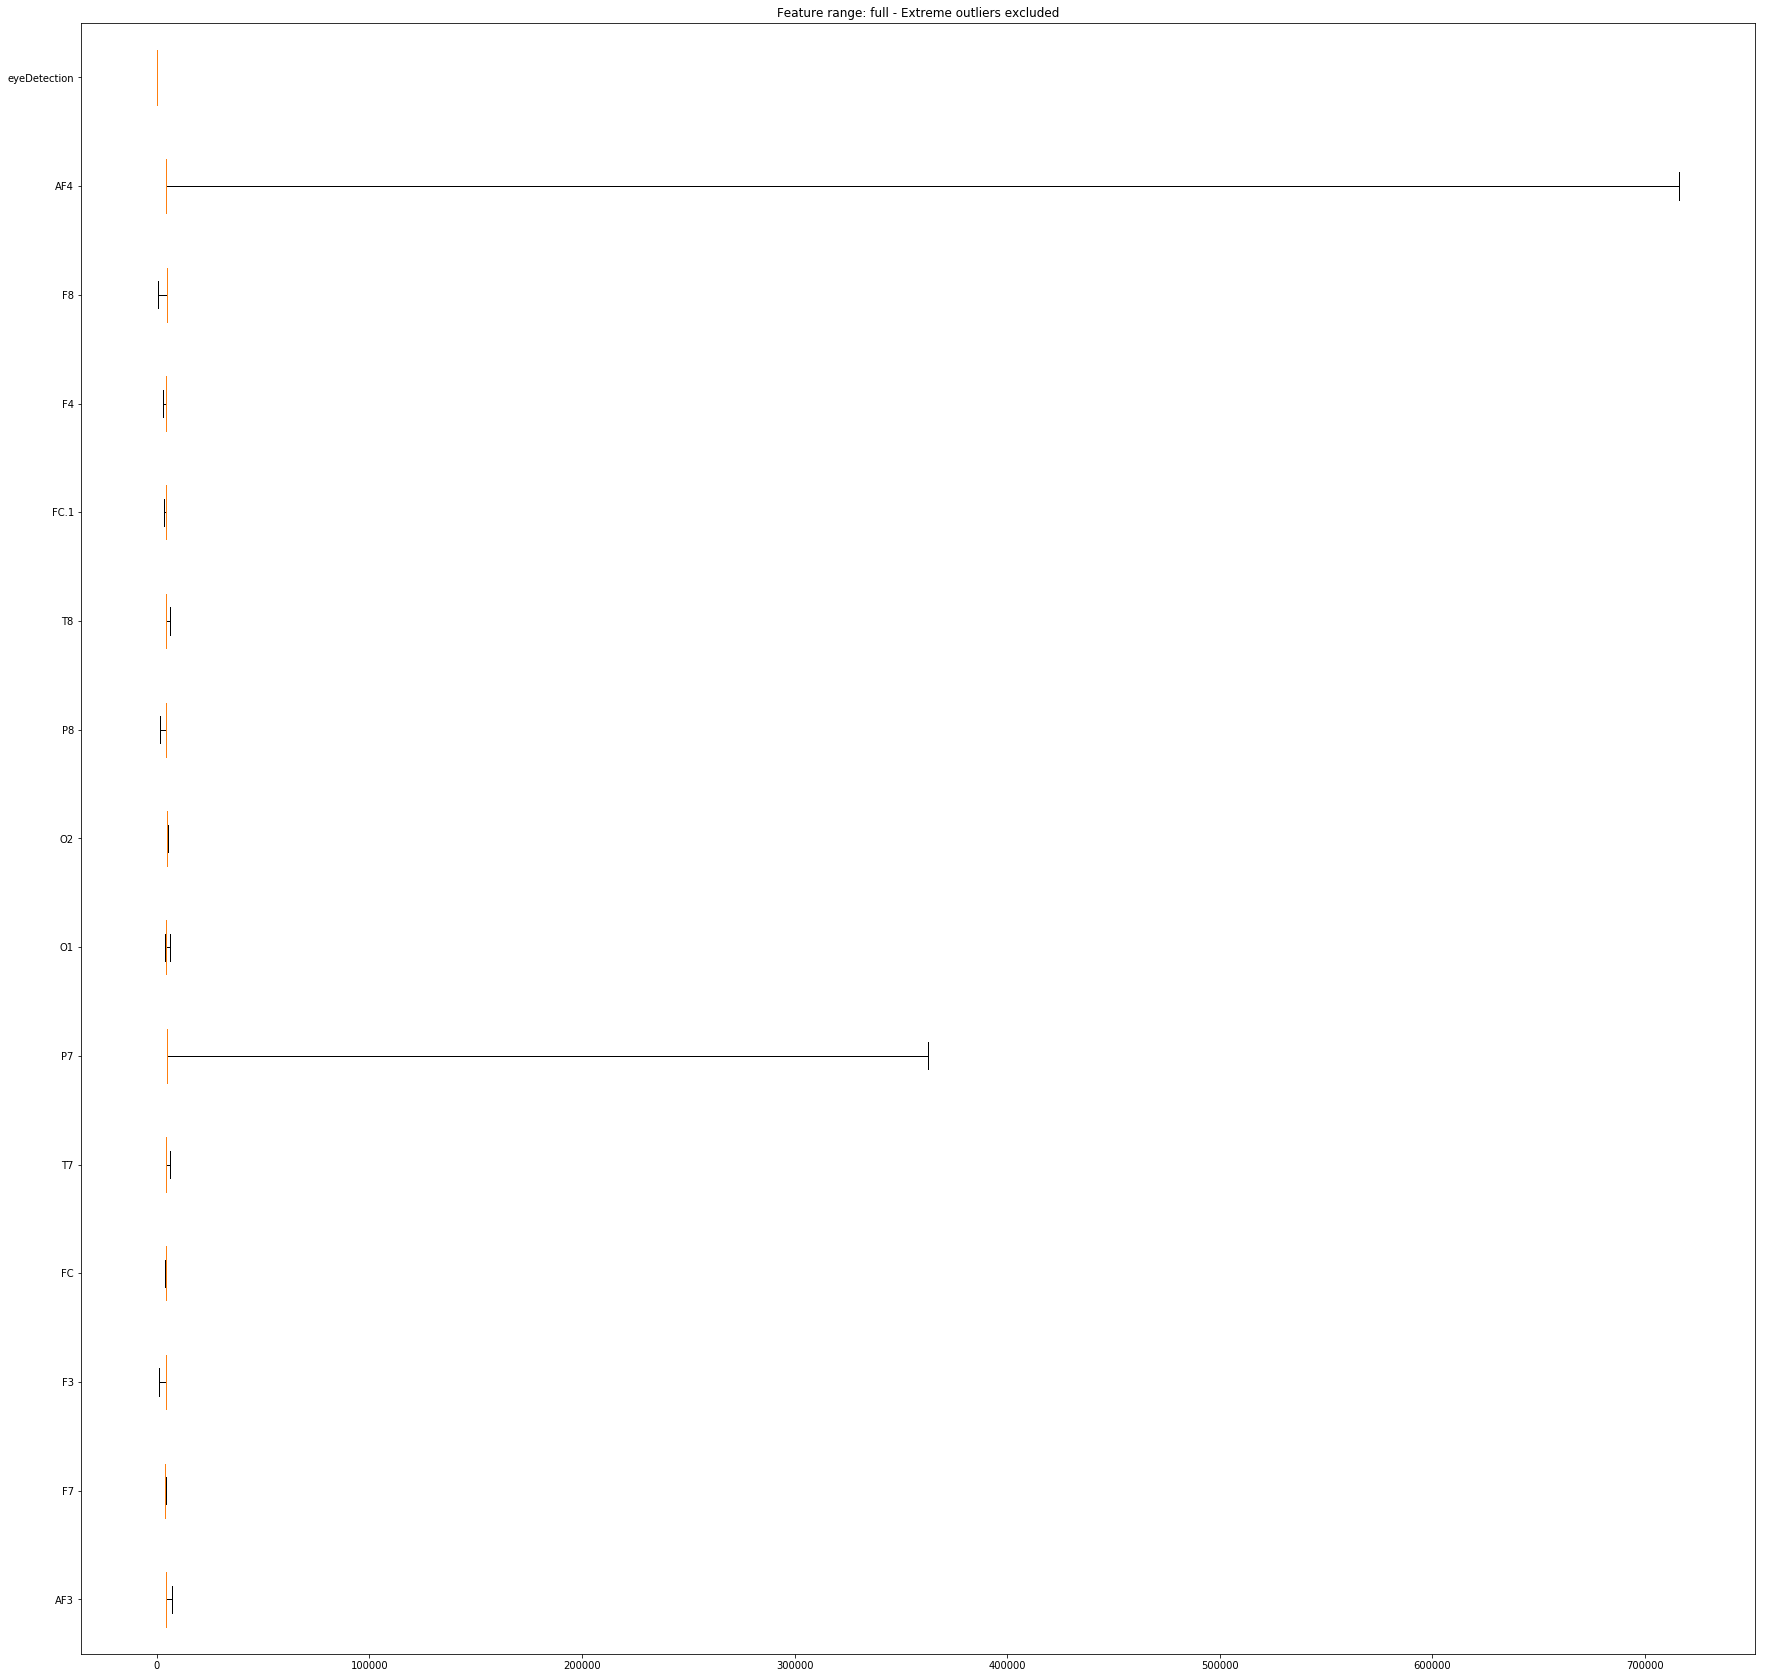

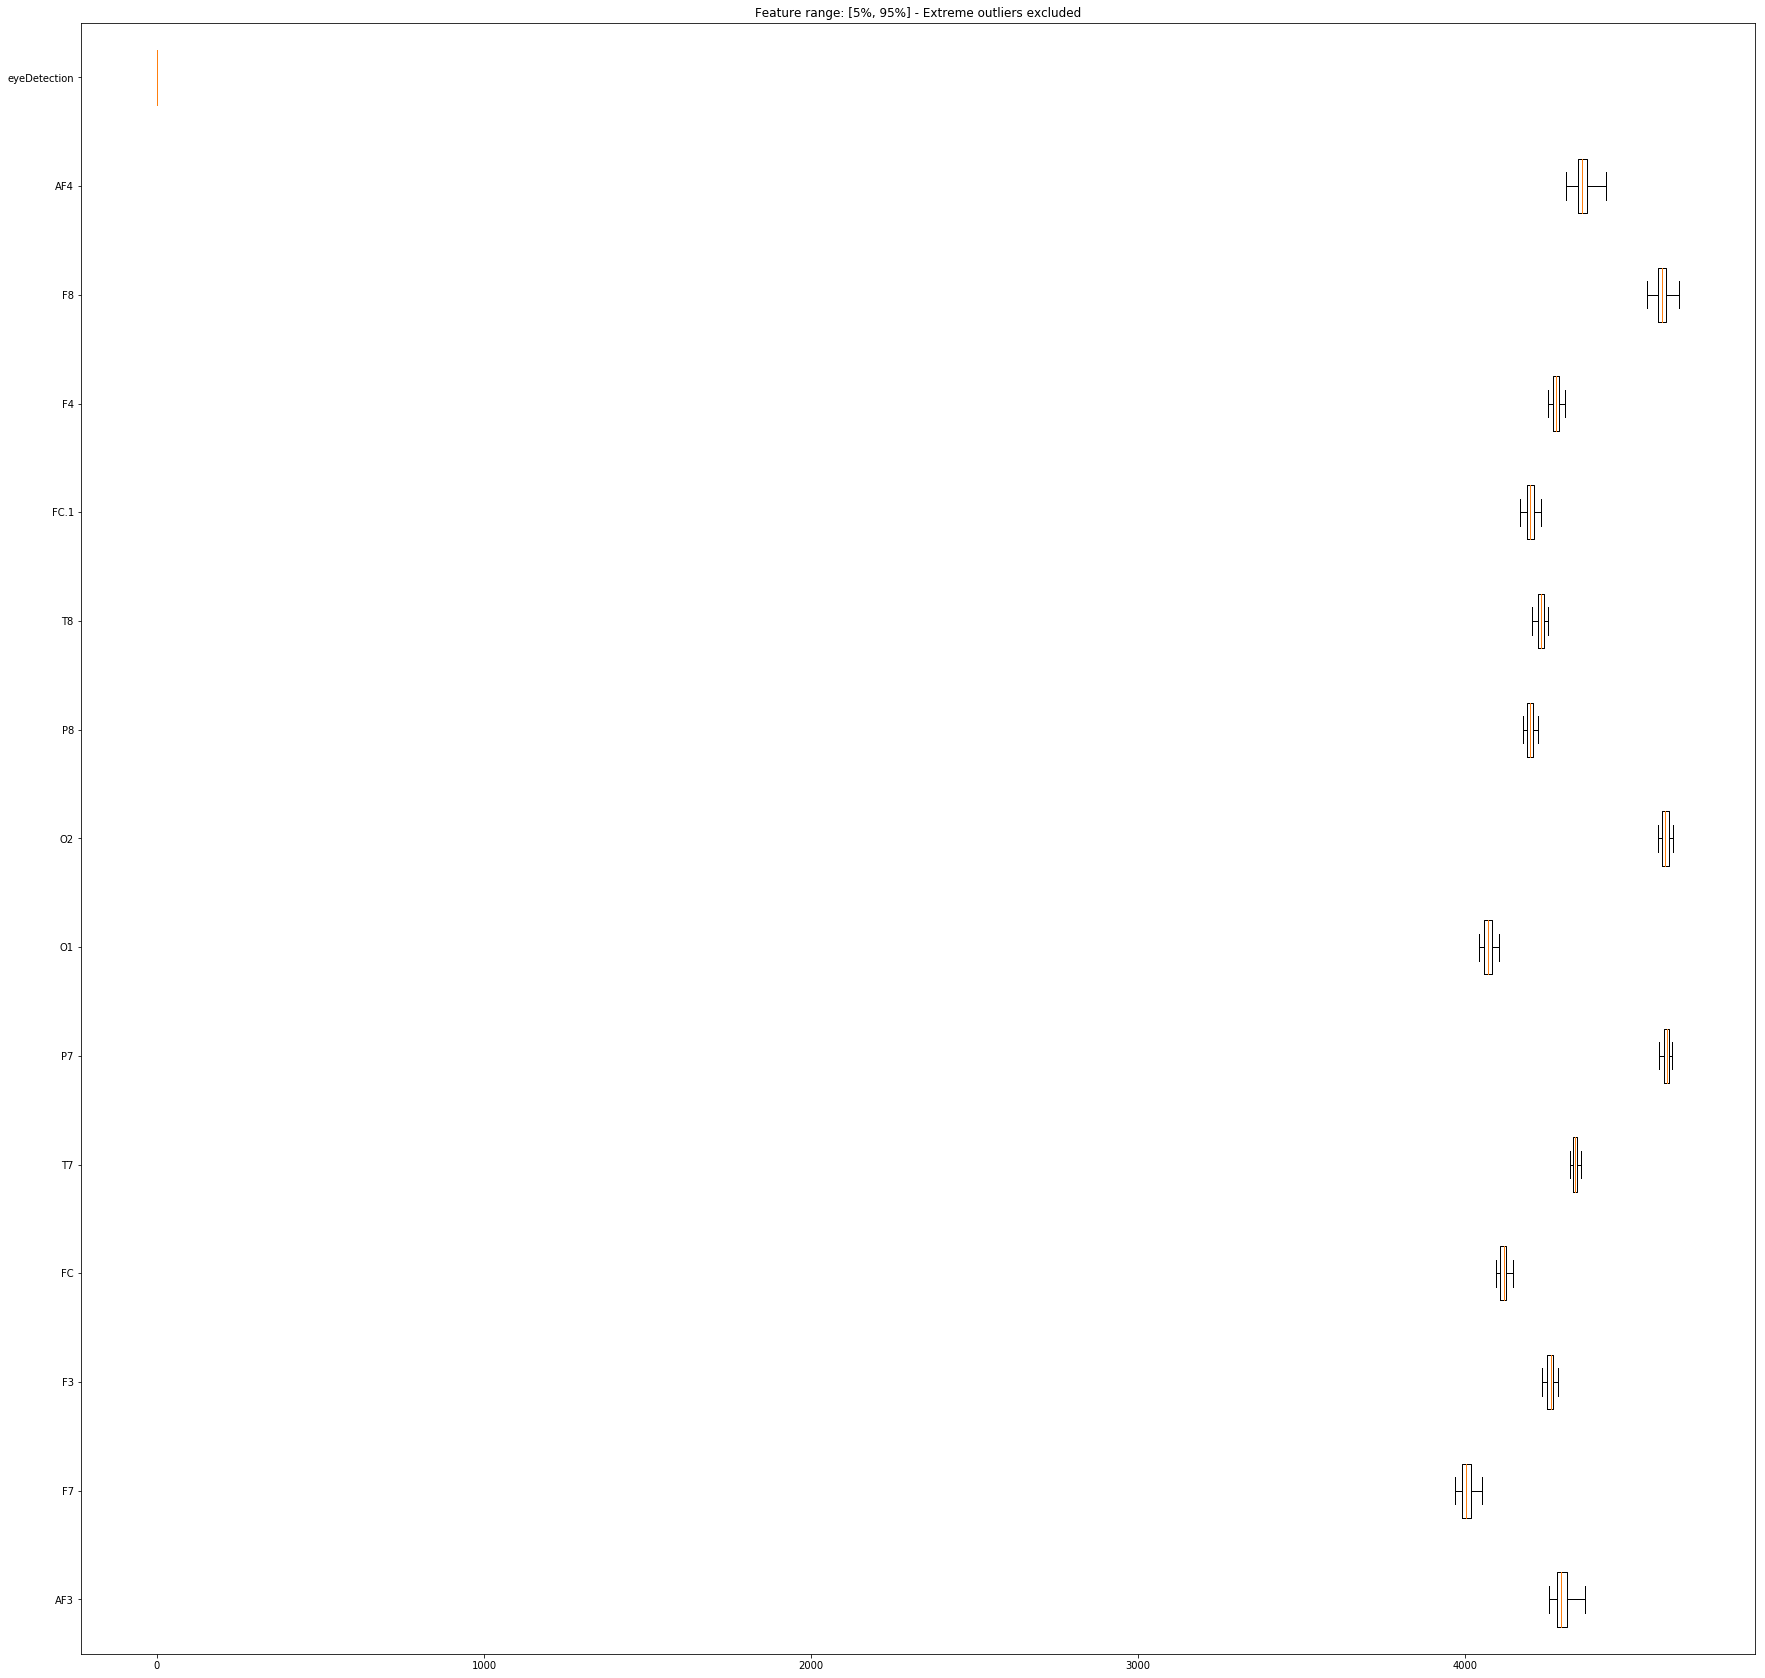

In [6]:
# Plot Box Plots
def plotBoxPlots(data, arrLabels, titleSuffix):
    fig = plt.figure()
    fig.set_figwidth(30)
    fig.set_figheight(30)

    ax1 = fig.add_subplot(1, 1, 1)
    ax1.set_title('Feature range: full - ' + titleSuffix)
    suppress = ax1.boxplot(data
                           , sym='b.'
                           , vert=False
                           , whis='range'
                           , labels=arrLabels
                           , meanline=True
                           , showbox=True
                           , showfliers=True
                           )
    plt.show()
    #
    fig = plt.figure()
    fig.set_figwidth(30)
    fig.set_figheight(30)
    ax2 = fig.add_subplot(1, 1, 1)
    ax2.set_title('Feature range: [5%, 95%] - ' + titleSuffix)
    suppress = ax2.boxplot(data
                           , sym='b.'
                           , vert=False
                           , whis=[5, 95]
                           , labels=arrLabels
                           , meanline=True
                           , showbox=True
                           , showfliers=False
                           )
    plt.show()
#
# Plotting Box Plots
plotBoxPlots(df_values[:,0:df_header_count], df_headers, 'Extreme outliers excluded')

### Scatter Plot representation of the EEG Eye State data set 

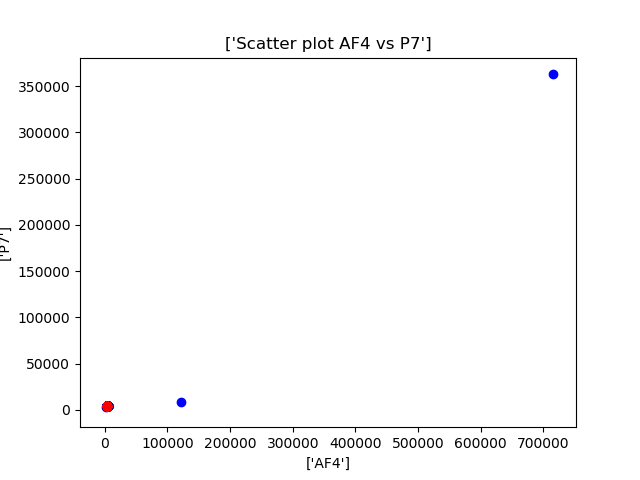

In [7]:
from IPython.display import Image
# Red = EyeClosed, Blue = EyeOpen
Image(filename="Images/Scatter plot ['AF4'] vs ['P7'] Raw.png")

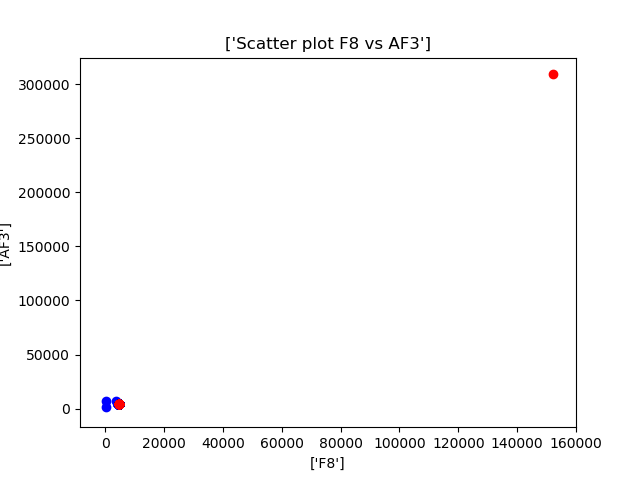

In [8]:
from IPython.display import Image
# Red = EyeClosed, Blue = EyeOpen
Image(filename="Images/Scatter plot ['F8'] vs ['AF3'] Raw.png")

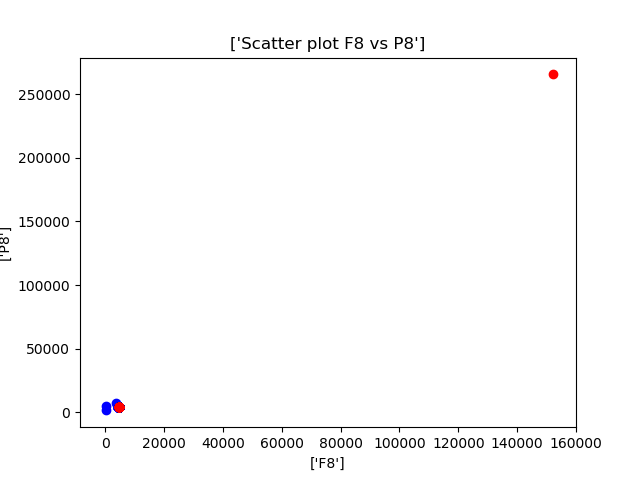

In [9]:
from IPython.display import Image
# Red = EyeClosed, Blue = EyeOpen
Image(filename="Images/Scatter plot ['F8'] vs ['P8'] Raw.png")

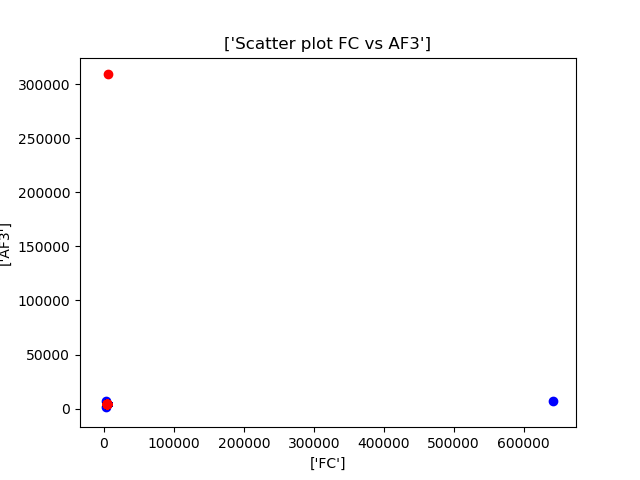

In [10]:
from IPython.display import Image
# Red = EyeClosed, Blue = EyeOpen
Image(filename="Images/Scatter plot ['FC'] vs ['AF3'] Raw.png")

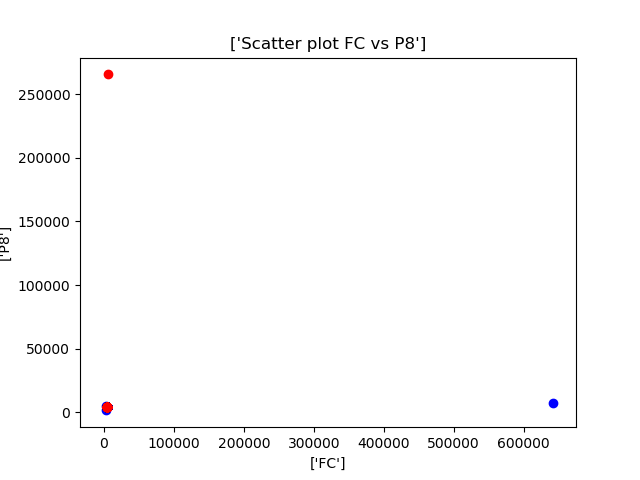

In [11]:
from IPython.display import Image
# Red = EyeClosed, Blue = EyeOpen
Image(filename="Images/Scatter plot ['FC'] vs ['P8'] Raw.png")

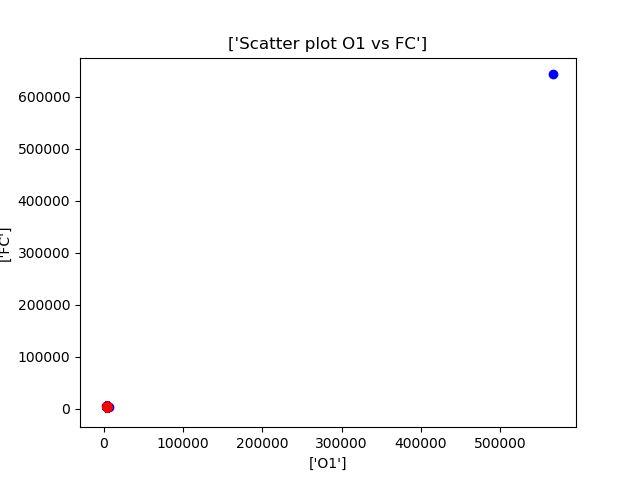

In [12]:
from IPython.display import Image
# Red = EyeClosed, Blue = EyeOpen
Image(filename="Images/Scatter plot ['O1'] vs ['FC'] Raw.png")

# Data Representation

### Box Plots EEG Eye State data set excluding outliers

In [13]:
# Removing outliers
def get_outlier_indexes(df, df_col_count, outlier_value=5000):
    """ Takes a dataframe and returns the position of any outliers """
    outLierIndexes = set()
    upperLimit = outlier_value
    for x in range(df_col_count):
        df = np.array(df)
        outLiers = np.where(df[:, x] > upperLimit)[0]
        if len(outLiers) > 0:
            [(outLierIndexes.add(outLiers[i])) for i in range(len(outLiers))]
    #
    outLierIndexes = list(outLierIndexes)
    outLierIndexes.sort()
    return outLierIndexes
#
outlier_indexes = get_outlier_indexes(df_values, df_header_count)
print('Extreme outliers\nTotal:   ', len(outlier_indexes), \
    '\nIndexes: ', outlier_indexes)
# [(print(DataFrame(df).iloc[[outlier]])) for outlier in outlier_indexes]
df_values_pruned = np.delete(df_values, outlier_indexes, 0)
df_values_pruned_count = len(df_values_pruned)
df_pruned = pd.DataFrame(data=df_values_pruned, columns=df_headers)
#
print('DF size after outlier removal: ' + str(df_values_pruned_count))

('Extreme outliers\nTotal:   ', 1, '\nIndexes: ', [898])
DF size after outlier removal: 9999


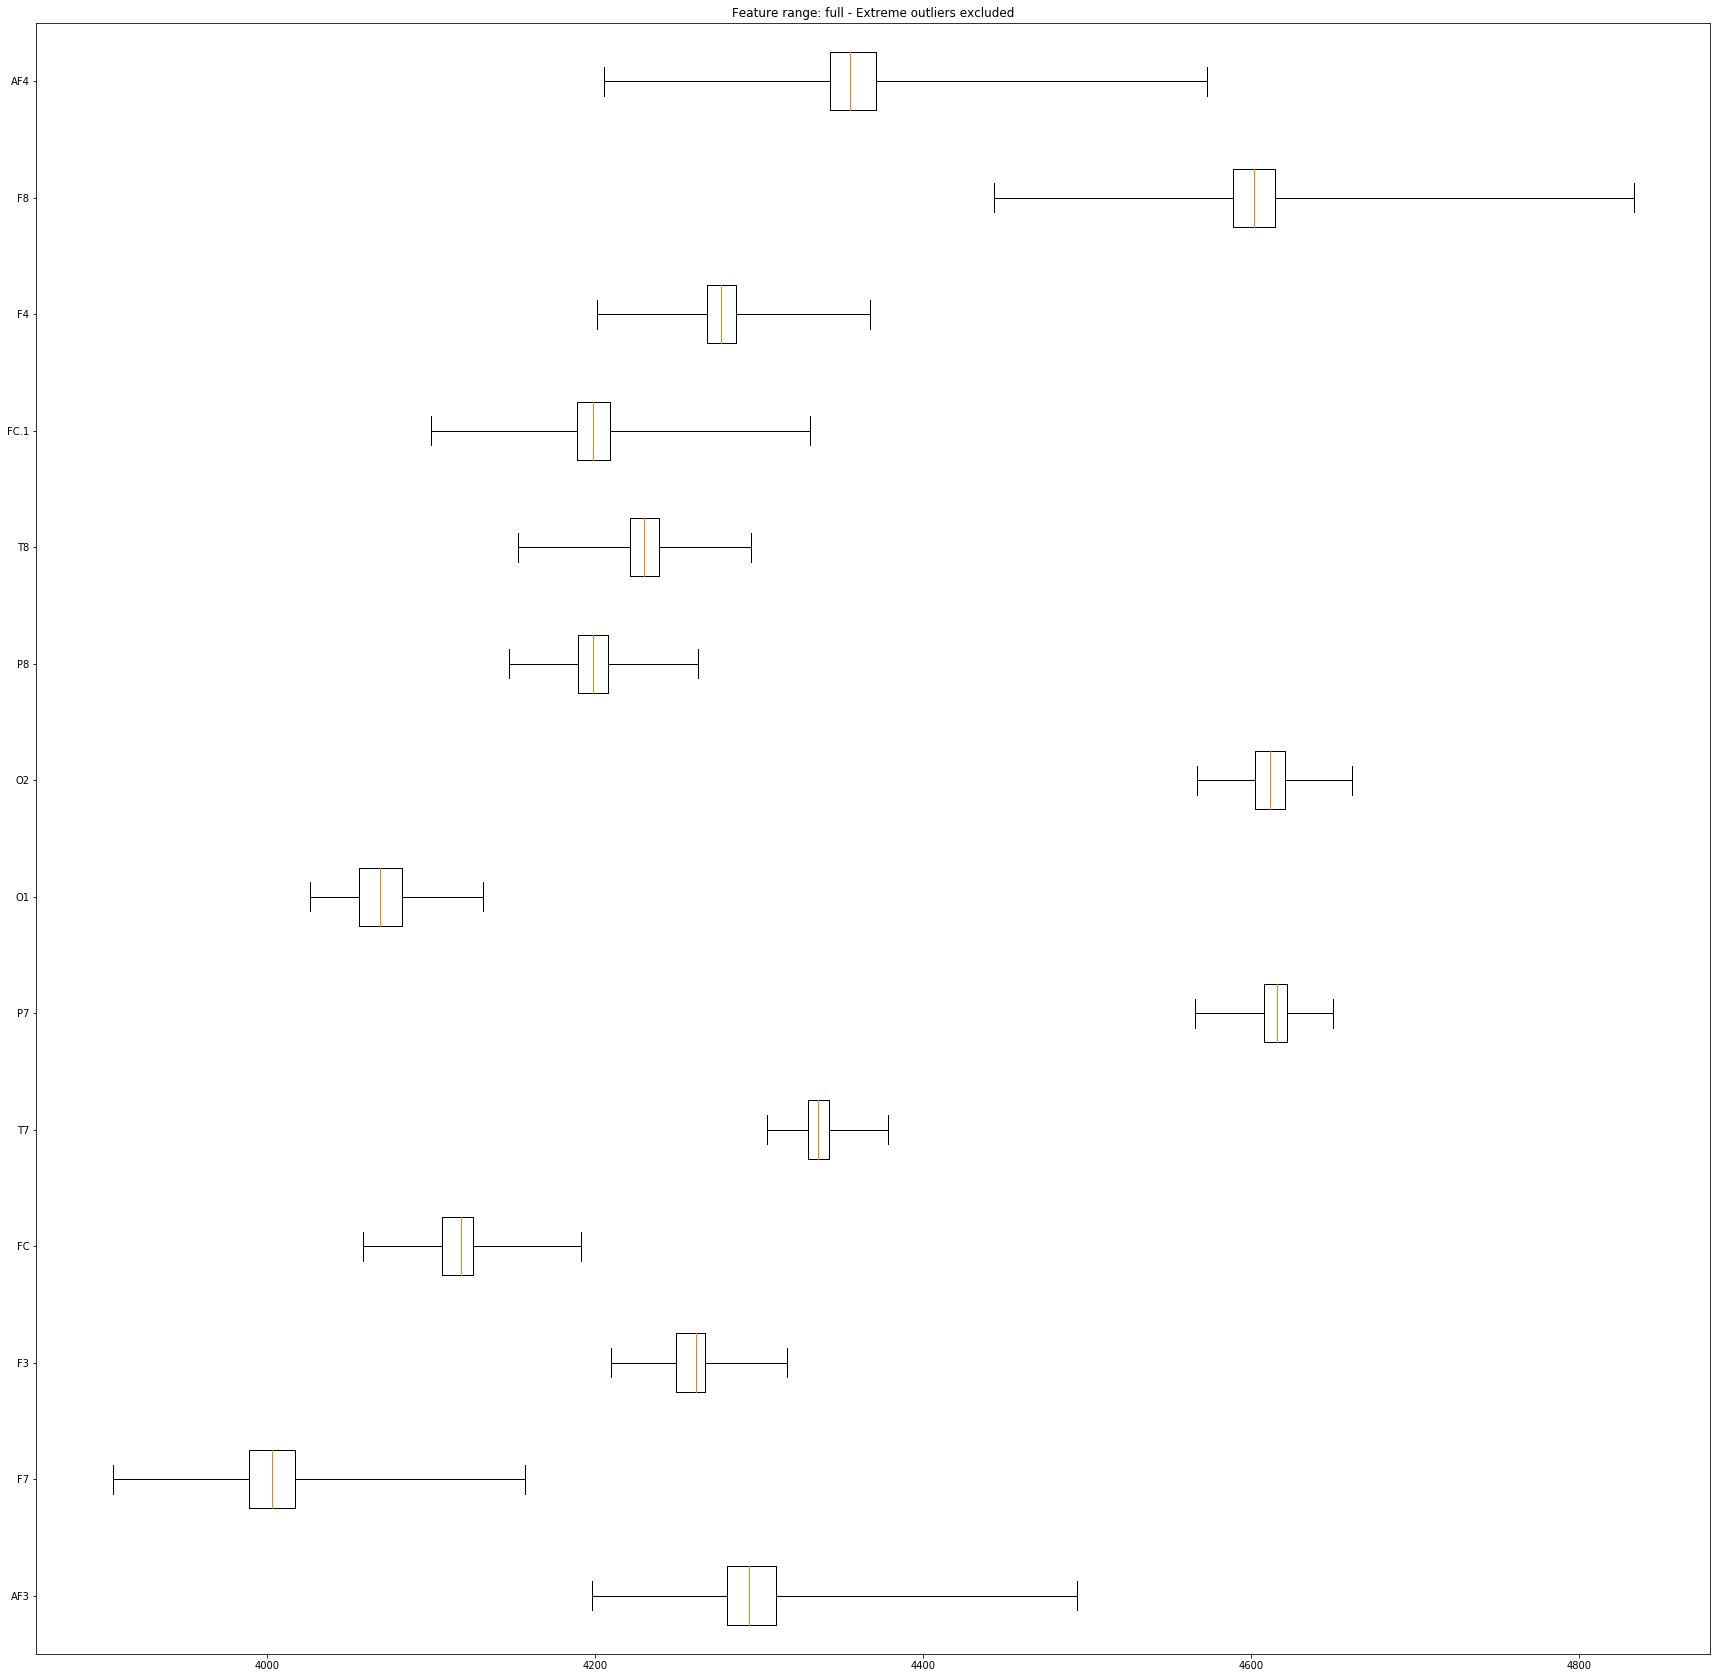

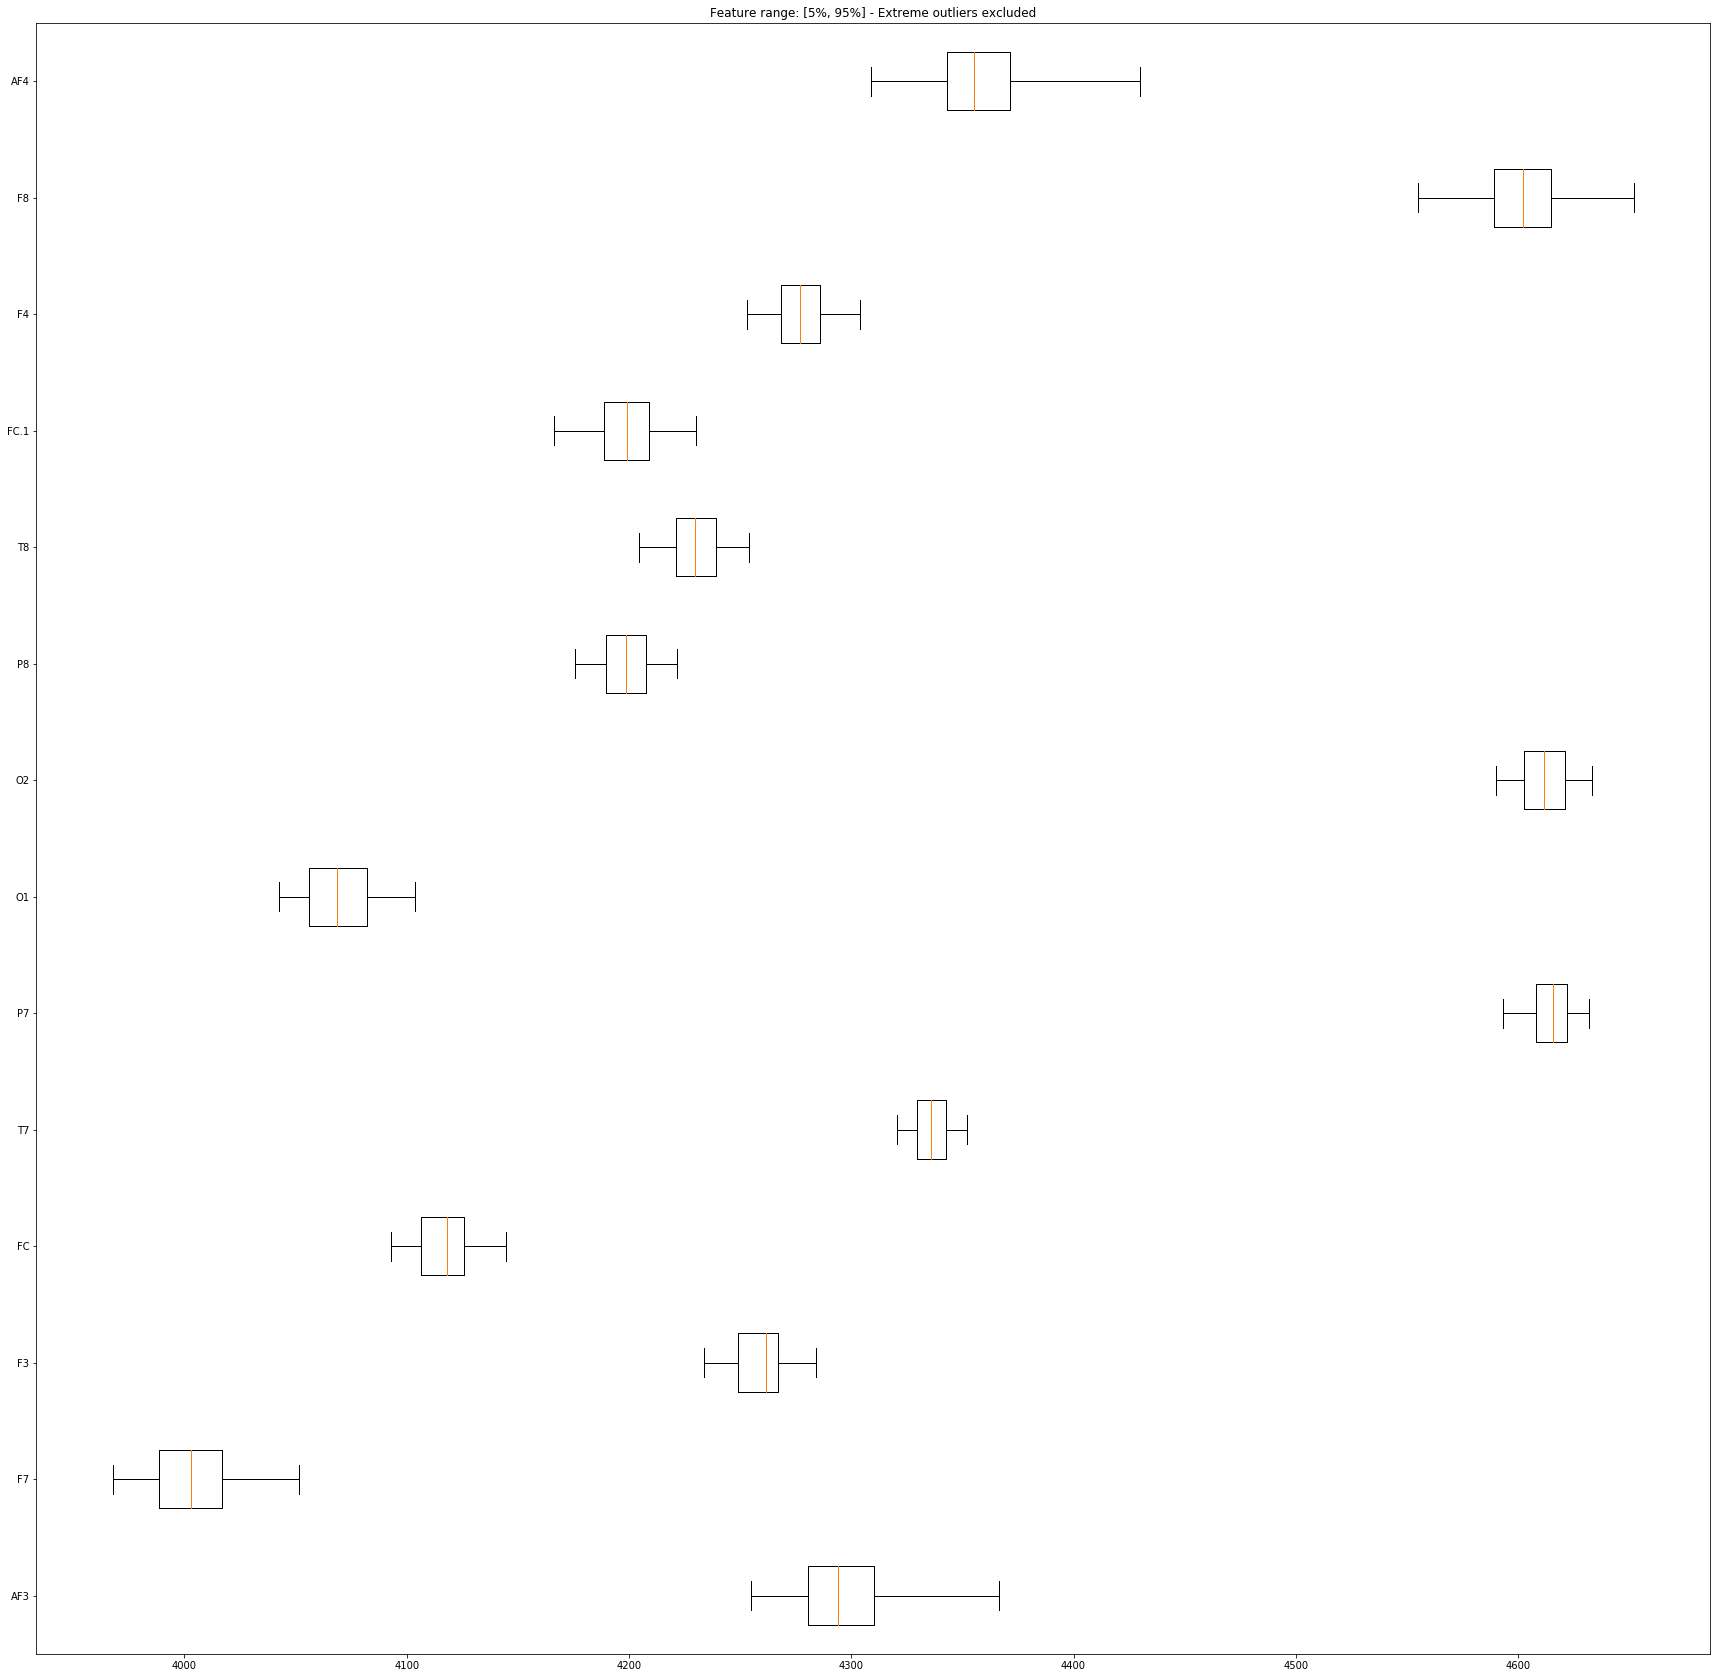

In [14]:
# Plot Box Plots
def plotBoxPlots(data, arrLabels, titleSuffix):
    fig = plt.figure()
    fig.set_figwidth(30)
    fig.set_figheight(30)

    ax1 = fig.add_subplot(1, 1, 1)
    ax1.set_title('Feature range: full - ' + titleSuffix)
    suppress = ax1.boxplot(data
                           , sym='b.'
                           , vert=False
                           , whis='range'
                           , labels=arrLabels
                           , meanline=True
                           , showbox=True
                           , showfliers=True
                           )
    plt.show()
    #
    fig = plt.figure()
    fig.set_figwidth(30)
    fig.set_figheight(30)
    ax2 = fig.add_subplot(1, 1, 1)
    ax2.set_title('Feature range: [5%, 95%] - ' + titleSuffix)
    suppress = ax2.boxplot(data
                           , sym='b.'
                           , vert=False
                           , whis=[5, 95]
                           , labels=arrLabels
                           , meanline=True
                           , showbox=True
                           , showfliers=False
                           )
    plt.show()
#
# Plotting Box Plots
eegDataNoOutLiers_y = df_pruned['eyeDetection']
eegDataNoOutLiers_X = df_pruned.drop('eyeDetection', 1)
plotBoxPlots(eegDataNoOutLiers_X.values[:,0:len(eegDataNoOutLiers_X.columns)], eegDataNoOutLiers_X.columns, 'Extreme outliers excluded')

### Scatter Plot representation of the EEG Eye State data set (excluding outliers)

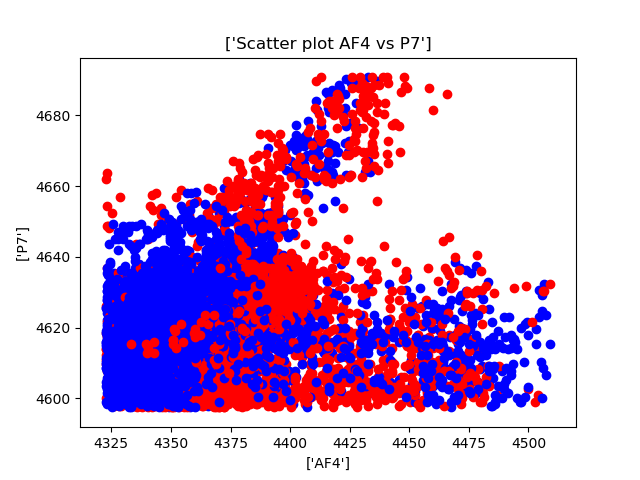

In [15]:
from IPython.display import Image
# Red = EyeClosed, Blue = EyeOpen
Image(filename="Images/Scatter plot ['AF4'] vs ['P7'].png")

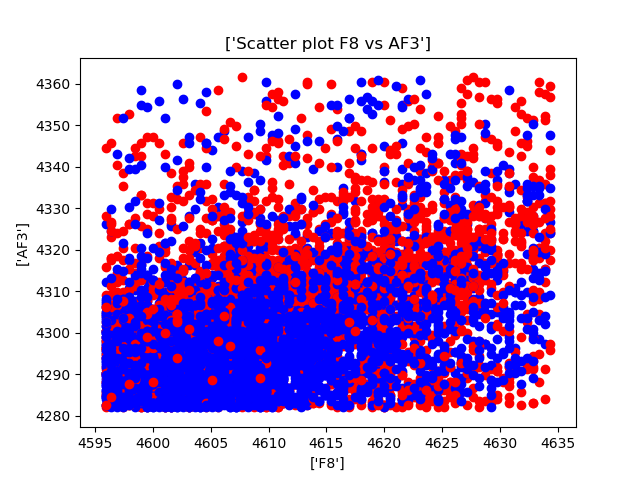

In [16]:
# Red = EyeClosed, Blue = EyeOpen
Image(filename="Images/Scatter plot ['F8'] vs ['AF3'].png")

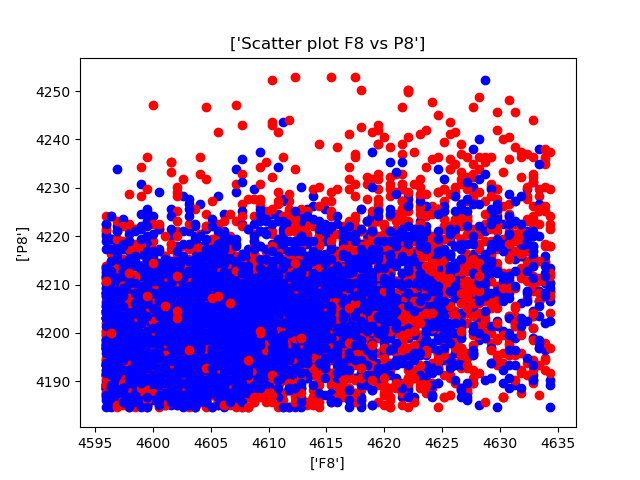

In [17]:
# Red = EyeClosed, Blue = EyeOpen
Image(filename="Images/Scatter plot ['F8'] vs ['P8'].png")

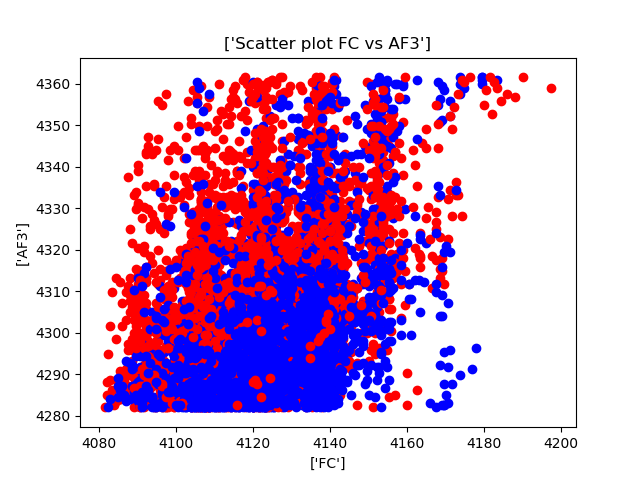

In [18]:
# Red = EyeClosed, Blue = EyeOpen
Image(filename="Images/Scatter plot ['FC'] vs ['AF3'].png")

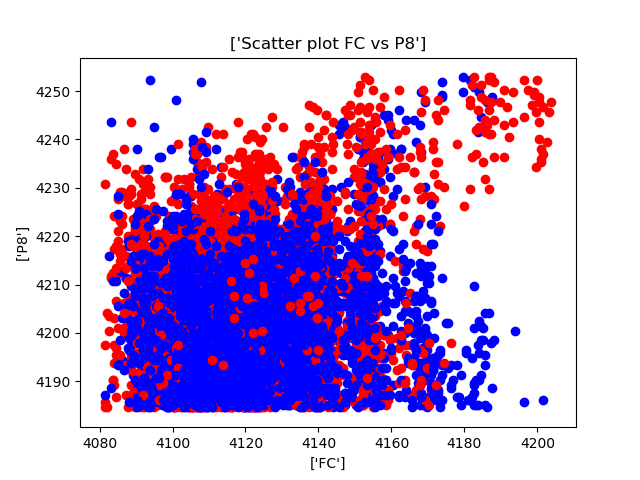

In [19]:
# Red = EyeClosed, Blue = EyeOpen
Image(filename="Images/Scatter plot ['FC'] vs ['P8'].png")

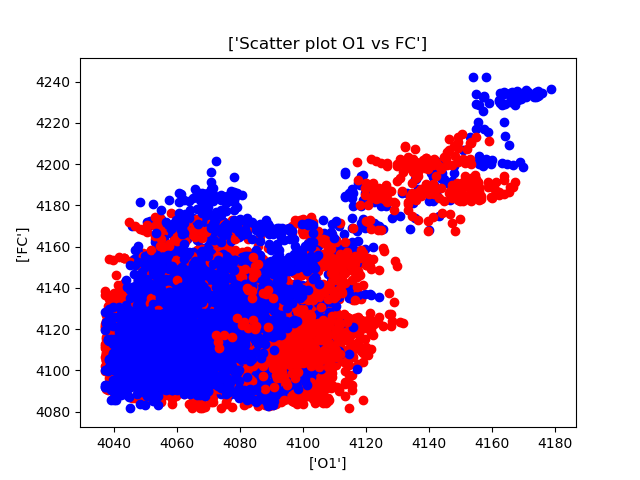

In [20]:
# Red = EyeClosed, Blue = EyeOpen
Image(filename="Images/Scatter plot ['O1'] vs ['FC'].png")

# Time Series Analysis

### EEG Eye State data set time shifting (lag set to 0)

In [21]:
# Applying lag to timeseries data set, by shifting degree of n
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
        data: Sequence of observations as a list or NumPy array.
        n_in: Number of lag observations as input (X).
        n_out: Number of observations as output (y).
        dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
        Pandas DataFrame of series framed for supervised learning.
    """
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
#
# N-Step Univariate Forecasting Shift
df_pruned_shifted = series_to_supervised(data=df_pruned, n_in=lag, n_out=1, dropnan=True)
#
# Removing any lag variables of var15(t-lag) (label)
if lag > 0:
    for i in range(1,lag+1):
        df_pruned_shifted = df_pruned_shifted.drop('var15(t-' + str(i) + ')', 1)
df_pruned_shifted_headers = df_pruned_shifted.columns
df_pruned_shifted_header_count = len(df_pruned_shifted_headers)
print(df_pruned_shifted_headers)

Index([u'var1(t)', u'var2(t)', u'var3(t)', u'var4(t)', u'var5(t)', u'var6(t)',
       u'var7(t)', u'var8(t)', u'var9(t)', u'var10(t)', u'var11(t)',
       u'var12(t)', u'var13(t)', u'var14(t)', u'var15(t)'],
      dtype='object')


### Line plots of feature readings over time (117 seconds)

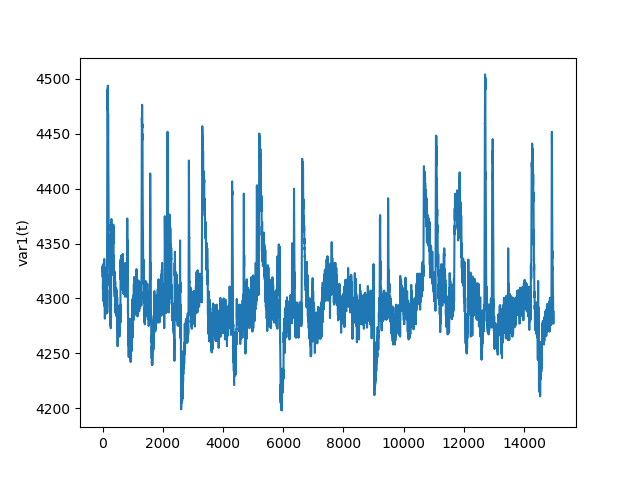

In [22]:
# AF3 line graph
Image(filename="Images/AF3.png")

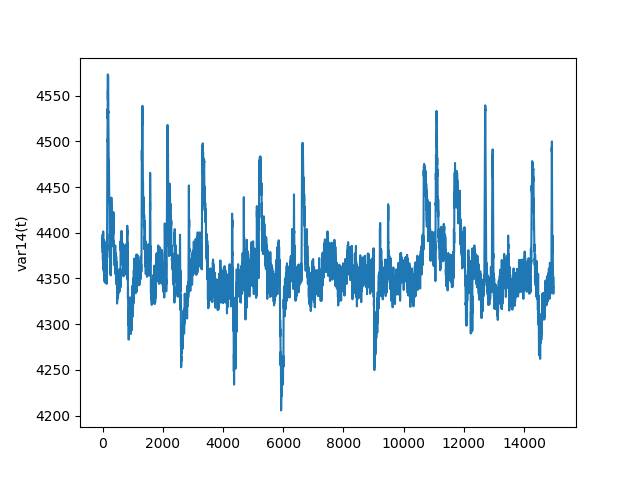

In [23]:
# AF4 line graph
Image(filename="Images/AF4.png")

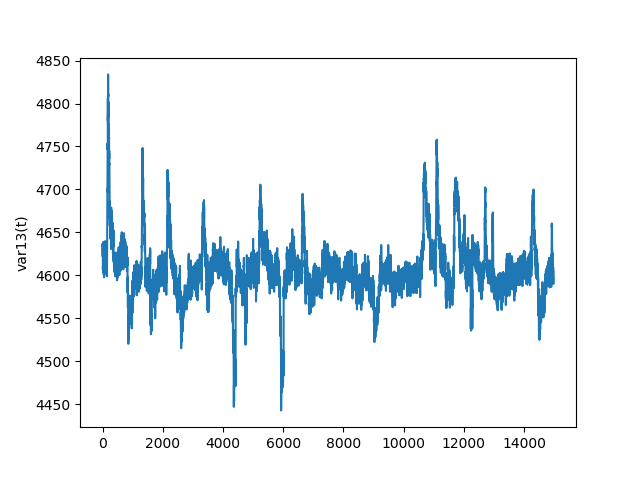

In [24]:
# F8 line graph
Image(filename="Images/F8.png")

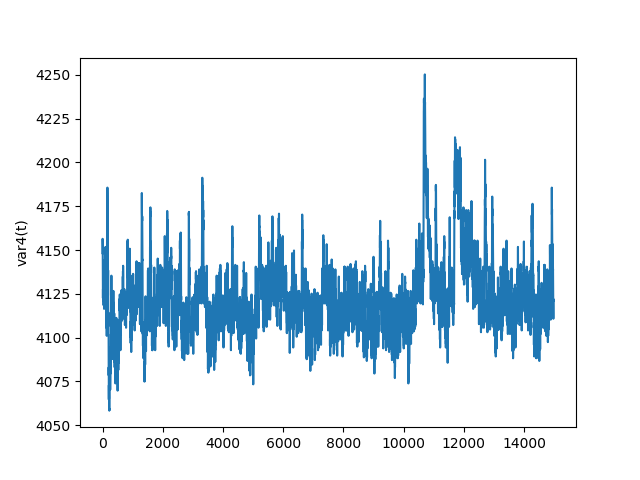

In [25]:
# FC line graph
Image(filename="Images/FC.png")

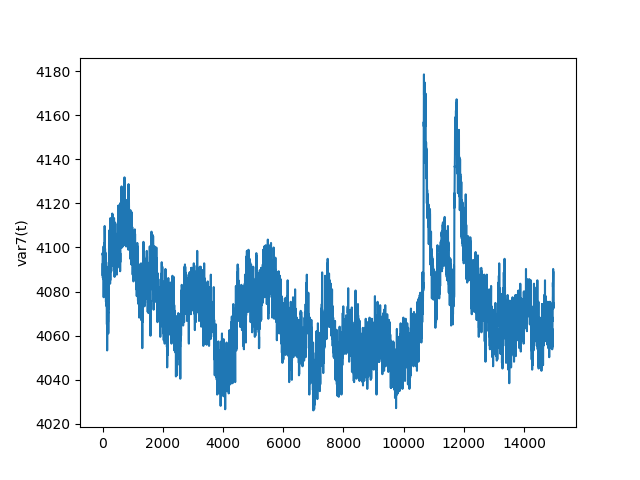

In [26]:
# O1 line graph
Image(filename="Images/O1.png")

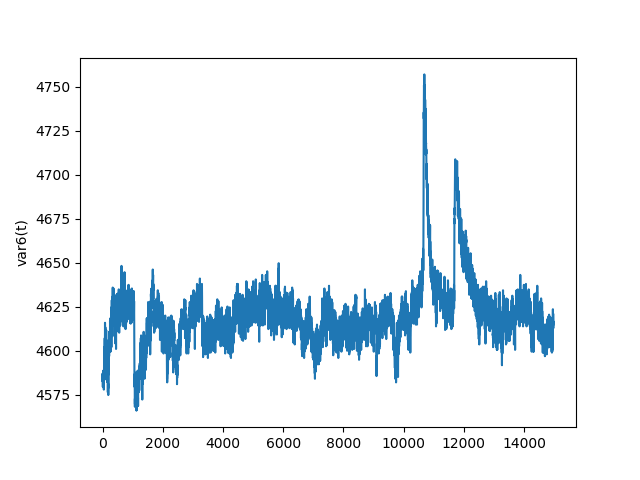

In [27]:
# P7 line graph
Image(filename="Images/P7.png")

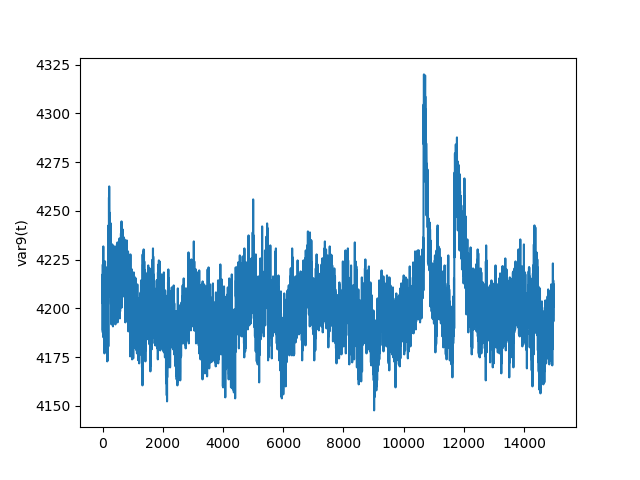

In [28]:
# P8 line graph
Image(filename="Images/P8.png")

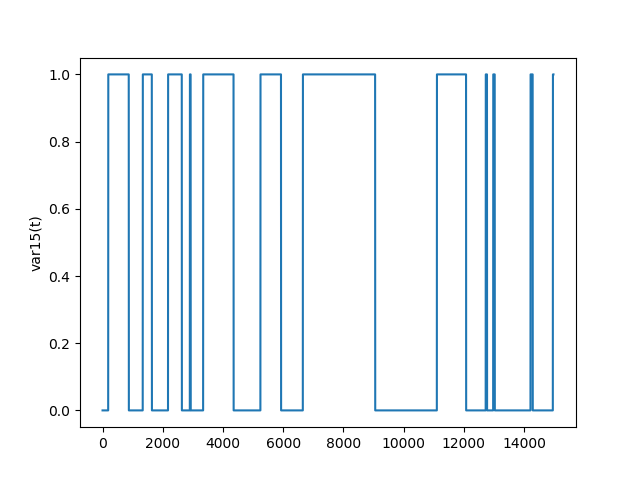

In [29]:
# eyeDetection line graph
Image(filename="Images/eyeDetection.png")

# Feature Selection - Filter Methods

###  Pearson Correlation Matrix

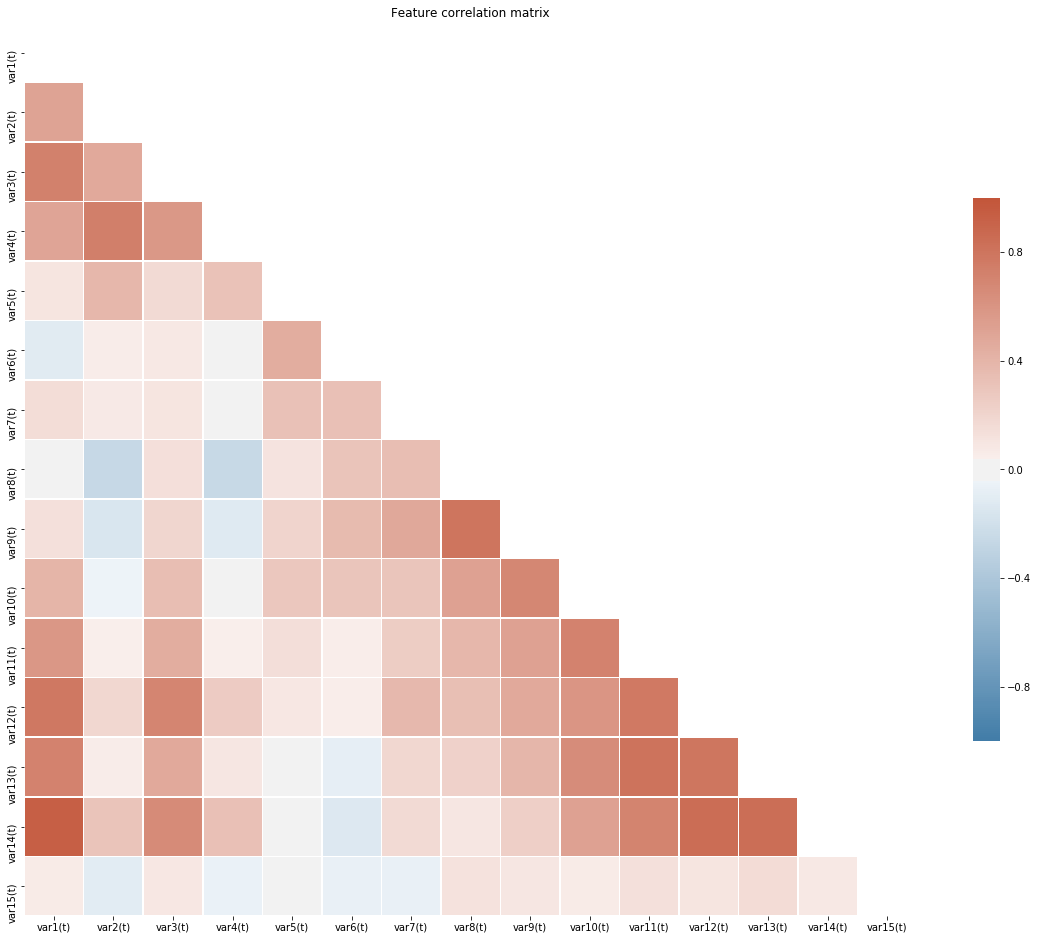

In [30]:
# Plot Pearson's Correlation Matrix for shifted_df
eegDF = pd.DataFrame(data=df_pruned_shifted, columns=df_pruned_shifted_headers)
#
# Compute the correlation matrix
corr = eegDF.corr()
#
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
#
# Set up the matplotlib figure
fig = plt.figure()
fig.set_figheight(20)
fig.set_figwidth(20)
#
ax = fig.add_subplot(1, 1, 1)
ax.set_title("Feature correlation matrix")
#
# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 20, as_cmap=True)
#
# Draw the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=-1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()
#
# Store the upper triangle of the correlation matrix into an Excel sheet
corrUpperTri = corr.where(mask)
writer = pd.ExcelWriter('EEG_Shifted_Correlation_Matrix.xlsx')
corrUpperTri.to_excel(writer, 'CorrelationMatrix')
writer.save()

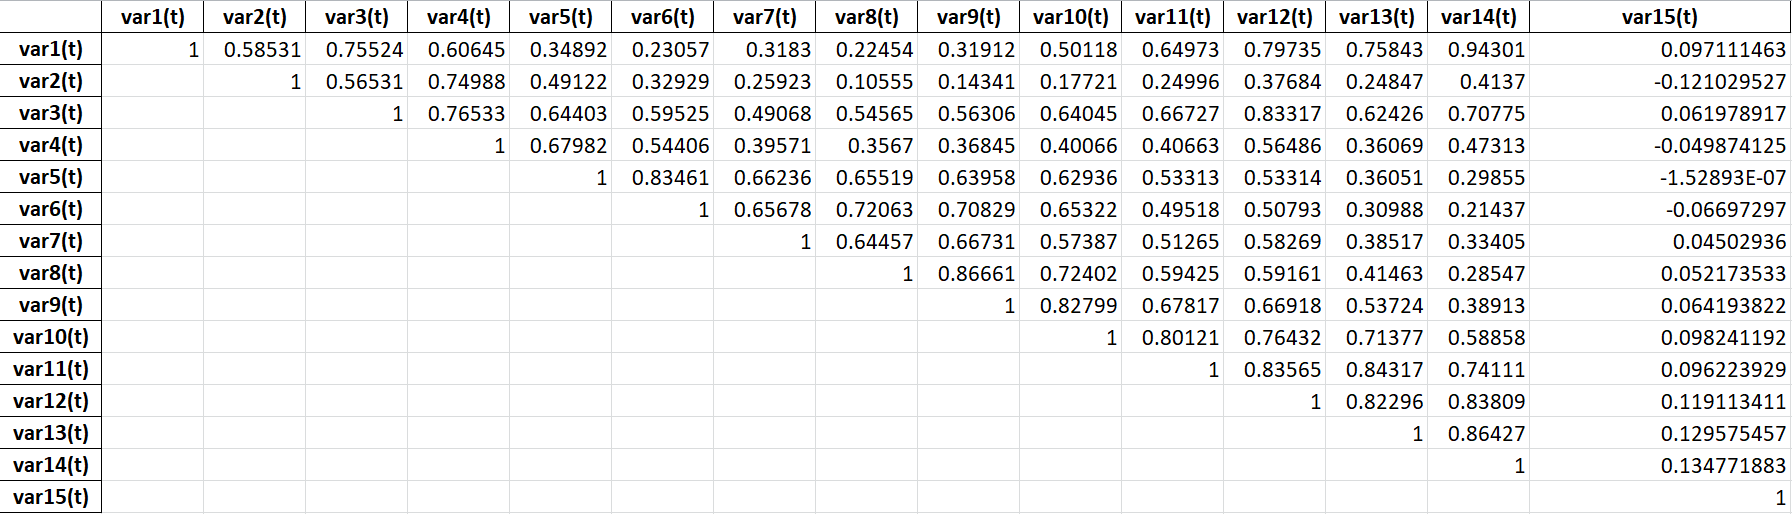

In [31]:
# Pearson's Correlation Matrix
Image(filename="Images/Correlation Matrix Excluding Outliers.png")

### Auto Correlation Plot for time series analysis

/usr/local/lib/python2.7/dist-packages/pandas/core/series.py:2890: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)
/usr/local/lib/python2.7/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


[ 4009.23  4004.62  4006.67 ...,  4009.23  4003.59  3997.95]


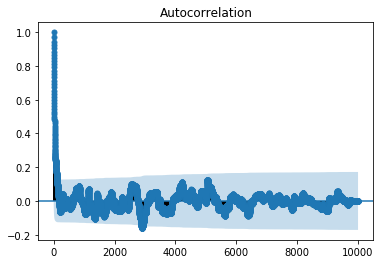

In [32]:
#
# Autocorrelation Plot
series = Series.from_csv(path, header=0)
print(series.values)
from statsmodels.graphics.tsaplots import plot_acf
if lag == 0:
    lag = None
plot_acf(series, lags=lag)
plt.show()

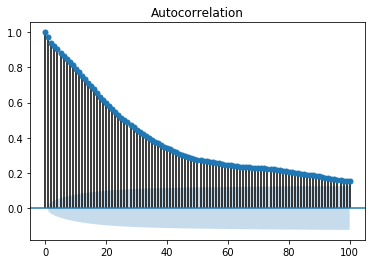

In [33]:
# Limited to lag 100
plot_acf(series, lags=100)
plt.show()

### Filter Methods (Mutual Information Scoring)

In [34]:
from sklearn.metrics import mutual_info_score
import operator
mi_scores = {}
for column in df_pruned_shifted_headers:
    if column != 'var15(t)':
        mi_scores[column] = mutual_info_score(df_pruned_shifted[column], df_pruned_shifted['var15(t)'])
print('Mutual Information: ')
print(sorted(mi_scores.items(), key=operator.itemgetter(1), reverse=True))

Mutual Information: 
[('var1(t)', 0.068001631969438509), ('var14(t)', 0.061312983255733783), ('var6(t)', 0.056815681032305346), ('var13(t)', 0.056309625332207881), ('var7(t)', 0.04282873920644046), ('var11(t)', 0.040537269025248061), ('var2(t)', 0.03461132683140055), ('var12(t)', 0.0283772790896249), ('var9(t)', 0.02320555796089771), ('var3(t)', 0.020713608072078921), ('var4(t)', 0.02026262824227585), ('var10(t)', 0.020162418824560796), ('var8(t)', 0.019820144087840025), ('var5(t)', 0.0086360493779071828)]


### Data normalization, and cross validation splits of 80/20%

In [35]:
#
# Cross-validating of dataset: Splitting dataset into sub samples for training and validation purposes
from sklearn.model_selection import train_test_split
df_pruned_shifted_Y = df_pruned_shifted['var15(t)']
df_pruned_shifted_X = df_pruned_shifted.drop('var15(t)', 1)
#
X_train, X_test, y_train, y_test = train_test_split(df_pruned_shifted_X, df_pruned_shifted_Y, test_size=0.2, random_state=0)
#
# L2 Normalization
from sklearn.preprocessing import normalize
# X_train = normalize(X_train, norm='l2')
# X_test = normalize(X_test, norm='l2')
#
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
#
print(X_train)
print(X_test)

[[ 0.34689722  0.35379033  0.49766748 ...,  0.46873857  0.41442686
   0.44240104]
 [ 0.35576724  0.40287913  0.46893077 ...,  0.4968312   0.44784796
   0.42531414]
 [ 0.36284255  0.32723213  0.48805747 ...,  0.52809263  0.38635001
   0.47369005]
 ..., 
 [ 0.38938359  0.43151095  0.34456055 ...,  0.4749543   0.42378581
   0.46373194]
 [ 0.27963001  0.25768633  0.49281582 ...,  0.33747715  0.39036471
   0.38123769]
 [ 0.26903431  0.35175659  0.37805561 ...,  0.46246191  0.37031727
   0.33713351]]
[[ 0.32393834  0.32851215  0.3585779  ...,  0.38980698  0.41364982
   0.40324241]
 [ 0.17607882  0.40082994  0.32824503 ...,  0.29494976  0.24651693
   0.22579631]
 [ 0.41020976  0.43181177  0.49497735 ...,  0.45425701  0.38719752
   0.47801224]
 ..., 
 [ 0.28171238  0.30163974  0.46464448 ...,  0.2779614   0.33288069
   0.36655801]
 [ 0.18840331  0.31199388  0.22729959 ...,  0.31868059  0.30778632
   0.28446846]
 [ 0.55281678  0.4648886   0.5757337  ...,  0.5152697   0.48885147
   0.60705095]]


# Feature Selection - Wrapper Methods

### Random Forest Feature Importance Ranking

In [33]:
#
# Feature importance ranked using RandomForest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500)
df_pruned_shifted_Y = df_pruned_shifted['var15(t)']
df_pruned_shifted_X = df_pruned_shifted.drop('var15(t)', 1)
#
rf.fit(df_pruned_shifted_X, df_pruned_shifted_Y)
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = df_pruned_shifted_X.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
print('Random Forest Classification For Feature Selection: ')
print(feature_importances)
#
# Plot the feature importance of the forest
fig = plt.figure()
fig.set_figheight(20)
fig.set_figwidth(20)
plt.title("RandomForest Feature importance")
objects = list(feature_importances.axes[0])
y_pos = np.arange(len(objects))
feature_importance = np.array(feature_importances)
plt.bar(y_pos, feature_importance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.show()

Random Forest Classification For Feature Selection: 
          importance
var6(t)     0.112511
var7(t)     0.100417
var2(t)     0.094903
var13(t)    0.088314
var1(t)     0.079704
var14(t)    0.076010
var4(t)     0.069245
var11(t)    0.067911
var12(t)    0.061874
var3(t)     0.056911
var5(t)     0.052163
var10(t)    0.051266
var8(t)     0.050217
var9(t)     0.038553


TypeError: only length-1 arrays can be converted to Python scalars

### Gradient Boosting Feature Importance Ranking

          importance
feature             
var6(t)     0.138812
var2(t)     0.137319
var13(t)    0.125576
var7(t)     0.102618
var14(t)    0.074886
var4(t)     0.071142
var12(t)    0.060371
var1(t)     0.056389
var5(t)     0.053045
var3(t)     0.047553
var10(t)    0.045104
var11(t)    0.043450
var8(t)     0.037160
var9(t)     0.006573


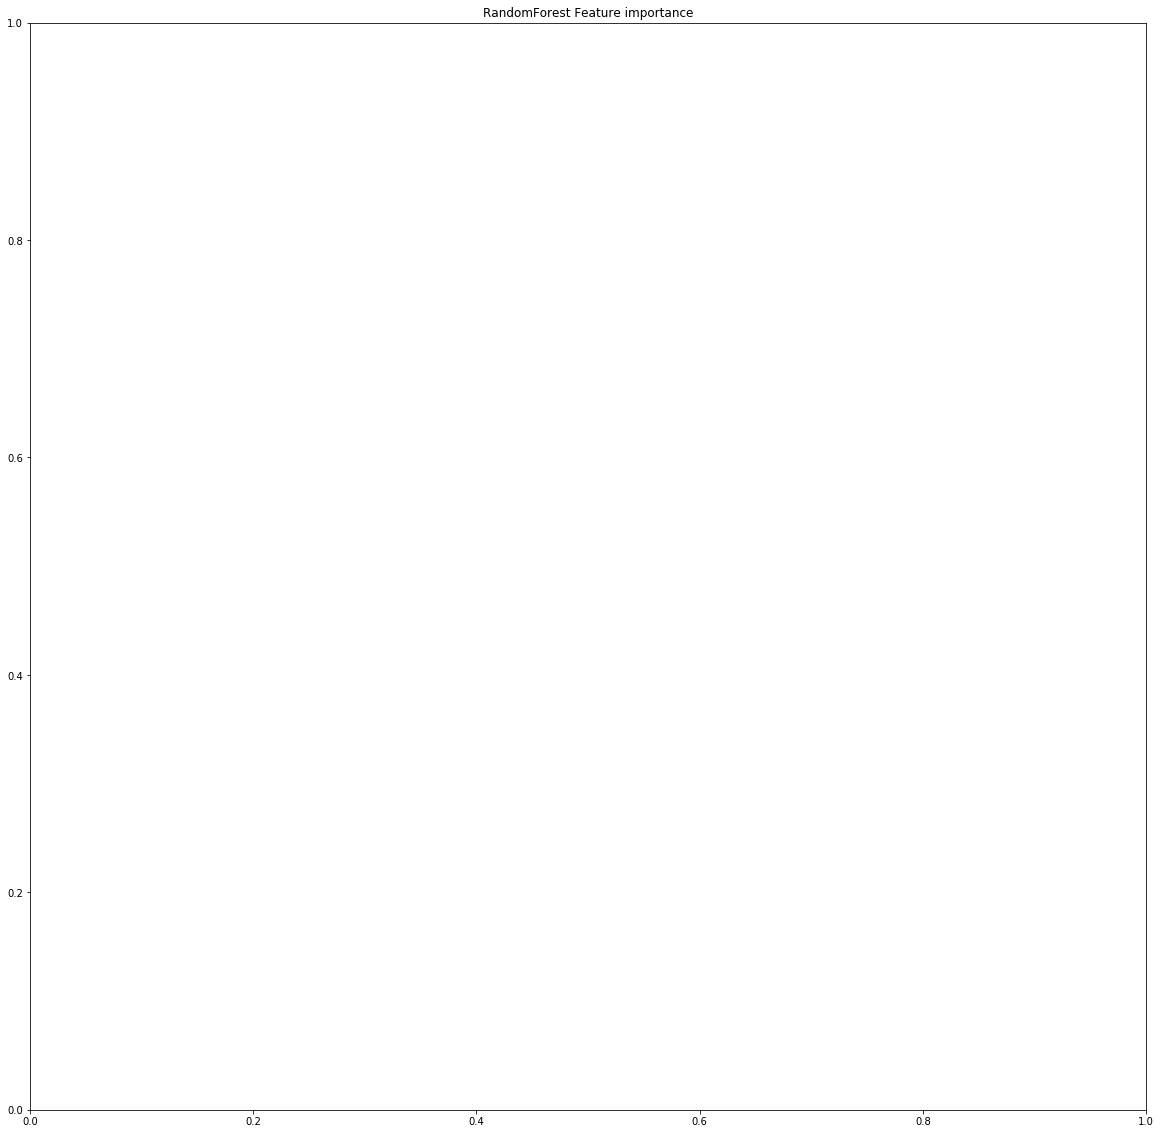

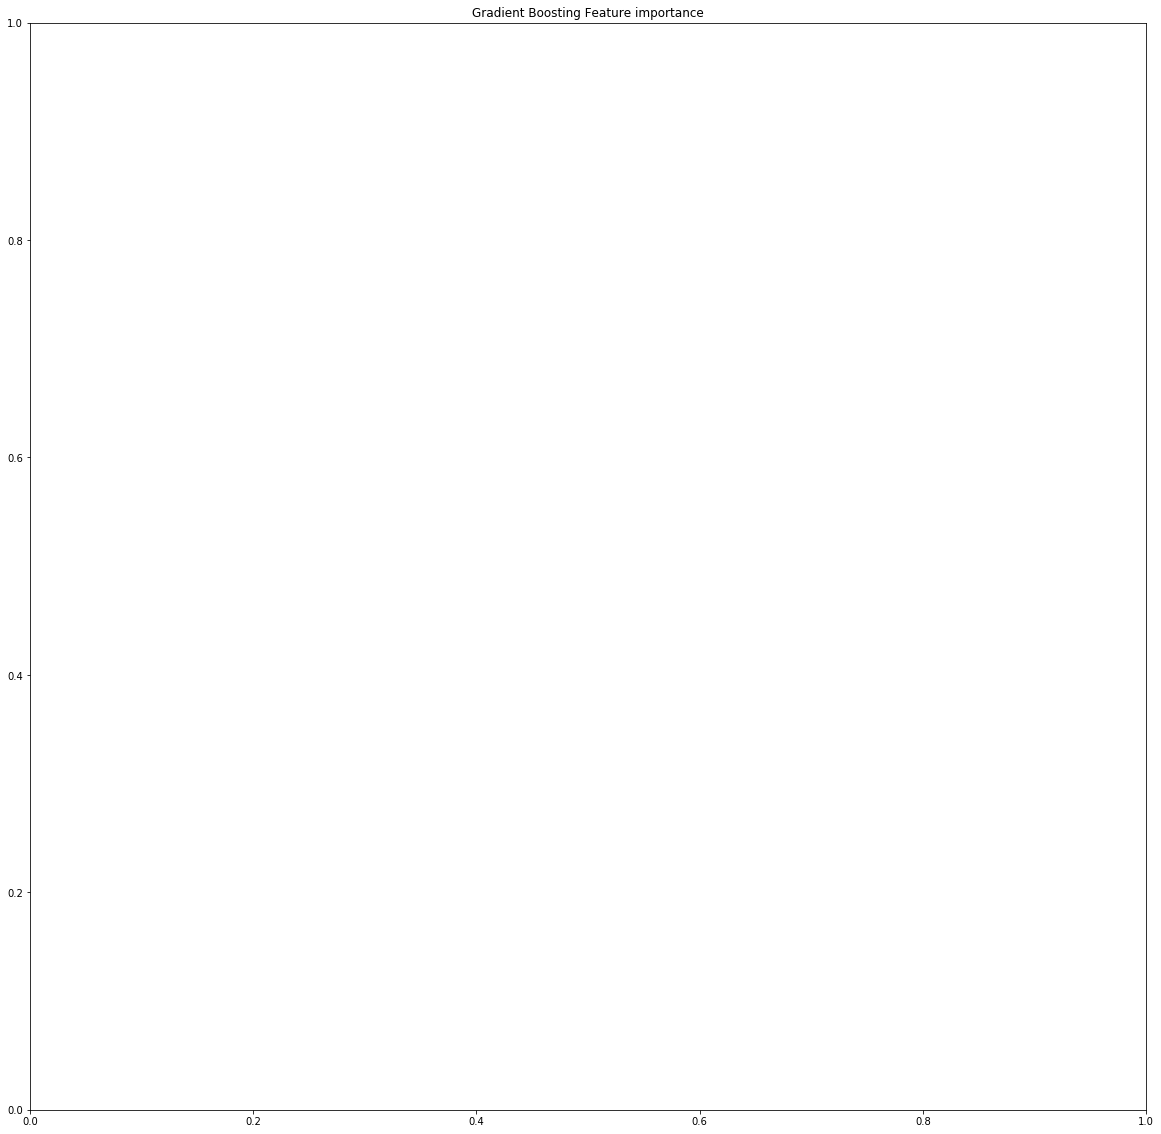

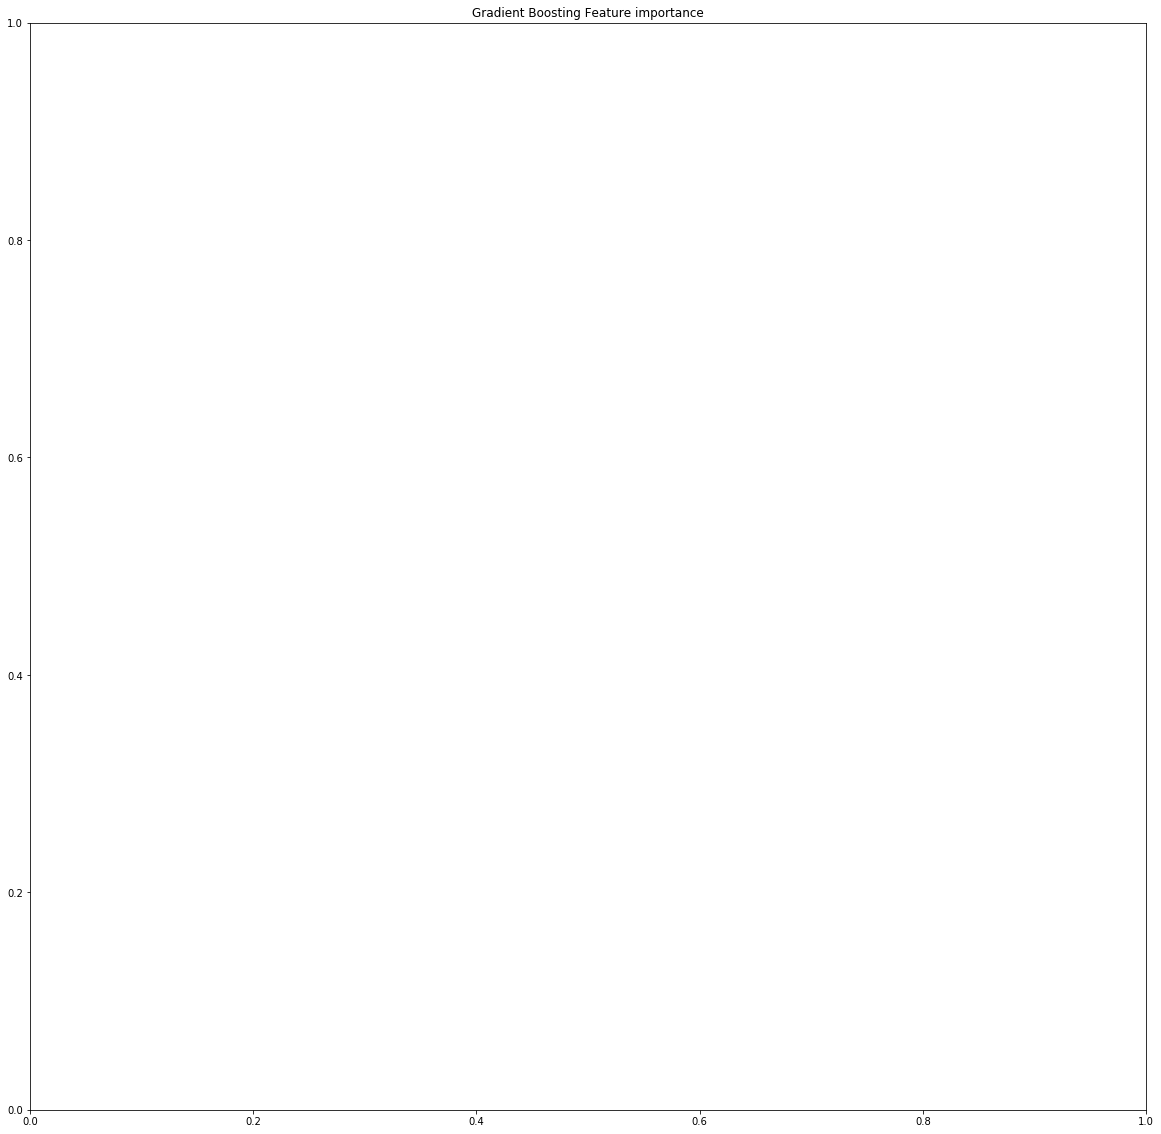

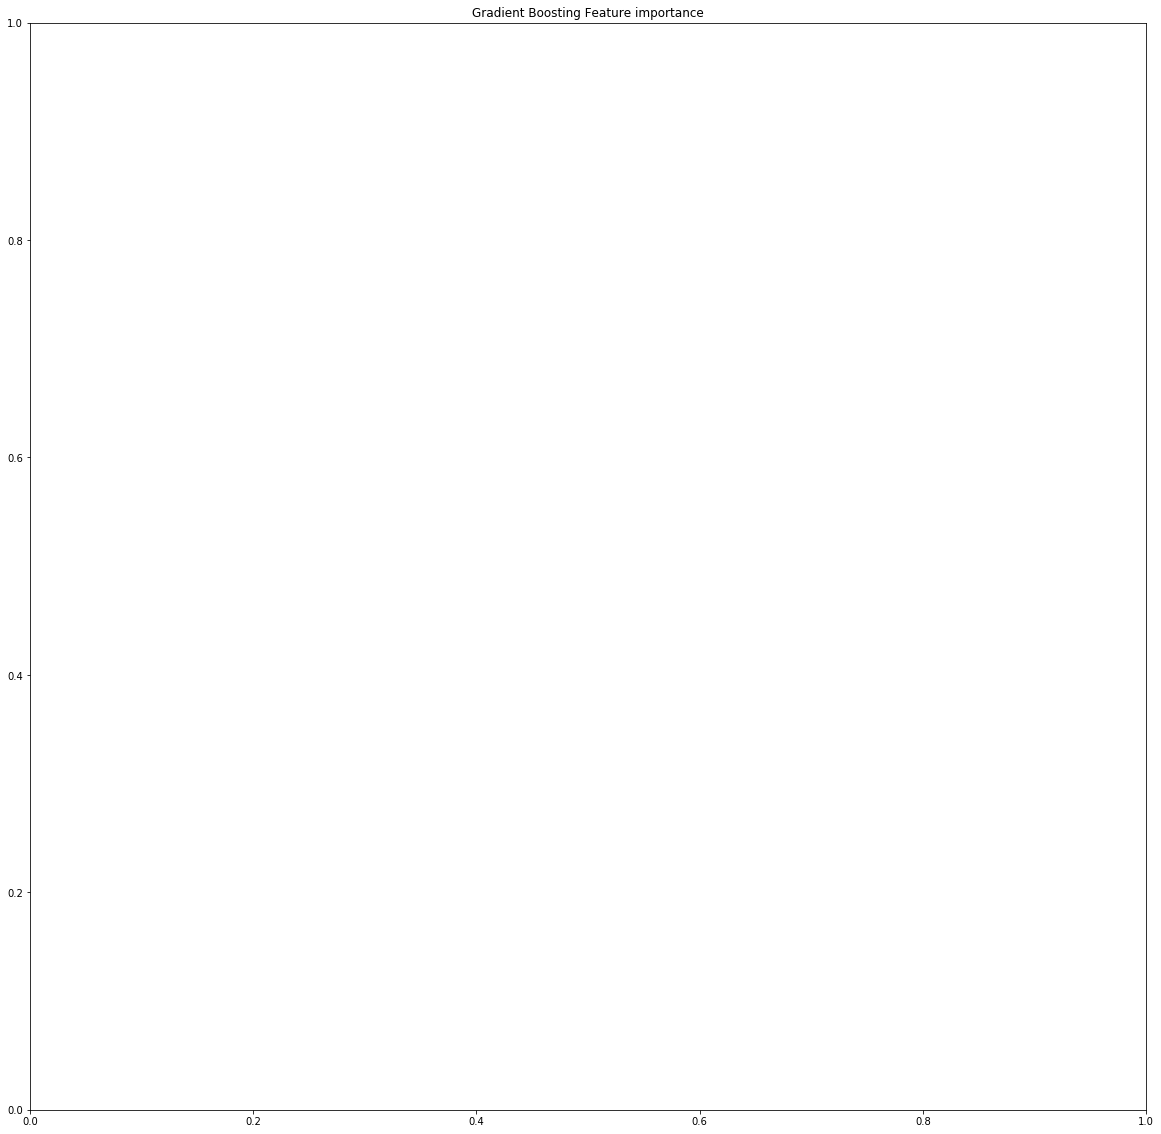

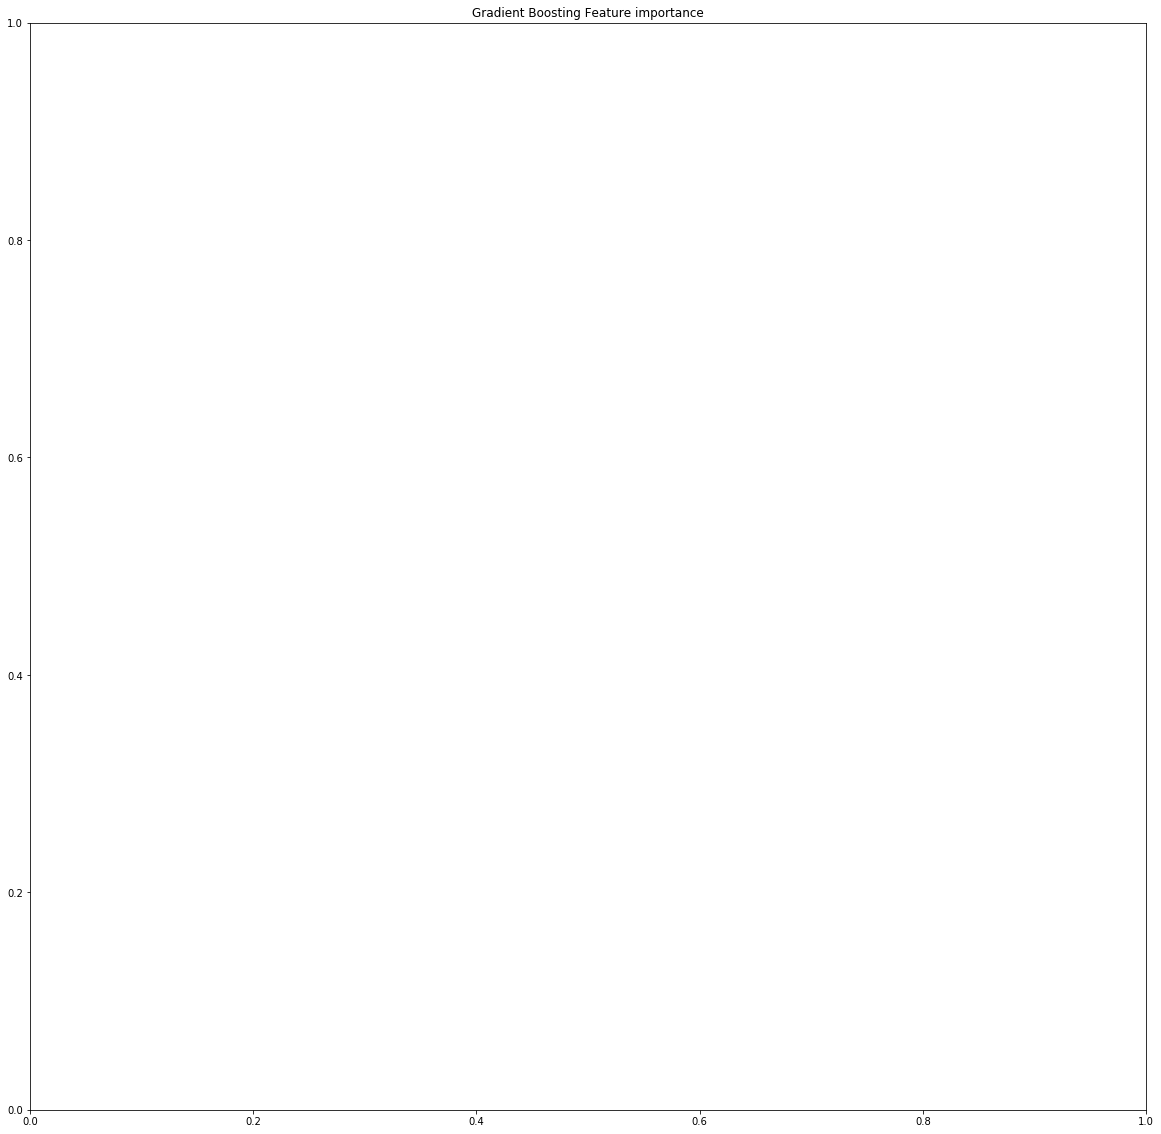

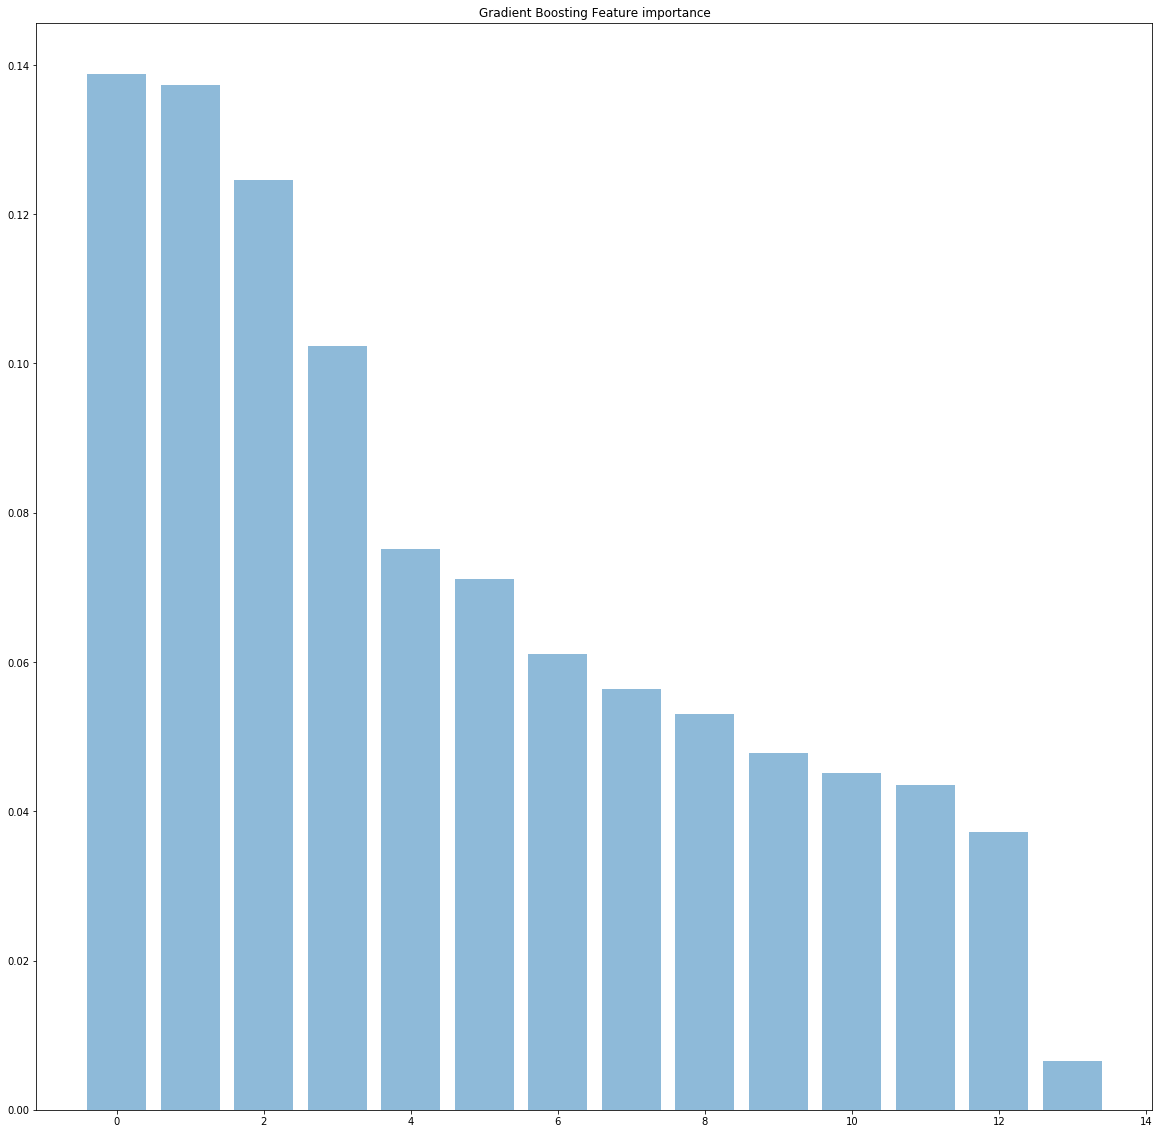

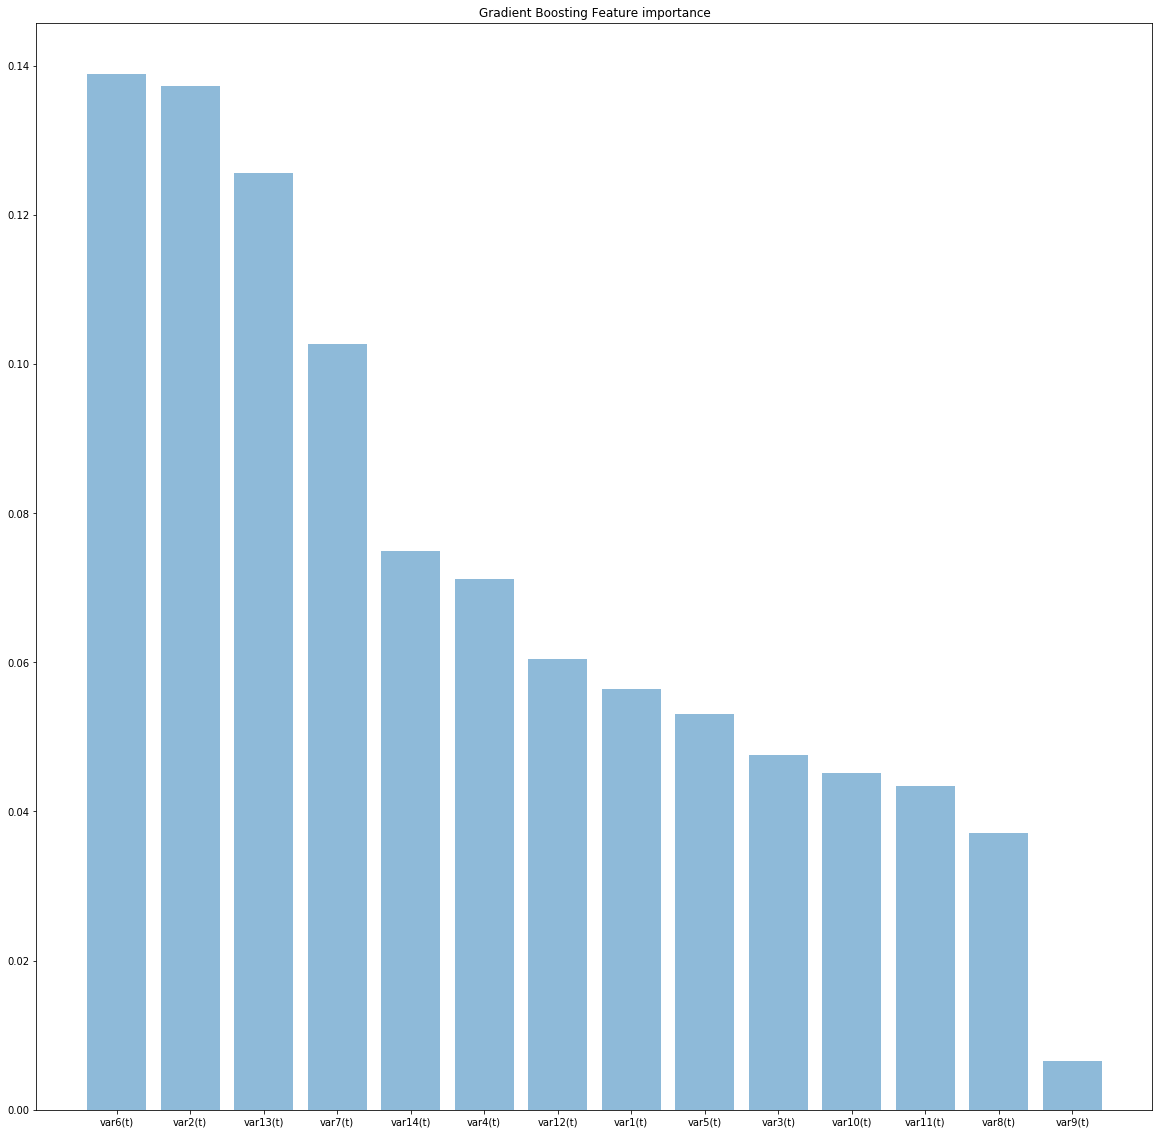

(14,)
(14, 1)


In [84]:
#
# Feature importance ranked using Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
feature_importances = pd.DataFrame({'feature': df_pruned_shifted_X.columns, 'importance': np.round(gbc.feature_importances_, 6)})
feature_importances = feature_importances.sort_values('importance', ascending=False).set_index('feature')
#
print(feature_importances)
#
# Plot the feature importance of the forest
fig = plt.figure()
fig.set_figheight(20)
fig.set_figwidth(20)
plt.title("Gradient Boosting Feature importance")
objects = list(feature_importances.axes[0])
y_pos = np.arange(len(objects))
feature_importance = np.array(feature_importances)
plt.bar(y_pos, feature_importance[:, 0], align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.show()

### Support Vector Machine Feature Importance Ranking

In [35]:
# Feature importance ranked by linear SVM
from sklearn import svm
#
svm = svm.SVC(kernel='linear')
svm.fit(df_pruned_shifted_X, df_pruned_shifted_Y)
df_pruned_shifted_X_columns = df_pruned_shifted_X.columns
feature_importances = pd.DataFrame(svm.coef_[0],
                                   index = df_pruned_shifted_X.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
print('SVM Classification For Feature Selection: ')
print(feature_importances)
#
# Plot the feature importance of the SVM
fig = plt.figure()
fig.set_figheight(20)
fig.set_figwidth(20)
plt.title("Feature importance (Ranked by SVM)")
objects = list(feature_importances.axes[0])
y_pos = np.arange(len(objects))
feature_importance = np.array(feature_importances)
plt.bar(y_pos, feature_importance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.show()

SVM Classification For Feature Selection: 
          importance
var5(t)    11.694125
var13(t)    7.525286
var8(t)     5.975246
var3(t)     5.314409
var9(t)     4.265117
var1(t)     3.896053
var4(t)    -0.847930
var11(t)   -1.239499
var12(t)   -1.900737
var2(t)    -4.547331
var7(t)    -4.769462
var6(t)    -4.930598
var14(t)   -4.970558
var10(t)   -8.795545


TypeError: only length-1 arrays can be converted to Python scalars

# Evaluation Metrics

In [36]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
#
class Scoring_Functions():
    #
    def __init__(self, y_pred, y_true):
        self.y_pred = y_pred
        self.y_true = y_true
    #
    def accuracy(self):
        # http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score
        return str(accuracy_score(self.y_true, self.y_pred) * 100) + "%"
    #
    def precision(self):
        # http: // scikit - learn.org / stable / modules / generated / sklearn.metrics.precision_score.html  # sklearn.metrics.precision_score
        return str(precision_score(self.y_true, self.y_pred, average='weighted')* 100) + '%'
    #
    def recall(self):
        # http://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score
        return str(recall_score(self.y_true, self.y_pred, average='weighted') * 100) + '%'
    #
    def f_measure(self):
        # http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score
        return str(f1_score(self.y_true, self.y_pred, average='weighted') * 100) + '%'
    #
    def scoring_results(self):
        return "Accuracy: " + str(self.accuracy()) + "\nPrecision: " + str(self.precision()) + "\nRecall: " + str(self.recall()) + "\nFMeasure: " + str(self.f_measure())

### Random Forest Feature Importance Ranking (considering feature combinations)

In [37]:
# Wrapper Method - Random Forest Feature Selection
from sklearn.ensemble import RandomForestClassifier
from numpy import sort
from sklearn.feature_selection import SelectFromModel
#
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
feature_importances = pd.DataFrame({'feature': df_pruned_shifted_X.columns, 'importance': np.round(rfc.feature_importances_, 6)})
feature_importances = feature_importances.sort_values('importance', ascending=False).set_index('feature')
from sklearn.feature_selection import SelectFromModel
#
model = RandomForestClassifier()
model.fit(X_train, y_train)
#
# make predictions for test data and evaluate
pred_y = model.predict(X_test)
#
# Testing Classifier Accuracy
sf = Scoring_Functions(y_pred=pred_y, y_true=y_test)
print("RFC Accuracy: ")
print(sf.scoring_results())
print('-------------------------')
#
# fit model using each importance as a threshold
thresholds = sort(model.feature_importances_)
for thresh in thresholds:
    # selecting features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_train_x = selection.transform(X_train)
    #
    # training model
    selection_model = RandomForestClassifier()
    selection_model.fit(select_train_x, y_train)
    #
    # evaluating model
    select_test_x = selection.transform(X_test)
    pred_y = selection_model.predict(select_test_x)
    sf = Scoring_Functions(y_pred=pred_y, y_true=y_test)
    print('Threshold: ' + str(thresh))
    print('Feature Count: ' + str(select_train_x.shape[1]))
    print(sf.scoring_results())
    print('-------------------------')

RFC Accuracy: 
Accuracy: 79.25%
Precision: 81.2756311493%
Recall: 79.25%
FMeasure: 79.3427306428%
-------------------------
Threshold: 0.044306835255
Feature Count: 14
Accuracy: 79.55%
Precision: 81.1840625%
Recall: 79.55%
FMeasure: 79.655636379%
-------------------------
Threshold: 0.0512778199084
Feature Count: 13
Accuracy: 79.75%
Precision: 81.3568738258%
Recall: 79.75%
FMeasure: 79.8554069924%
-------------------------
Threshold: 0.0522606243134
Feature Count: 12
Accuracy: 80.3%
Precision: 81.811526577%
Recall: 80.3%
FMeasure: 80.404972409%
-------------------------
Threshold: 0.0528657007247
Feature Count: 11
Accuracy: 77.5%
Precision: 79.6428535512%
Recall: 77.5%
FMeasure: 77.5933678205%
-------------------------
Threshold: 0.0540824497626
Feature Count: 10
Accuracy: 77.45%
Precision: 79.4499774016%
Recall: 77.45%
FMeasure: 77.5507747468%
-------------------------
Threshold: 0.0609434955632
Feature Count: 9
Accuracy: 77.0%
Precision: 78.7412347045%
Recall: 77.0%
FMeasure: 77.1141

### Gradient Boosting Feature Importance Ranking (considering feature combinations)

In [38]:
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
#
# make predictions for test data and evaluate
pred_y = model.predict(X_test)
#
# Testing Classifier Accuracy
sf = Scoring_Functions(y_pred=pred_y, y_true=y_test)
print("GBC Accuracy: ")
print(sf.scoring_results())
print('-------------------------')
#
# fit model using each importance as a threshold
thresholds = sort(model.feature_importances_)
for thresh in thresholds:
    # selecting features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_train_x = selection.transform(X_train)
    #
    # training model
    selection_model = GradientBoostingClassifier()
    selection_model.fit(select_train_x, y_train)
    #
    # evaluating model
    select_test_x = selection.transform(X_test)
    pred_y = selection_model.predict(select_test_x)
    sf = Scoring_Functions(y_pred=pred_y, y_true=y_test)
    print('Threshold: ' + str(thresh))
    print('Feature Count: ' + str(select_train_x.shape[1]))
    print(sf.scoring_results())
    print('-------------------------')

GBC Accuracy: 
Accuracy: 78.65%
Precision: 79.690805769%
Recall: 78.65%
FMeasure: 78.7690205547%
-------------------------
Threshold: 0.00656089517952
Feature Count: 14
Accuracy: 78.65%
Precision: 79.690805769%
Recall: 78.65%
FMeasure: 78.7690205547%
-------------------------
Threshold: 0.037160269949
Feature Count: 13
Accuracy: 78.9%
Precision: 79.6741277368%
Recall: 78.9%
FMeasure: 79.0129559431%
-------------------------
Threshold: 0.0438477014694
Feature Count: 12
Accuracy: 76.0%
Precision: 77.2860493611%
Recall: 76.0%
FMeasure: 76.1324505706%
-------------------------
Threshold: 0.0451143724268
Feature Count: 11
Accuracy: 77.1%
Precision: 78.2447679029%
Recall: 77.1%
FMeasure: 77.2277298725%
-------------------------
Threshold: 0.0481417483612
Feature Count: 10
Accuracy: 75.45%
Precision: 76.8453221055%
Recall: 75.45%
FMeasure: 75.5832439216%
-------------------------
Threshold: 0.0530447473534
Feature Count: 9
Accuracy: 74.65%
Precision: 76.354667955%
Recall: 74.65%
FMeasure: 74.

# Implementation

### Logistic Regression (Using Grid Search)

In [39]:
#
# Logistic Regression
# Drop unwanted variables which decrease accuracy of overall prediction (as generated from RFC)
df_pruned_shifted_X_temp = df_pruned_shifted_X.drop('var9(t)', 1)
df_pruned_shifted_X_temp = df_pruned_shifted_X_temp.drop('var3(t)', 1)
#
X_train, X_test, y_train, y_test = train_test_split(df_pruned_shifted_X_temp, df_pruned_shifted_Y, test_size=0.2, random_state=0)
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
#
# using a grid search to find optimum hyper parameter
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
parameters = {'penalty': ('l1', 'l2'), 'C':[10,11,12,13],'intercept_scaling': [1.1,1.2,1.3], 'fit_intercept':(True,False)}
clf = LogisticRegression()
clf = GridSearchCV(clf, parameters, cv=2)
print(clf)
clf.fit(X_train,y_train)
print(clf.best_params_)
#
penalty=clf.best_params_['penalty']
C=clf.best_params_['C']
intercept_scaling=clf.best_params_['intercept_scaling']
fit_intercept=clf.best_params_['fit_intercept']
print(penalty)
print(C)
print(intercept_scaling)
print(fit_intercept)
clf = LogisticRegression(penalty=penalty,C=C,intercept_scaling=intercept_scaling,fit_intercept=fit_intercept)
clf.fit(X_train, y_train)
print(clf)
#
# make predictions for test data and evaluate
pred_y = clf.predict(X_test)
#
# Testing Classifier Accuracy
sf = Scoring_Functions(y_pred=pred_y, y_true=y_test)
print("Logistic Regression Accuracy: ")
print(sf.scoring_results())
print('-------------------------')

GridSearchCV(cv=2, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ('l1', 'l2'), 'C': [10, 11, 12, 13], 'intercept_scaling': [1.1, 1.2, 1.3], 'fit_intercept': (True, False)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)
{'penalty': 'l2', 'C': 10, 'intercept_scaling': 1.1, 'fit_intercept': True}
l2
10
1.1
True
LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1.1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Logistic Regression Accuracy: 
Accu

### Linear Discriminant Analysis Classification

In [40]:
#
# Linear Discriminant Analysis
# Drop unwanted variables which decrease accuracy of overall prediction (as generated from RFC)
df_pruned_shifted_X_temp = df_pruned_shifted_X
# df_pruned_shifted_X_temp = df_pruned_shifted_X.drop('var9(t)', 1)
# df_pruned_shifted_X_temp = df_pruned_shifted_X_temp.drop('var3(t)', 1)
#
# ... No features were dropped for LDA, as tests showed that LDA achieved greatest accuracy with all features being input
X_train, X_test, y_train, y_test = train_test_split(df_pruned_shifted_X_temp, df_pruned_shifted_Y, test_size=0.2, random_state=0)
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
#
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(X_train,y_train)
#
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)
print(clf)
#
# make predictions for test data and evaluate
pred_y = clf.predict(X_test)
#
# Testing Classifier Accuracy
sf = Scoring_Functions(y_pred=pred_y, y_true=y_test)
print("LDA Accuracy: ")
print(sf.scoring_results())
print('-------------------------')

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)
LDA Accuracy: 
Accuracy: 64.7%
Precision: 64.2830205443%
Recall: 64.7%
FMeasure: 63.210812767%
-------------------------


### Random Forest Classification (Using Grid Search)

In [41]:
#
# Random Forest Classification
# Drop unwanted variables which decrease accuracy of overall prediction (as generated from RFC)
df_pruned_shifted_X_temp = df_pruned_shifted_X
# df_pruned_shifted_X_temp = df_pruned_shifted_X.drop('var9(t)', 1)
# df_pruned_shifted_X_temp = df_pruned_shifted_X_temp.drop('var3(t)', 1)
#
#df_pruned_shifted_X_temp = df_pruned_shifted_X.drop('var9(t)', 1)
#
X_train, X_test, y_train, y_test = train_test_split(df_pruned_shifted_X_temp, df_pruned_shifted_Y, test_size=0.2, random_state=0)
#
#Random Forest Classification based on acquired feature analysis
n_estimators = 10000
max_features = 'sqrt'
criterion = 'gini'
clf = RandomForestClassifier(n_estimators=n_estimators, max_features=max_features, n_jobs=6)
clf.fit(X_train, y_train)
#
print(clf)
#
# make predictions for test data and evaluate
pred_y = clf.predict(X_test)
#
# Testing Classifier Accuracy
sf = Scoring_Functions(y_pred=pred_y, y_true=y_test)
print("Random Forest Accuracy: ")
print(sf.scoring_results())
print('-------------------------')

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=6,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Random Forest Accuracy: 
Accuracy: 94.2%
Precision: 94.2024521019%
Recall: 94.2%
FMeasure: 94.1895238095%
-------------------------


### SVM Grid search using an RBF Kernel

In [42]:
from sklearn import svm
#
# Drop unwanted variables which decrease accuracy of overall prediction (as generated from RFC)
df_pruned_shifted_X_temp = df_pruned_shifted_X
# df_pruned_shifted_X_temp = df_pruned_shifted_X.drop('var9(t)', 1)
# df_pruned_shifted_X_temp = df_pruned_shifted_X_temp.drop('var3(t)', 1)
#
X_train, X_test, y_train, y_test = train_test_split(df_pruned_shifted_X_temp, df_pruned_shifted_Y, test_size=0.4, random_state=0)
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
# parameters = {'C': (1, 2, 3, 4, 5, 6, 7), 'gamma':[40, 35, 30, 27, 25, 23, 20]}
# clf = svm.SVC()
# clf = GridSearchCV(clf, parameters)
# clf.fit(X_train, y_train)
# print(clf.best_params_)
kernel = 'rbf'
C = 3
gamma = 30
degree = 3
clf = svm.SVC(kernel=kernel, C=C, gamma=gamma, degree=degree)
clf.fit(X_train, y_train)
print(clf)
#
# make predictions for validation data and evaluate
pred_y = clf.predict(X_test)
#
# Testing Classifier Accuracy
sf = Scoring_Functions(y_pred=pred_y, y_true=y_test)
print("SVM Accuracy: ")
print(sf.scoring_results())
print('-------------------------')

SVC(C=3, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=30, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
SVM Accuracy: 
Accuracy: 95.6%
Precision: 95.60496515%
Recall: 95.6%
FMeasure: 95.5936527284%
-------------------------


# Test File Evaluation

In [43]:
path = 'EEGEyeState_Testing.arff.csv'
lag = 0
df = pd.read_csv(path)
df_values = df.values
df_values_count = len(df_values)
df_headers = df.columns
df_header_count = len(df_headers)
print('DF size before outlier removal: ' + str(df_values_count))
#
# Removing any lag variables of var15(t-lag) (label)
if lag > 0:
    for i in range(1,lag+1):
        df_pruned_shifted = df_pruned_shifted.drop('var15(t-' + str(i) + ')', 1)
df_pruned_shifted_headers = df_pruned_shifted.columns
df_pruned_shifted_header_count = len(df_pruned_shifted_headers)
#
# Cross-validating of dataset: Splitting dataset into sub samples for training and validation purposes
from sklearn.model_selection import train_test_split
df_pruned_shifted_Y = df_pruned_shifted['var15(t)']
df_pruned_shifted_X = df_pruned_shifted.drop('var15(t)', 1)
#
# Drop unwanted variables which decrease accuracy of overall prediction (as generated from RFC)
df_pruned_shifted_X_temp = df_pruned_shifted_X
# df_pruned_shifted_X_temp = df_pruned_shifted_X.drop('var9(t)', 1)
# df_pruned_shifted_X_temp = df_pruned_shifted_X_temp.drop('var3(t)', 1)
#
df_pruned_shifted_X_temp = scaler.fit_transform(df_pruned_shifted_X_temp)
# Value prediction using RBF Kernel SVM
pred_y = clf.predict(df_pruned_shifted_X_temp)
#
# Testing Classifier Accuracy
sf = Scoring_Functions(y_pred=pred_y, y_true=df_pruned_shifted_Y)
print("SVM Accuracy: ")
print(sf.scoring_results())
print('-------------------------')

DF size before outlier removal: 4980
SVM Accuracy: 
Accuracy: 98.1898189819%
Precision: 98.1909622974%
Recall: 98.1898189819%
FMeasure: 98.1890271093%
-------------------------


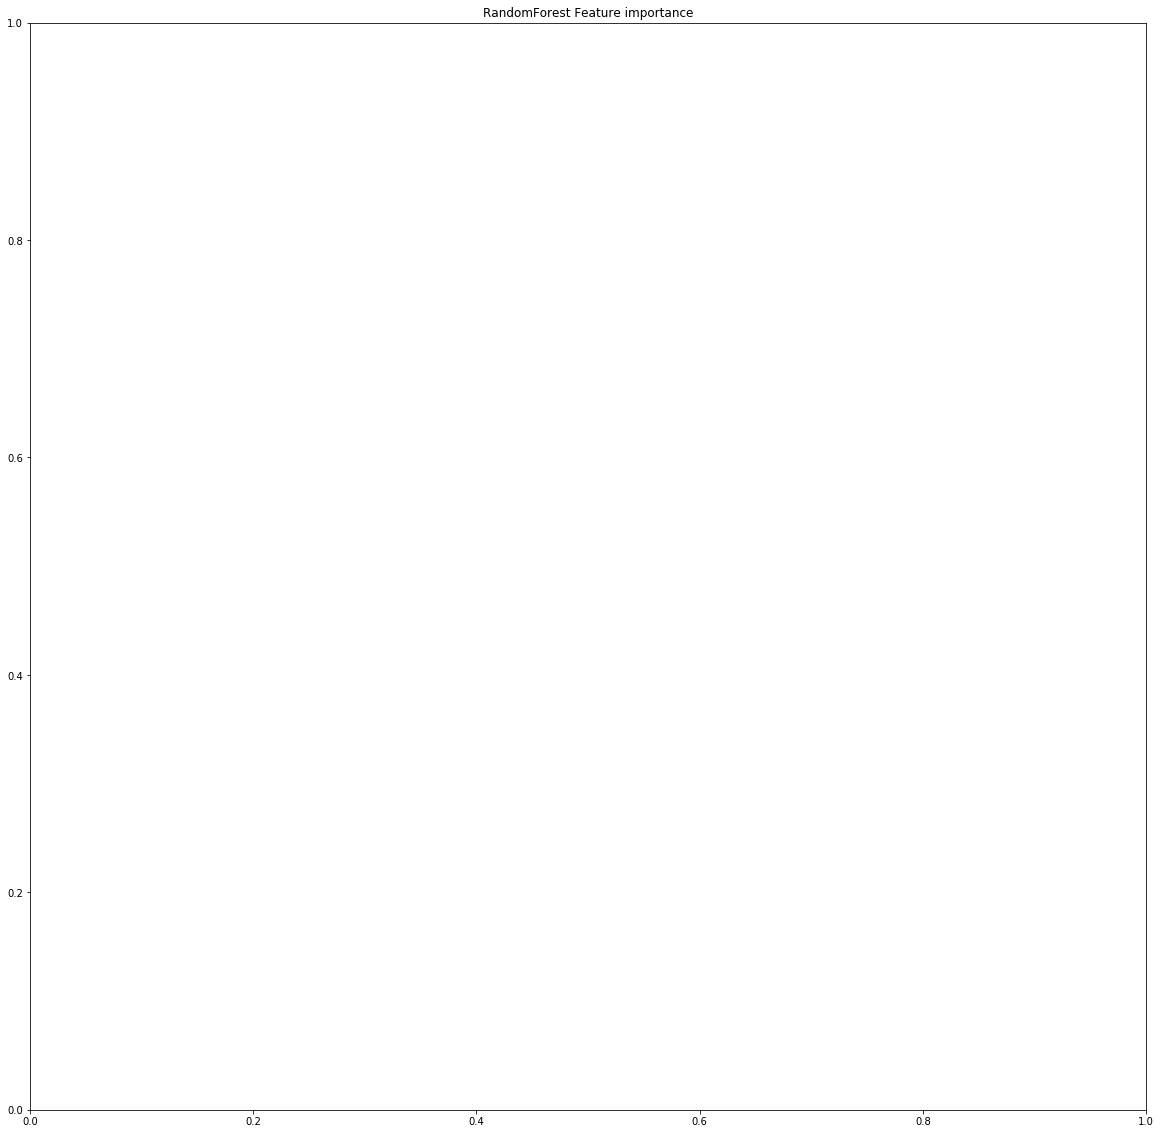

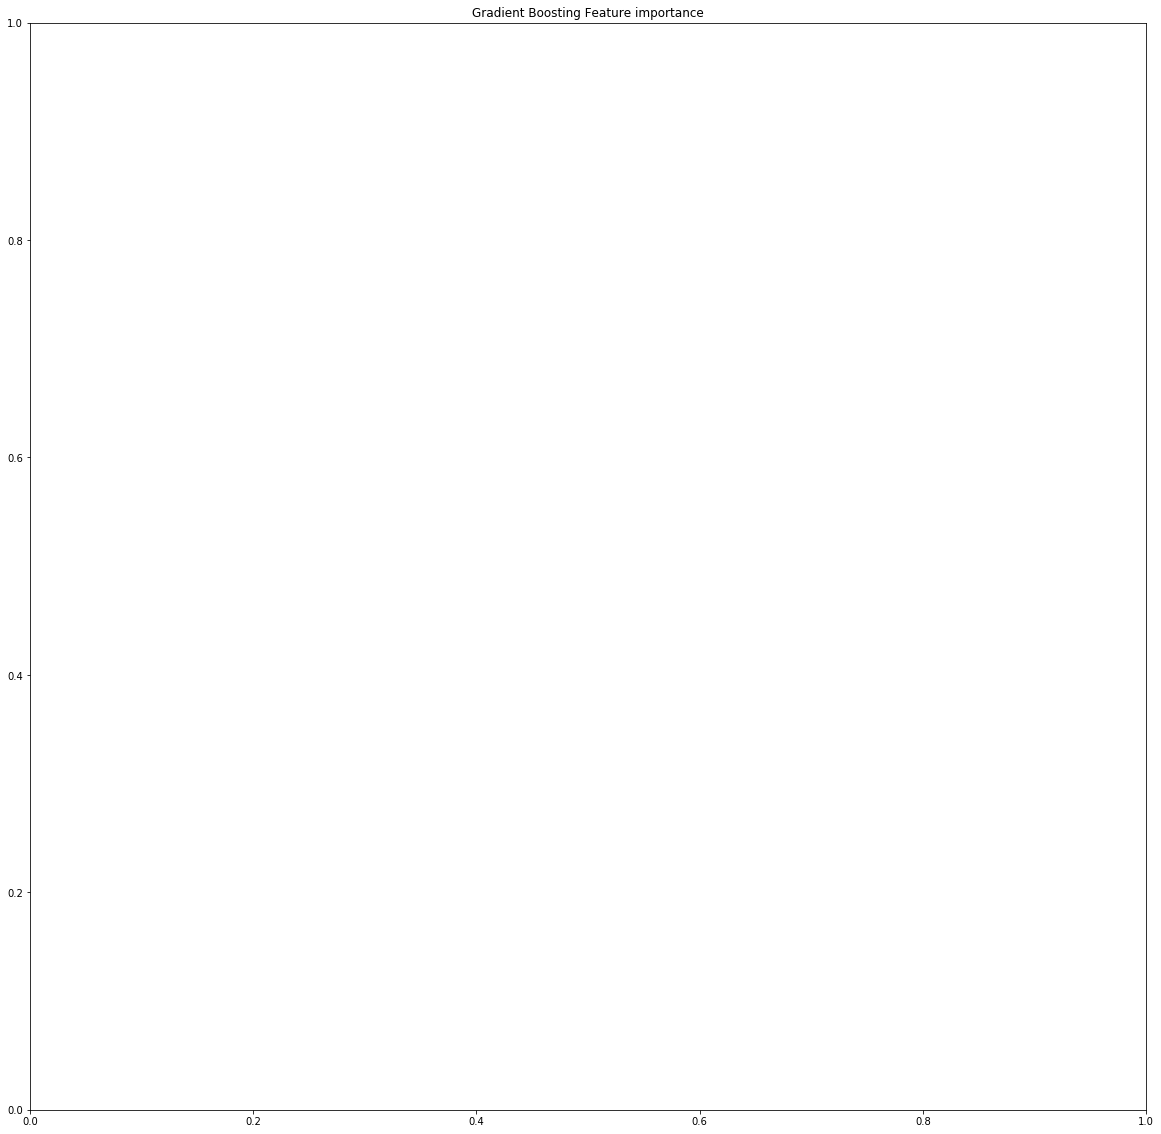

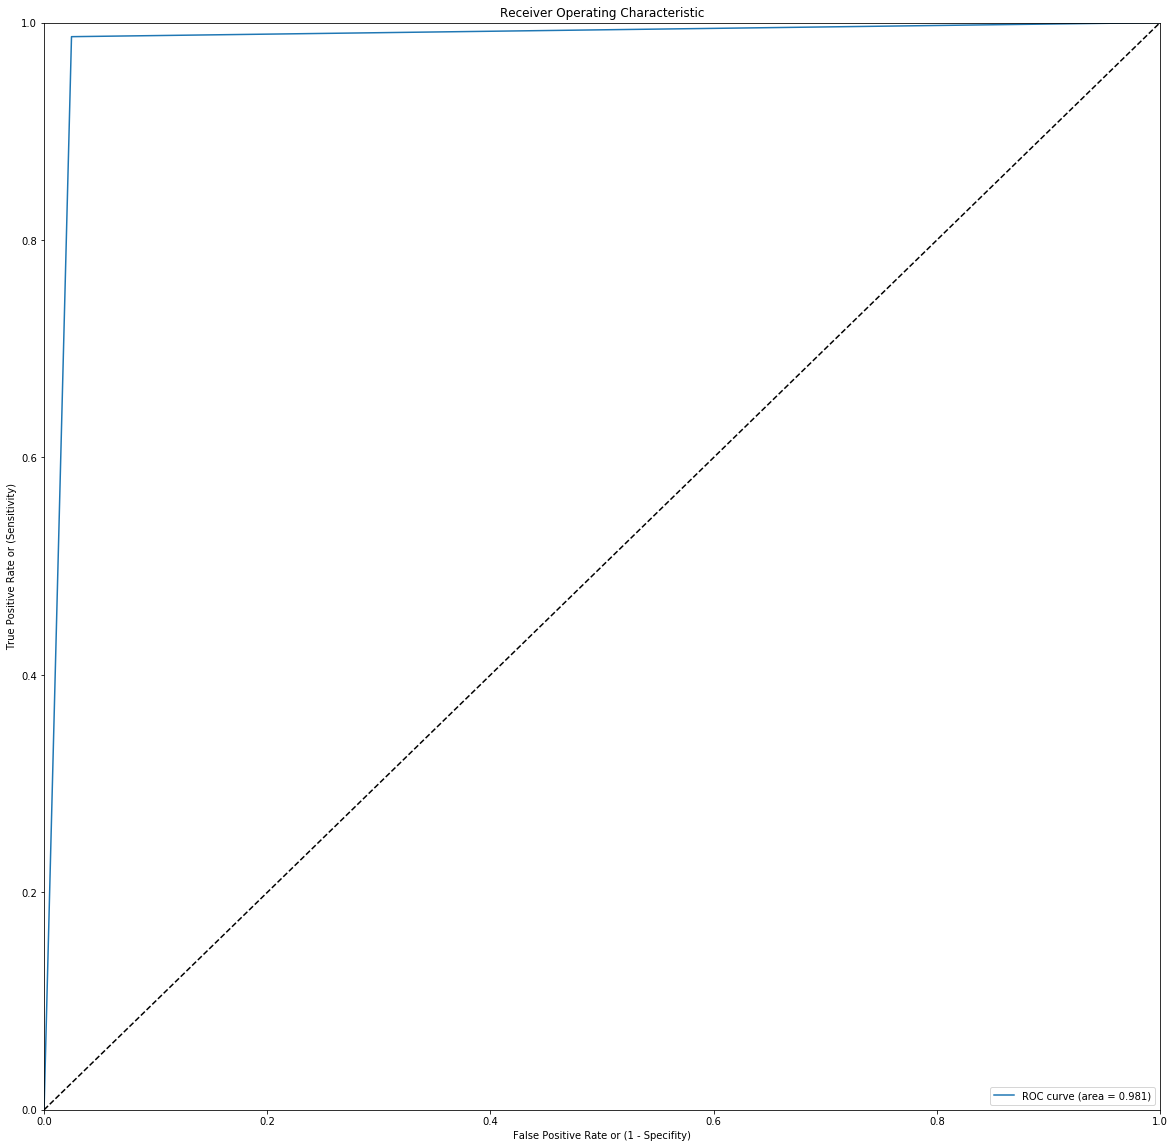

In [44]:
from sklearn.metrics import roc_curve, auc
# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(df_pruned_shifted_Y, pred_y)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# LSTM Predictor

In [76]:
%reset -f
testID = 0

import os
import shutil

import pandas as pd
import numpy as np
import math as mt
import matplotlib.pyplot as plt
import seaborn as sns
import time
from timeit import default_timer as timer

# Keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.utils import plot_model

# SkLearn
import sklearn.preprocessing as SklPreProcessing
import sklearn.metrics as SklMetrics
from sklearn.preprocessing import normalize
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
   
%matplotlib inline

In [77]:
resultsDir = 'results'
validationDataResultsFile = resultsDir + '/ValidationResults.csv'

if not os.path.exists(resultsDir):
    os.makedirs(resultsDir)

if os.path.exists(validationDataResultsFile):
    shutil.move(validationDataResultsFile, validationDataResultsFile + '.' + str(int(time.time())))

fileHeader = 'testID, FMeasure, Accuracy, Precision, Recall\n'
text_file = open(validationDataResultsFile, 'w')
text_file.write(fileHeader)
text_file.close()

In [78]:
def updateResultsToFile(testID, resultsMap):
    strData = str(testID)
    strData += ','
    strData += resultsMap['FMeasure']
    strData += ','
    strData += resultsMap['Accuracy']
    strData += ','
    strData += resultsMap['Precision']
    strData += ','
    strData += resultsMap['Recall']
    strData += '\n'

    text_file = open(validationDataResultsFile, 'a')
    text_file.write(strData)
    text_file.close()

In [79]:
class Scoring_Functions():
    #
    def __init__(self, y_pred, y_true):
        self.y_pred = y_pred
        self.y_true = y_true
    #
    def accuracy(self):
        # http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score
        return str(accuracy_score(self.y_true, self.y_pred) * 100) + "%"
    #
    def precision(self):
        # http: // scikit - learn.org / stable / modules / generated / sklearn.metrics.precision_score.html  # sklearn.metrics.precision_score
        return str(precision_score(self.y_true, self.y_pred, average='weighted')* 100) + '%'
    #
    def recall(self):
        # http://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score
        return str(recall_score(self.y_true, self.y_pred, average='weighted') * 100) + '%'
    #
    def f_measure(self):
        # http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score
        return str(f1_score(self.y_true, self.y_pred, average='weighted') * 100) + '%'
    #
    def scoring_results(self):
        return "Accuracy: " + str(self.accuracy()) + "\nPrecision: " + str(self.precision()) + "\nRecall: " + str(self.recall()) + "\nFMeasure: " + str(self.f_measure())

In [80]:
class LSTMPredictor:
    ############################
    # MetaData
    __testID = None
    __cmdCount = 0
    __cmdHistory = ''
    __resultsRootDir = 'results'
    ############################
    # Dataset info
    __eegData = None
    __eegHeader = None
    __testDataIndex = 0
    __trainDataFileName = None
    __testDataFileName = None
    ############################
    # ML model info
    __model = None
    __trainTestMap = None
    ############################
   
    def __init__(self, testID, trainFilename, testFilename):
        self.__testID = str(testID).zfill(5)
        self.__createTestResultsDir()
        self.__trainDataFileName = trainFilename
        self.__testDataFileName = testFilename
        self.ResetState()
        
    def ResetState(self):
        tmpFileName = ''
        self.__cmdHistory = ''
        self.__cmdCount = 0
        self.__loadData()
    
    ###########################################################################
    # Plot methods
    def PlotFeatures(self, filePrefix=None, figWidth=20, figHeight=20):
        self.__addToHistory('PlotFeatures_filePrefix:' + str(filePrefix))
        fig = plt.figure()
        fig.set_figwidth(figWidth)
        fig.set_figheight(figHeight)
        
        featureCount = len(self.__eegHeader) - 1
        idxSubplot = 0
        
        for itr in range(featureCount):
            idxSubplot = idxSubplot + 1
            currAx = fig.add_subplot(featureCount + 1, 1, idxSubplot)
            currAx.grid()
            currAx.plot(self.__eegData[:, itr])
            currAx.set_title(self.__eegHeader[itr])
        
        idxSubplot = idxSubplot + 1
        currAx = fig.add_subplot(featureCount + 1, 1, idxSubplot)
        currAx.grid()
        currAx.plot(self.__eegData[:, -1])
        currAx.set_title(self.__eegHeader[-1])

        if filePrefix is None:
            plt.show()
        else:
            pathToFile = self.__resultsRootDir + "/" + self.__testID + "/" + filePrefix
            plt.savefig(pathToFile)
            
    def PlotBoxPlots(self, filePrefix=None, figWidth=20, figHeight=20):
        self.__addToHistory('PlotBoxPlots_filePrefix:' + str(filePrefix))
        fig = plt.figure()
        fig.set_figwidth(figWidth)
        fig.set_figheight(figHeight)
        
        ax1 = fig.add_subplot(2, 1, 1)
        ax1.set_title('Feature range: Full')
        ax1.boxplot(self.__eegData[:, :-1]
                    , sym='b.'
                    , vert=False
                    , whis='range'
                    , labels=self.__eegHeader[:-1]
                    , meanline=True
                    , showbox=True
                    , showfliers=True)
        
        ax2 = fig.add_subplot(2, 1, 2)
        ax2.set_title('Feature range: [5%, 95%]')
        ax2.boxplot(self.__eegData[:, :-1]
                    , sym='b.'
                    , vert=False
                    , whis=[5, 95]
                    , labels=self.__eegHeader[:-1]
                    , meanline=True
                    , showbox=True
                    , showfliers=False)
        
        if filePrefix is not None:
            pathToFile = self.__resultsRootDir + "/" + self.__testID + "/" + filePrefix
            plt.savefig(pathToFile)
            
    def PlotMeanDistribution(self, filePrefix=None, figWidth=20, figHeight=20):
        self.__addToHistory('PlotMeanDistribution_filePrefix:' + str(filePrefix))
        idxEyeClosed = np.where(self.__eegData[:, -1] == 1)[0]
        idxEyeOpened = np.where(self.__eegData[:, -1] == 0)[0]
        
        featureCount = len(self.__eegHeader) - 1
        xTick = np.array(range(featureCount))
        
        fig = plt.figure()
        fig.set_figwidth(figWidth)
        fig.set_figheight(figHeight)

        ax = fig.add_subplot(1, 1, 1)
        ax.grid()
        ax.set_title('Mean Distribution')
        ax.set_xticklabels(self.__eegHeader[0:-1])
        ax.set_xticks(xTick)

        ax.plot(xTick, self.__eegData[idxEyeOpened][:, 0:featureCount].mean(axis=0), 'bo')
        ax.plot(xTick, self.__eegData[idxEyeClosed][:, 0:featureCount].mean(axis=0), 'ro')
        ax.plot(xTick, self.__eegData[:, 0:featureCount].mean(axis=0), 'go')

        ax.legend(['Eye Open', 'Eye Closed', 'Both'])
        
        if filePrefix is not None:
            pathToFile = self.__resultsRootDir + "/" + self.__testID + "/" + filePrefix
            plt.savefig(pathToFile)

    def PlotStdDevDistribution(self, filePrefix=None, figWidth=20, figHeight=20):
        self.__addToHistory('PlotStdDevDistribution_filePrefix:' + str(filePrefix))
        idxEyeClosed = np.where(self.__eegData[:, -1] == 1)[0]
        idxEyeOpened = np.where(self.__eegData[:, -1] == 0)[0]
        
        featureCount = len(self.__eegHeader) - 1
        xTick = np.array(range(featureCount))
        
        fig = plt.figure()
        fig.set_figwidth(figWidth)
        fig.set_figheight(figHeight)

        ax = fig.add_subplot(1, 1, 1)
        ax.grid()
        ax.set_title('Standard Deviation Distribution')
        ax.set_xticklabels(self.__eegHeader[0:-1])
        ax.set_xticks(xTick)

        ax.plot(xTick, self.__eegData[idxEyeOpened][:, 0:featureCount].std(axis=0), 'bo')
        ax.plot(xTick, self.__eegData[idxEyeClosed][:, 0:featureCount].std(axis=0), 'ro')
        ax.plot(xTick, self.__eegData[:, 0:featureCount].std(axis=0), 'go')

        ax.legend(['Eye Open', 'Eye Closed', 'Both'])
        
        if filePrefix is not None:
            pathToFile = self.__resultsRootDir + "/" + self.__testID + "/" + filePrefix
            plt.savefig(pathToFile)
            
    def FeatureCorrelationMatrix(self, filePrefix=None, figWidth=20, figHeight=20):
        self.__addToHistory('FeatureCorrelationMatrix_filePrefix:' + str(filePrefix))
        # Compute the correlation matrix
        corr = pd.DataFrame(data=self.__eegData[:, :-1], columns=list(self.__eegHeader[:-1])).corr()
        
        # Generate a mask for the upper triangle
        mask = np.zeros_like(corr, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True
        
        # Set up the matplotlib figure
        fig = plt.figure()
        fig.set_figwidth(figWidth)
        fig.set_figheight(figHeight)
        
        ax = fig.add_subplot(1, 1, 1)
        ax.set_title("Feature correlation matrix")
        
        # Generate a custom diverging colormap
        cmap = sns.diverging_palette(240, 10, as_cmap=True)
        
        # Draw the heatmap
        sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=-1.0, center=0,
                    square=True, linewidths=.5, cbar_kws={"shrink": .5})
        
        if filePrefix is not None:
            pathToFile = self.__resultsRootDir + "/" + self.__testID + "/" + filePrefix
            plt.savefig(pathToFile)

    ###########################################################################
    # Getters
    def GetFeatureNames(self):
        return self.__eegHeader[:-1]
    
    def GetCmdHistory(self):
        return self.__cmdHistory
    ###########################################################################
    # Dataset operations
    def RemoveFeatures(self, indices):
        assert isinstance(indices, list), 'Parameter must be a list'

        self.__addToHistory('RemoveFeatures:' + ','.join(str(x) for x in indices))
        self.__eegHeader = np.delete(self.__eegHeader, indices)
        self.__eegData = np.delete(self.__eegData, indices, axis=1)
    
    def RemoveOutliers(self, upperLimit=None, lowerLimit=None):
        outLierIndexes = set()
        result = {}
        result['upper'] = set()
        result['lower'] = set()
        
        self.__addToHistory('RemoveOutliers_Upper:' + str(upperLimit)
                            + '_Lower:' + str(lowerLimit))
        featureCount = len(self.__eegHeader) - 1

        if upperLimit is not None:
            for itr in range(featureCount):
                outLiers = np.where(self.__eegData[:, itr] > upperLimit)[0]
                if len(outLiers) > 0:
                    for i in xrange(len(outLiers)):
                        result['upper'].add(outLiers[i])

        if lowerLimit is not None:
            for itr in range(featureCount):
                outLiers = np.where(self.__eegData[:, itr] < lowerLimit)[0]
                if len(outLiers) > 0:
                    for i in xrange(len(outLiers)):
                        result['lower'].add(outLiers[i])
                        
        deleteIndexes = list(result['upper'].union(result['lower']))
        self.__eegData = np.delete(self.__eegData, deleteIndexes, axis=0)
        
        return result

    def NormalizeData(self, normFunc='MinMax'):
        self.__addToHistory('NormalizeData_Func:' + normFunc)
        
        if normFunc == 'MinMax':
            scaler = SklPreProcessing.MinMaxScaler(feature_range=(0, 1))
            self.__eegData = scaler.fit_transform(self.__eegData)
        else:
            self.__eegData = normalize(self.__eegData, norm=normFunc)
        
    ###########################################################################
    # Keras LSTM model
    def CompileModel(self, lagCount, neuronCount, dropOut,
                     modelArchitectureFilename,
                     lstmStackCount=1, useLaggedOutput=True,
                     lossFunc='mae', optimizerFunc='adam'):
        assert lstmStackCount > 0, 'lstmStackCount must be > 0'
        self.__addToHistory('CompileModel_Lag:' + str(lagCount)
                            + '_NeuronCount:' + str(neuronCount)
                            + '_DropOut:' + str(dropOut)
                            + '_useLaggedOutput:' + str(useLaggedOutput)
                            + '_LossFunc:' + str(lossFunc)
                            + '_OptimizerFunc:' + str(optimizerFunc)
                            + '_lstmStackCount:' + str(lstmStackCount))
        
        supervisedDataset = self.__timeSeriesToSupervised(lagCount, useLaggedOutput)
        featureCount = len(self.__eegHeader) - 1
        
        values = supervisedDataset.values
        
        trainingSet = values[:self.__testDataIndex, :]
        testingSet = values[self.__testDataIndex:, :]
        
        pastInputCount = (featureCount + 1) * lagCount
        self.__trainTestMap = {}

        self.__trainTestMap['trainingSet_inFeatures'] = trainingSet[:, :pastInputCount]
        self.__trainTestMap['trainingSet_outFeature'] = trainingSet[:, -1]
        
        self.__trainTestMap['testingSet_inFeatures'] = testingSet[:, :pastInputCount]
        self.__trainTestMap['testingSet_outFeature'] = testingSet[:, -1]
        
        # Reshape input to be 3D [samples, timesteps, features]
        featureDimSize = (featureCount + 1)
        
        self.__trainTestMap['trainingSet_inFeatures_reShaped'] = self.__trainTestMap['trainingSet_inFeatures'].reshape(
            (self.__trainTestMap['trainingSet_inFeatures'].shape[0], lagCount, featureDimSize))
        
        self.__trainTestMap['testingSet_inFeatures_reShaped'] = self.__trainTestMap['testingSet_inFeatures'].reshape(
            (self.__trainTestMap['testingSet_inFeatures'].shape[0], lagCount, featureDimSize))
        
        # Design network
        self.__model = Sequential()
        
        if lstmStackCount == 1:
            self.__model.add(
                LSTM(neuronCount,
                     input_shape=(
                         self.__trainTestMap['trainingSet_inFeatures_reShaped'].shape[1],
                         self.__trainTestMap['trainingSet_inFeatures_reShaped'].shape[2])
                    )
            )
        else:
            self.__model.add(
                LSTM(neuronCount,
                     input_shape=(
                         self.__trainTestMap['trainingSet_inFeatures_reShaped'].shape[1],
                         self.__trainTestMap['trainingSet_inFeatures_reShaped'].shape[2]),
                     return_sequences=True)
            )
            
            for i in range(lstmStackCount - 1):
                returnSequence = (i != (lstmStackCount - 2))
                self.__model.add(LSTM(neuronCount, return_sequences=returnSequence))
        
        self.__model.add(Dense(1))
        self.__model.compile(loss=lossFunc, optimizer=optimizerFunc)
        
        # Visualize LSTM network
        pathToFile = self.__resultsRootDir + "/" + self.__testID + "/" + modelArchitectureFilename
        plot_model(self.__model, to_file=pathToFile, show_shapes=True)
        
    def FitModel(self, epochCount, batchSize,
                 resultsFile,
                 trainValidationRatio=0.8,
                 lossFuncFilePrefix=None,
                 predictionFilePrefix=None,
                 figWidth=20, figHeight=20, verbosity=2):
        assert self.__model != None, 'Model not compiled'
        
        self.__addToHistory('FitModel_EpochCount:' + str(epochCount)
                            + '_BatchSize:' + str(batchSize)
                            + '_trainValidationRatio:' + str(trainValidationRatio)
                            + '_lossFuncFilePrefix:' + str(lossFuncFilePrefix)
                            + '_predictionFilePrefix:' + str(predictionFilePrefix))
        
        trainValidationSplit = int(len(self.__trainTestMap['trainingSet_inFeatures_reShaped']) * trainValidationRatio)
        
        # Fit model
        start = timer()
        history = self.__model.fit(self.__trainTestMap['trainingSet_inFeatures_reShaped'][:trainValidationSplit, :],
                                 self.__trainTestMap['trainingSet_outFeature'][:trainValidationSplit],
                                 epochs=epochCount,
                                 batch_size=batchSize,
                                 validation_data=(
                                     self.__trainTestMap['trainingSet_inFeatures_reShaped'][trainValidationSplit:, :],
                                     self.__trainTestMap['trainingSet_outFeature'][trainValidationSplit:]
                                 ),
                                 verbose=verbosity, shuffle=False)
        end = timer()
        
        fig = plt.figure()
        fig.set_figwidth(figWidth)
        fig.set_figheight(figHeight)

        ax = fig.add_subplot(1, 1, 1)
        ax.grid()
        ax.set_title('Loss Function')
        ax.plot(history.history['loss'])
        ax.plot(history.history['val_loss'])
        plt.legend(['TrainingData', 'ValidationData'])
                    
        if lossFuncFilePrefix is not None:
            pathToFile = self.__resultsRootDir + "/" + self.__testID + "/" + lossFuncFilePrefix
            plt.savefig(pathToFile)

        testDataPrediction = self.__model.predict_classes(self.__trainTestMap['testingSet_inFeatures_reShaped'])
        testDataPredictionRaw = self.__model.predict(self.__trainTestMap['testingSet_inFeatures_reShaped'])
        testDataScore = Scoring_Functions(testDataPrediction, self.__trainTestMap['testingSet_outFeature'])
        
        validationDataPrediction = self.__model.predict_classes(
            self.__trainTestMap['trainingSet_inFeatures_reShaped'][trainValidationSplit:, :])
        validationDataScore = Scoring_Functions(validationDataPrediction, self.__trainTestMap['trainingSet_outFeature'][trainValidationSplit:])

        results = 'Test data results:\n------------------\n'
        results += testDataScore.scoring_results()
        results += '\n\nValidation data results:\n------------------------\n'
        results += validationDataScore.scoring_results()
        results += '\n\nExecution time: '
        results += str(end - start)
        results += 'secs'
        self.__writeResultsToFile(resultsFile, results)

        fig = plt.figure()
        fig.set_figwidth(figWidth)
        fig.set_figheight(figHeight)
        
        ax1 = fig.add_subplot(3, 1, 1)
        ax1.grid()
        ax1.set_title('Expected')
        ax1.plot(self.__trainTestMap['testingSet_outFeature'])

        ax2 = fig.add_subplot(3, 1, 2)
        ax2.grid()
        ax2.set_title('Prediction - With rounding')
        ax2.plot(testDataPrediction)

        ax3 = fig.add_subplot(3, 1, 3)
        ax3.grid()
        ax3.set_title('Prediction - Without rounding')
        ax3.plot(testDataPredictionRaw)

        if predictionFilePrefix is not None:
            pathToFile = self.__resultsRootDir + "/" + self.__testID + "/" + predictionFilePrefix
            plt.savefig(pathToFile)

        # Reset __model
        self.__model = None
        self.__trainTestMap = None
        
        result = {}
        result['FMeasure'] = validationDataScore.f_measure()
        result['Accuracy'] = validationDataScore.accuracy()
        result['Precision'] = validationDataScore.precision()
        result['Recall'] = validationDataScore.recall()
        
        return result
    
    ###########################################################################
    # Private methods
    def __createTestResultsDir(self):
        dirName = "%s/%s" % (self.__resultsRootDir, self.__testID)
        if os.path.exists(dirName):
            shutil.rmtree(dirName)
        os.makedirs(dirName)
        
    def __loadData(self):
        self.__eegHeader = np.genfromtxt(self.__trainDataFileName, delimiter=',', max_rows=1, dtype=str)
        self.__eegData = np.genfromtxt(self.__trainDataFileName, delimiter=',', skip_header=1)
        testDataSet = np.genfromtxt(self.__testDataFileName, delimiter=',', skip_header=1)
        
        self.__testDataIndex = self.__eegData.shape[0]
        self.__eegData = np.append(self.__eegData, testDataSet, axis=0)

    def __timeSeriesToSupervised(self, lagCount, useLaggedOutput):
        featureCount = len(self.__eegHeader) - 1

        cols, names = list(), list()
        dfInput = pd.DataFrame(self.__eegData[:, :-1])
        dfOutput = pd.DataFrame(self.__eegData[:, -1])
        
        for i in range(lagCount, 0, -1):
            cols.append(dfInput.shift(i))
            if useLaggedOutput:
                cols.append(dfOutput.shift(i))
            else:
                # Set the lagged output variable to a constant 0.5
                tmp = len(dfOutput.shift(i))
                cols.append(pd.DataFrame(np.ones(tmp) * 0.5))
            
            names += [('%s(t-%d)' % (self.__eegHeader[j], i)) for j in range(featureCount)]
            names += [('%s(t-%d)' % (self.__eegHeader[-1], i))]

        cols.append(dfInput)
        cols.append(dfOutput)
        names += [('%s(t)' % self.__eegHeader[j]) for j in range(featureCount)]
        names += [('%s(t)' % self.__eegHeader[-1])]

        agg = pd.concat(cols, axis=1)
        agg.columns = names

        # Drop rows containing NaN values
        agg.dropna(inplace=True)
        return agg
    
    def __addToHistory(self, newCmd):
        tmpStr = ''
        if self.__cmdCount > 0:
            tmpStr += '\n'
            for itr in range(self.__cmdCount):
                tmpStr += '+'
                
        tmpStr += newCmd
        self.__cmdHistory += tmpStr
        self.__cmdCount += 1
        
    def __writeResultsToFile(self, resFilename, results):
        pathToResultsFile = self.__resultsRootDir + "/" + self.__testID + "/" + resFilename
        resString = ''
        
        if os.path.exists(pathToResultsFile):
            resString = '\n\n-----------------------------------------------------------------\n'
            fileMode = 'a' # Append
        else:
            fileMode = 'w' # Create
        
        text_file = open(pathToResultsFile, fileMode)
        
        resString += results
        resString += '\n\nCommand history:\n----------------\n'
        resString += self.__cmdHistory        

        text_file.write(resString)
        text_file.close()
    ###########################################################################

### Test_01
- Dataset characteristics

TestID:  1


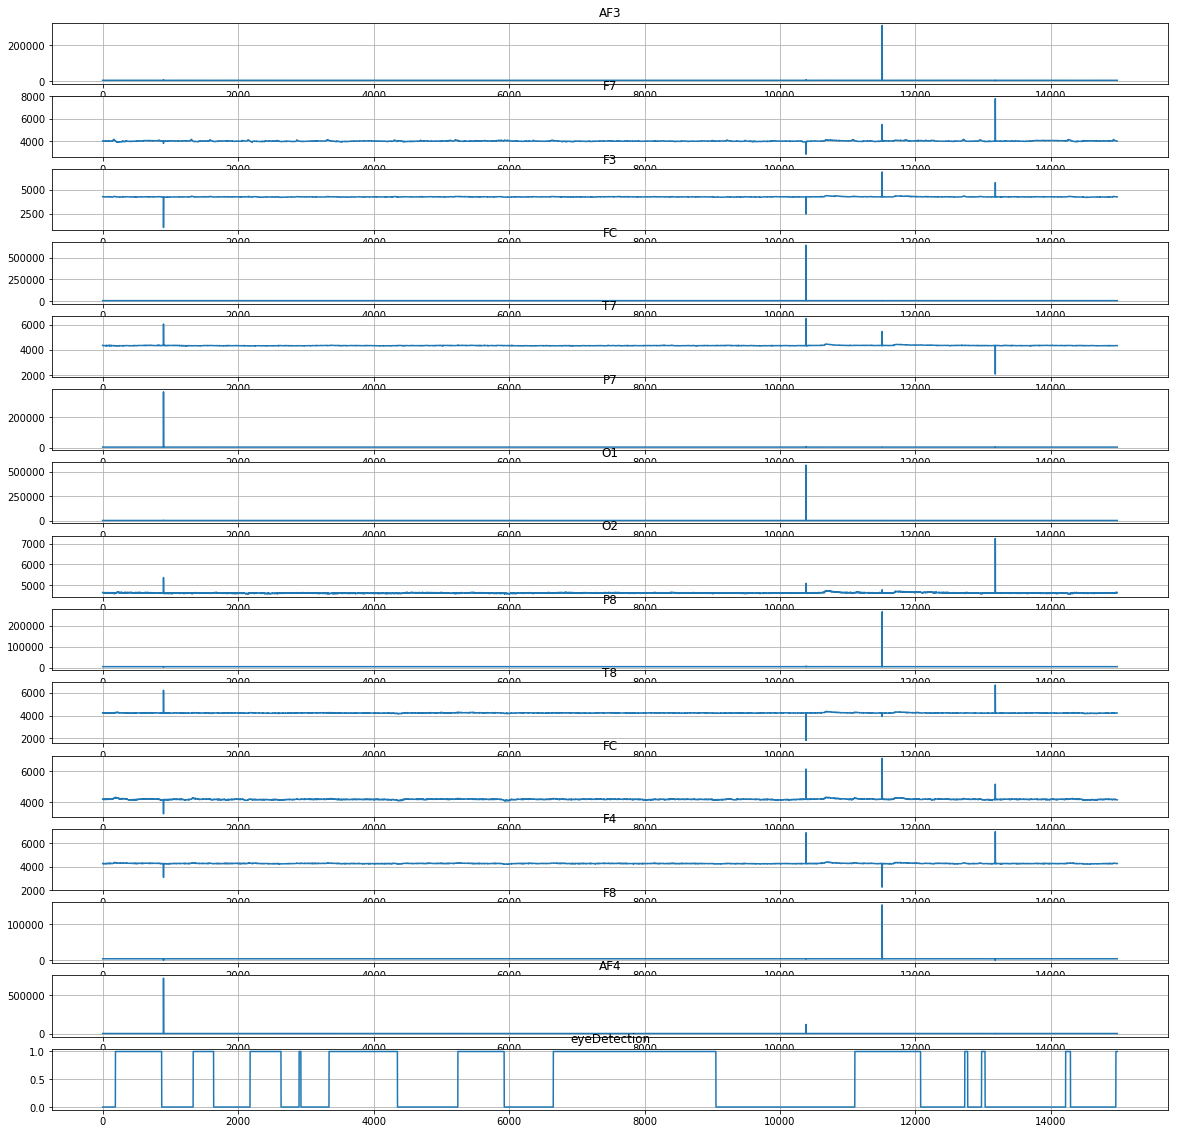

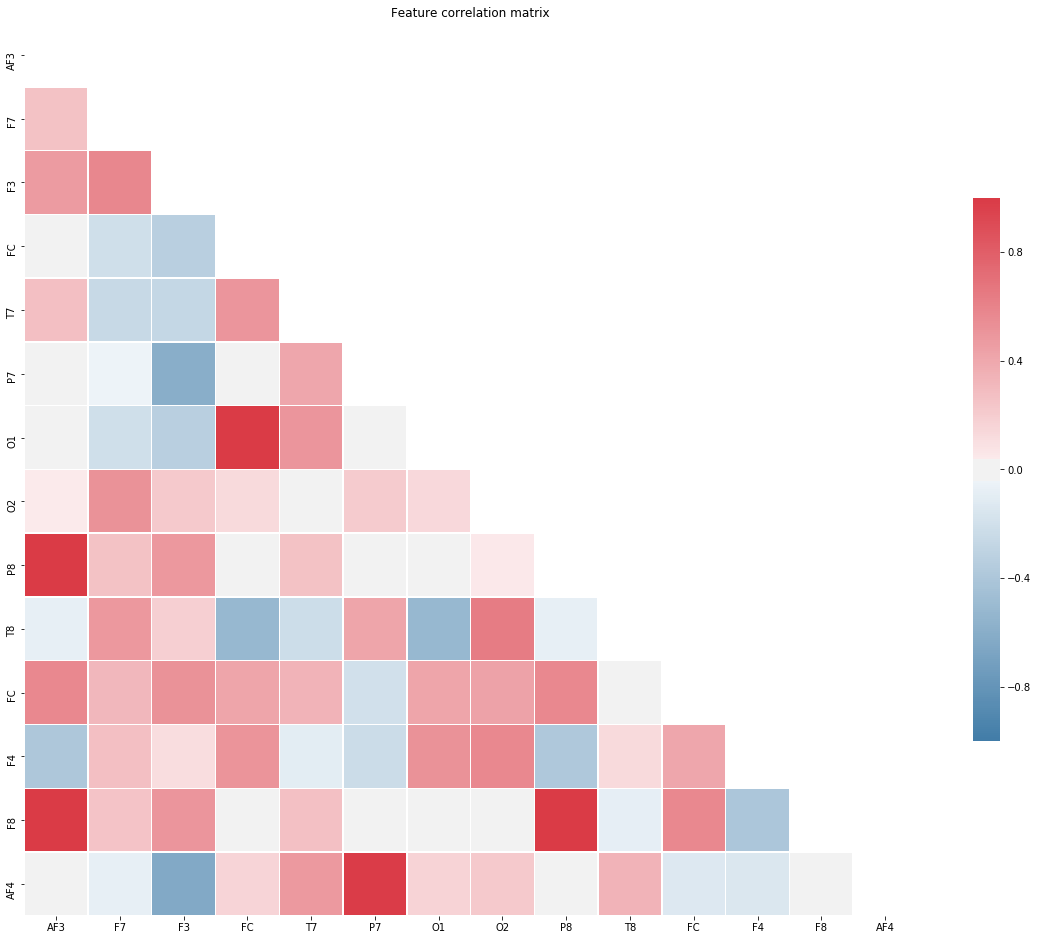

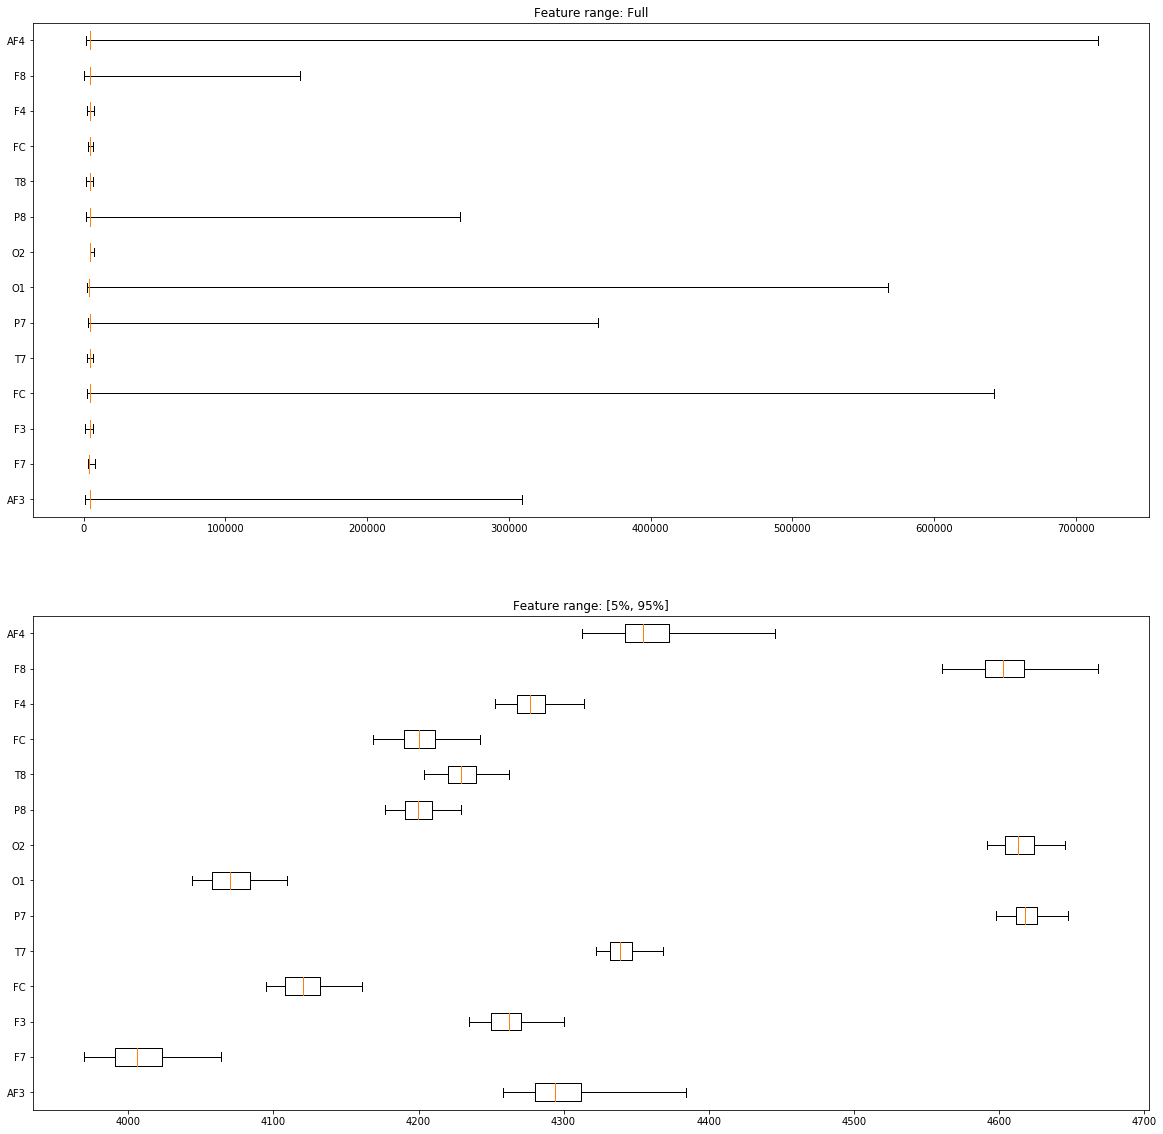

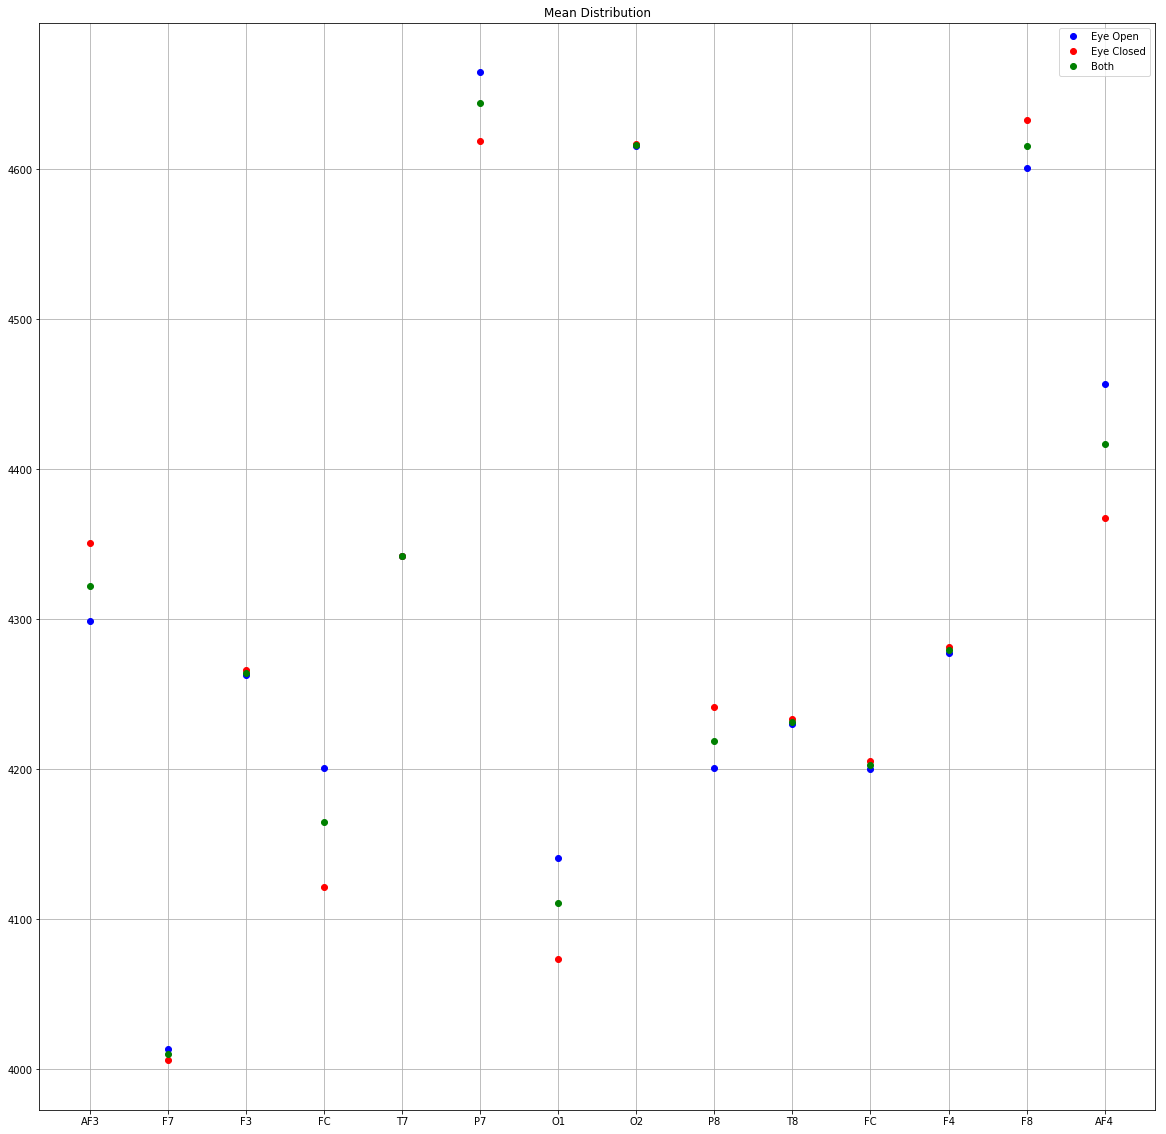

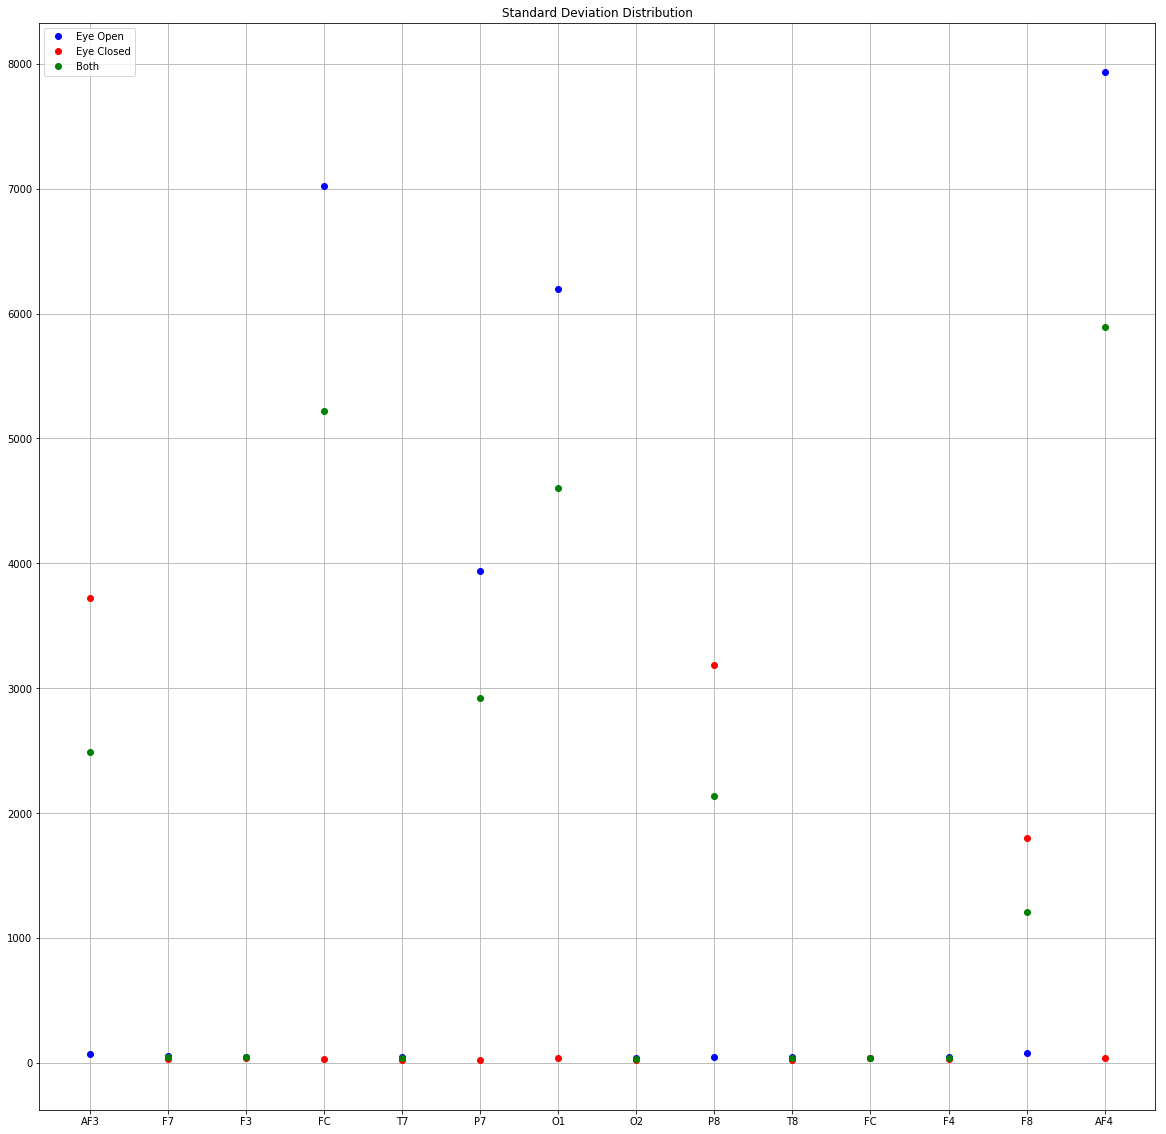

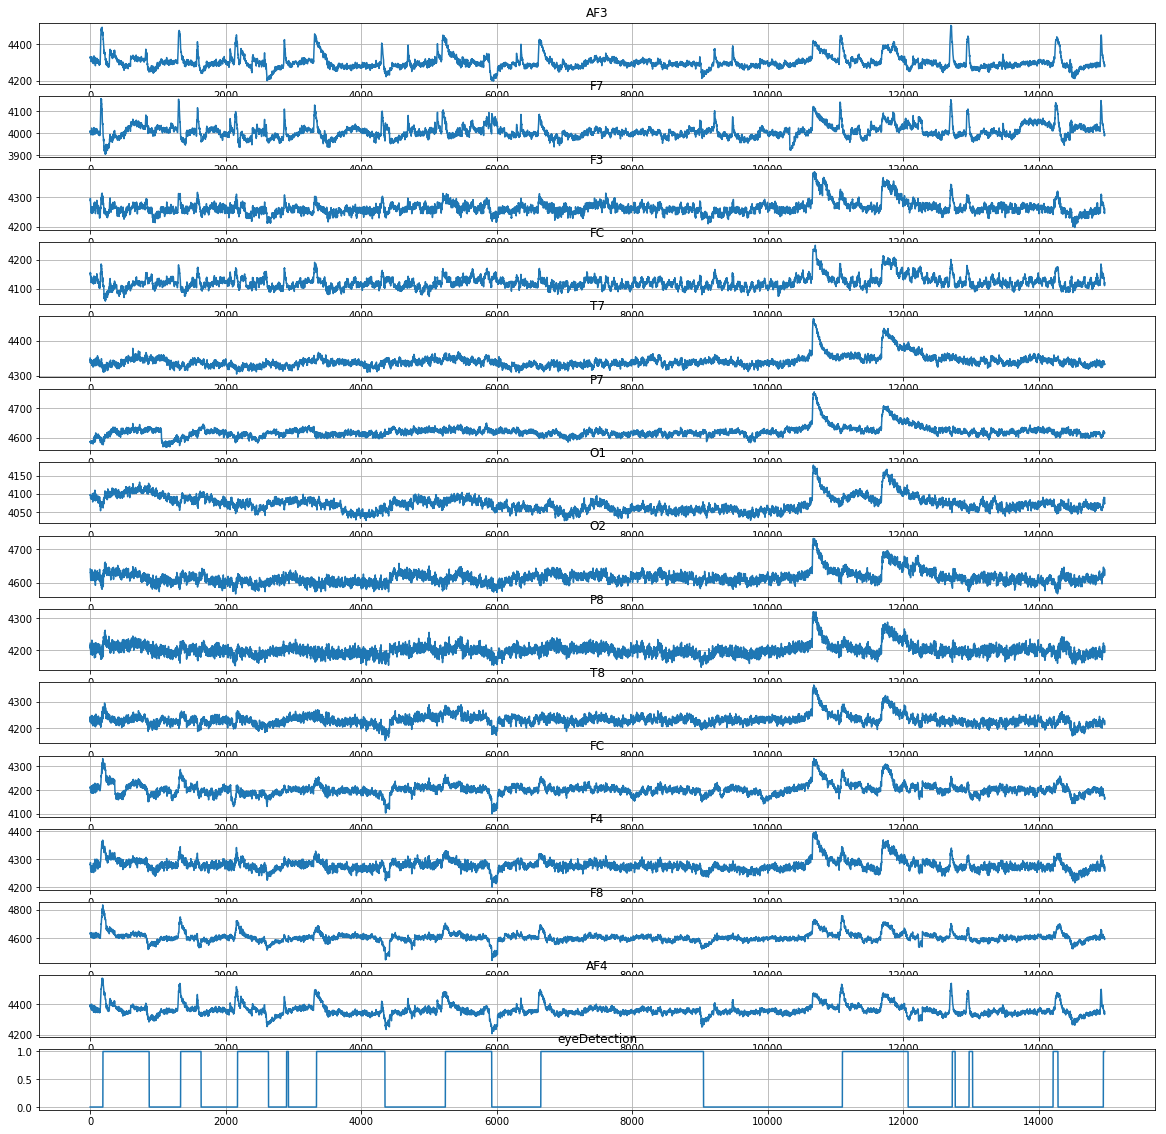

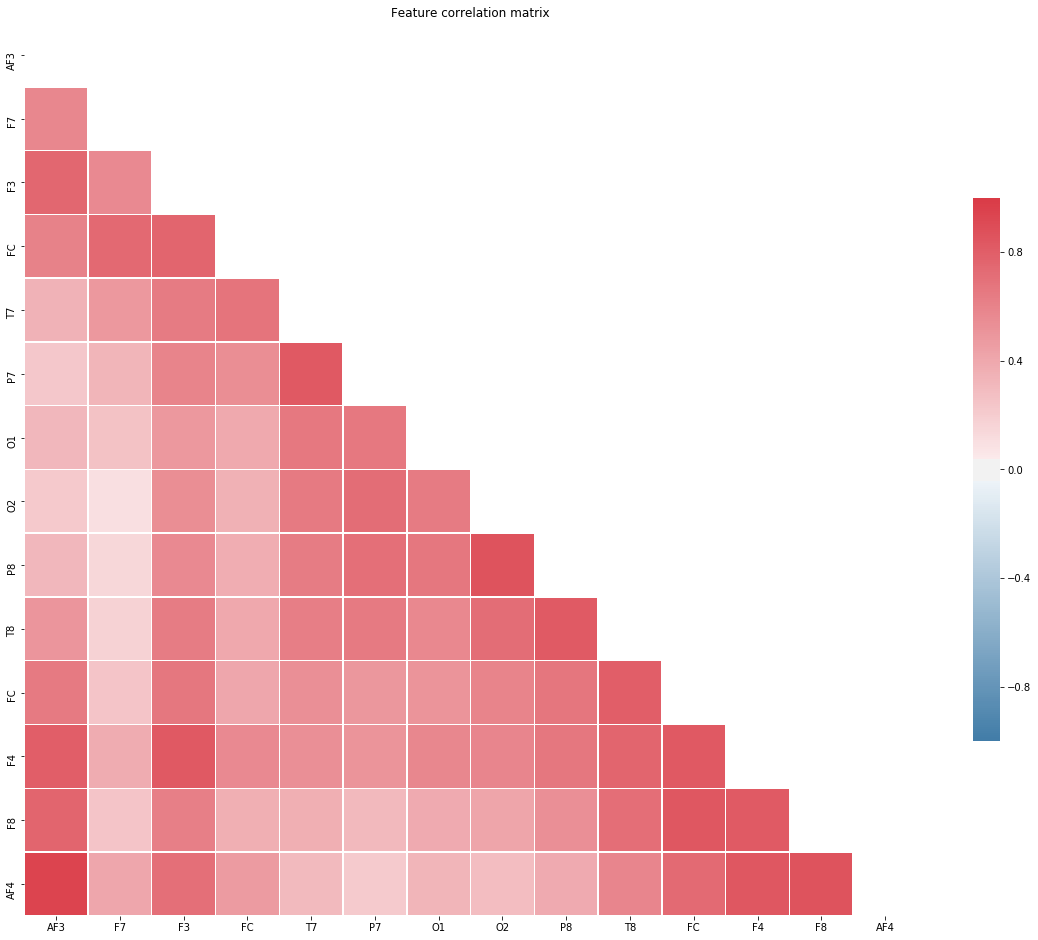

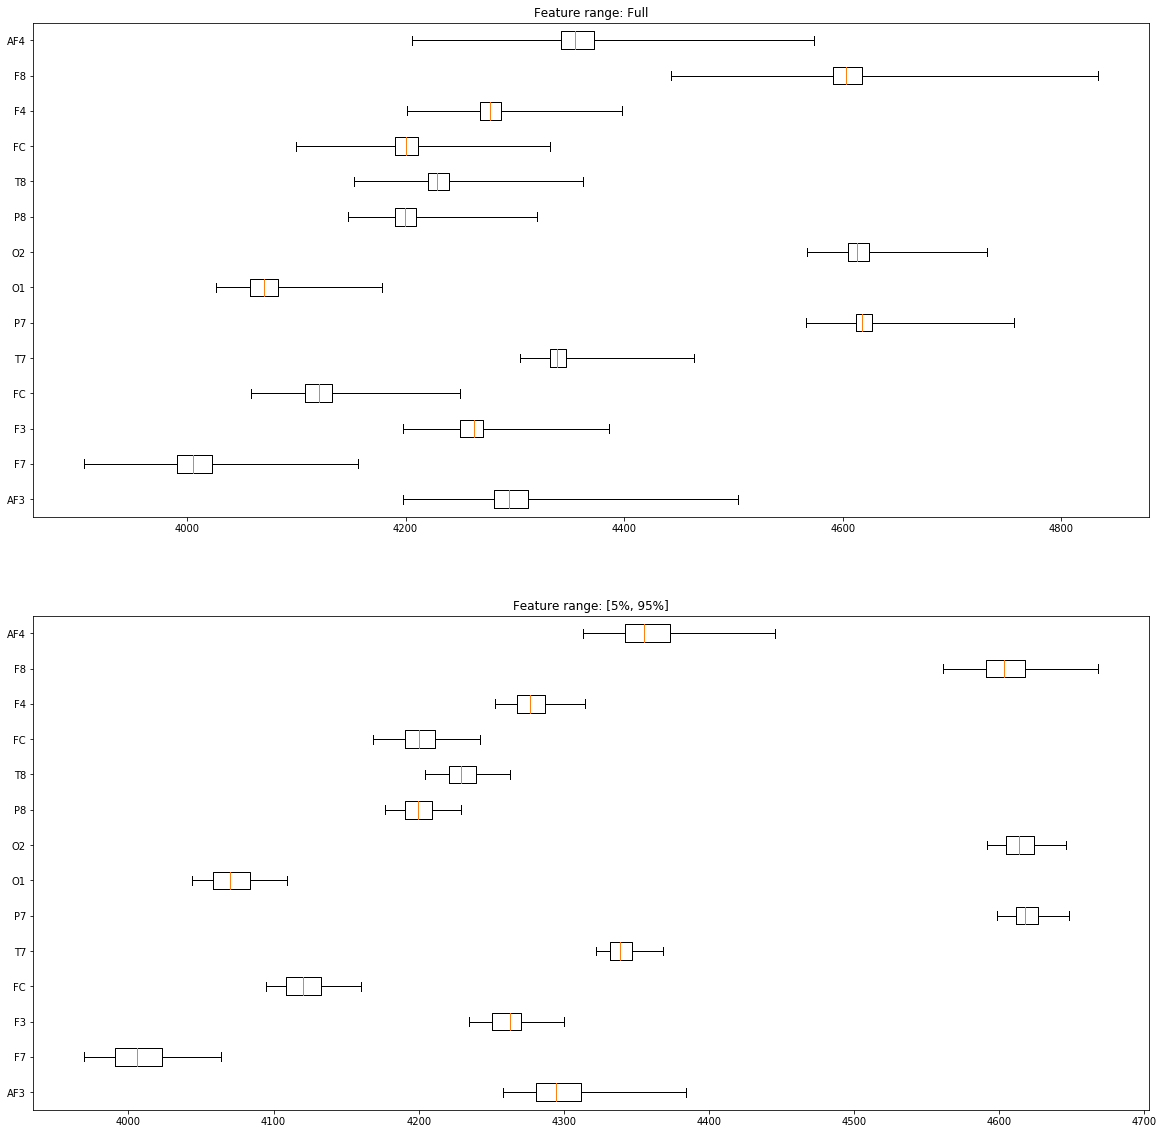

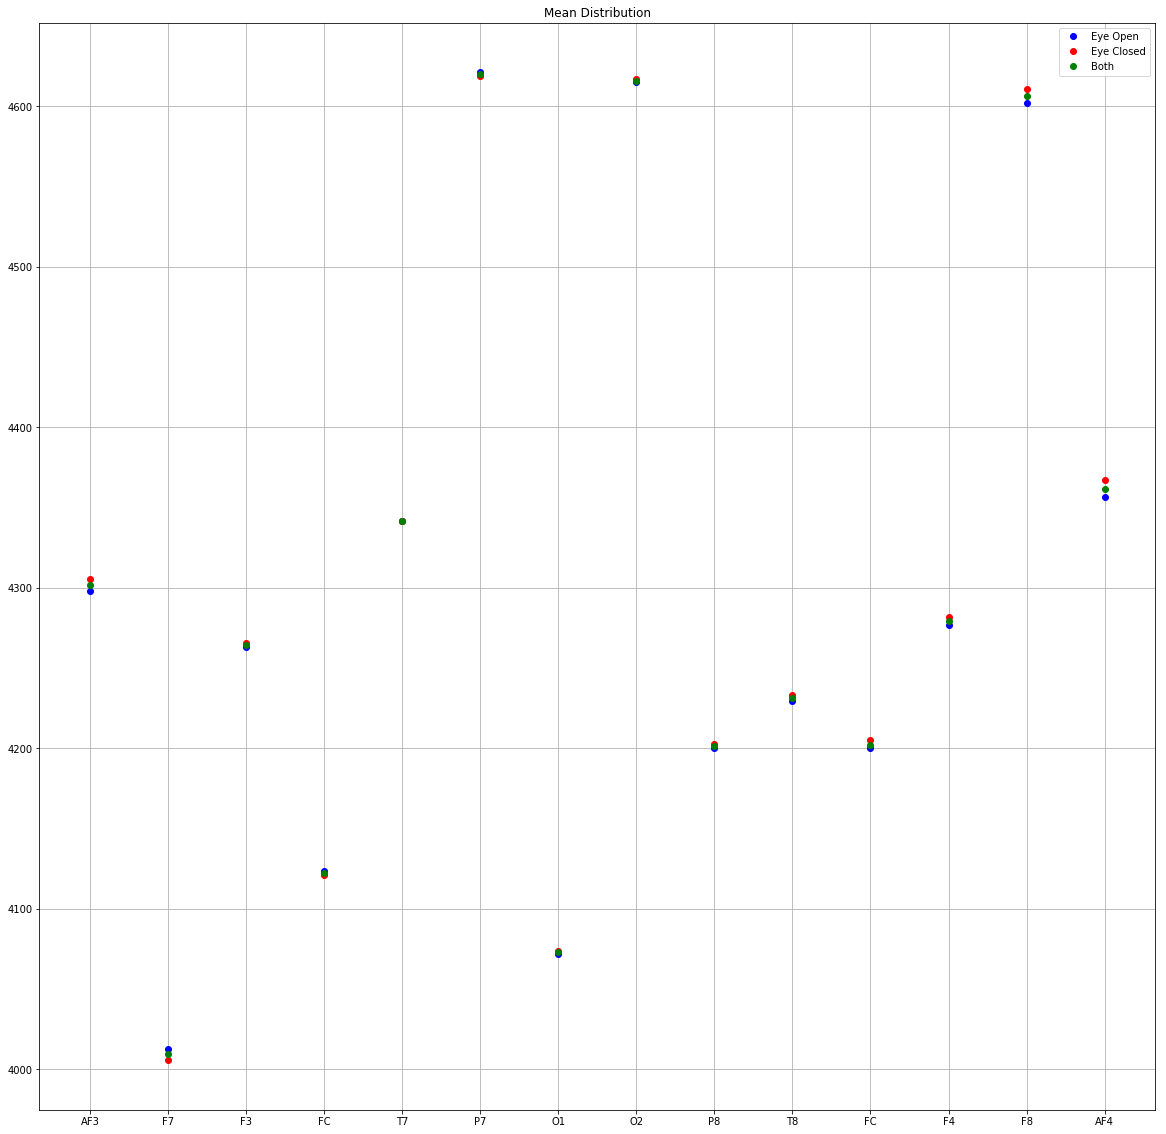

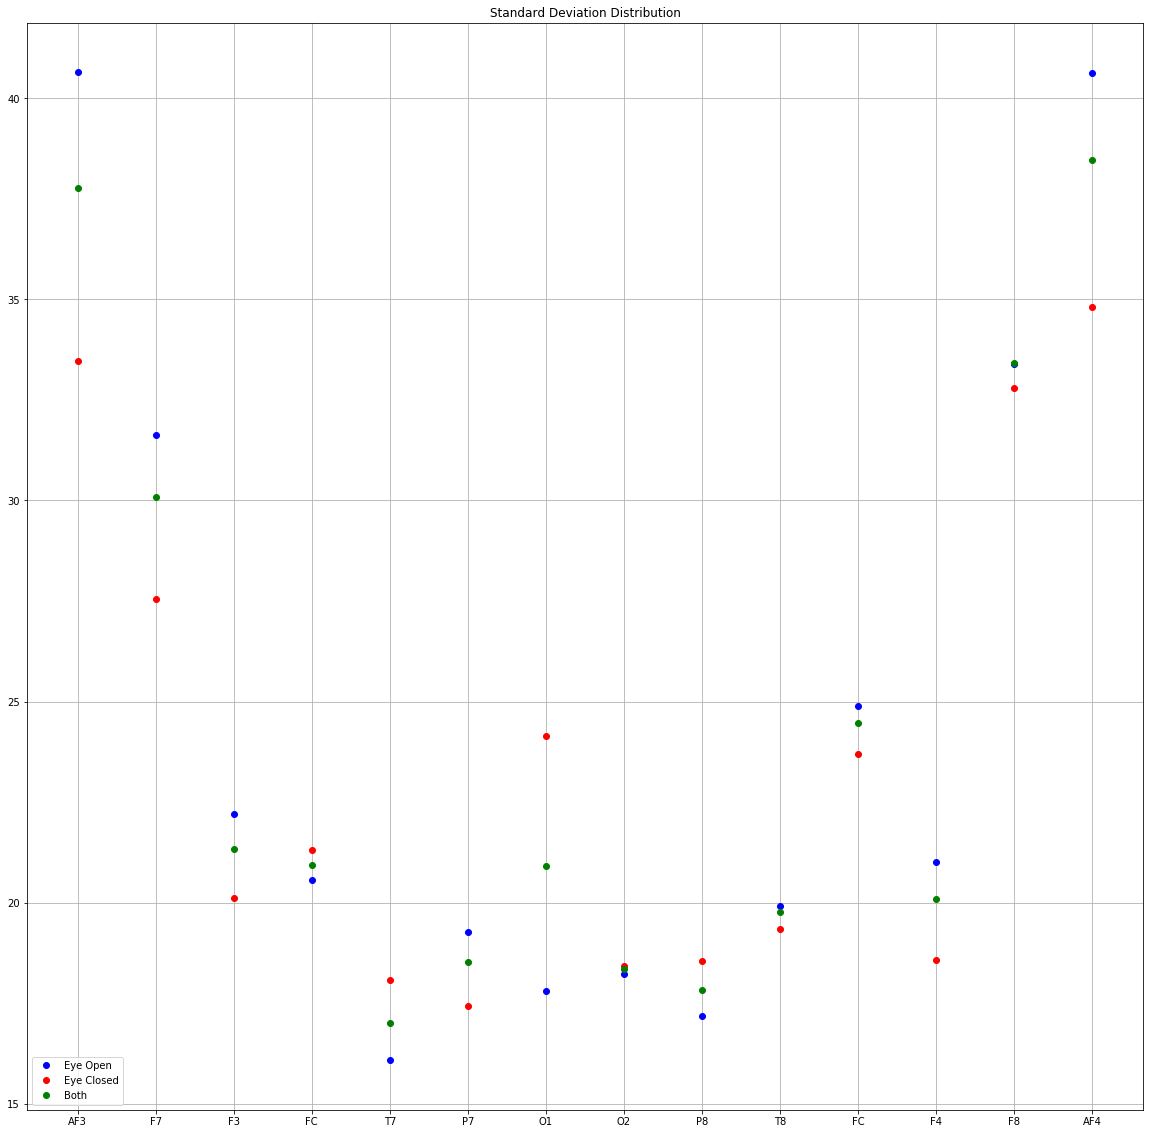

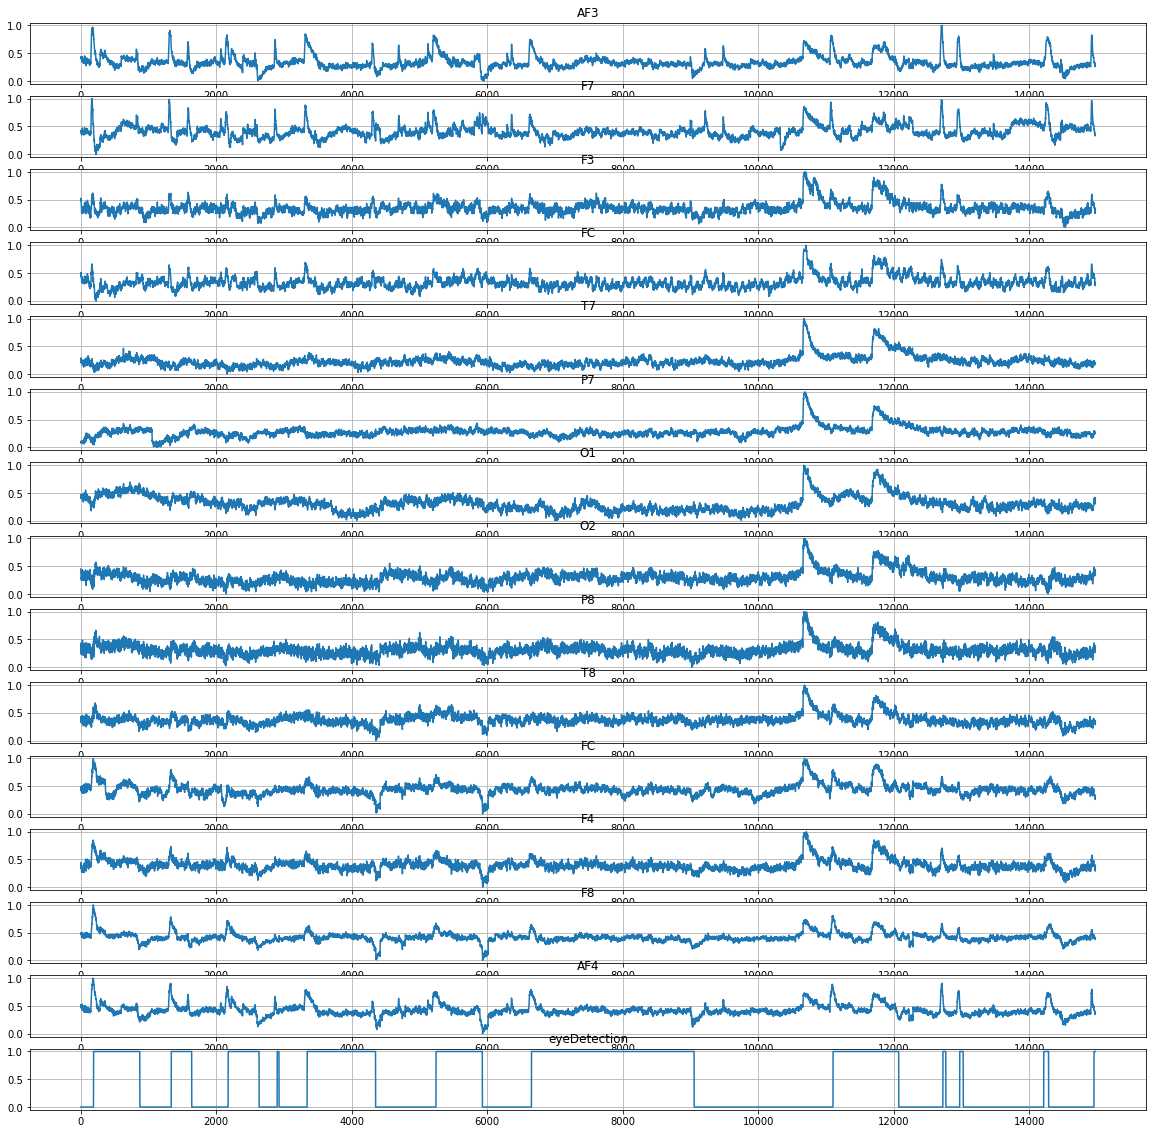

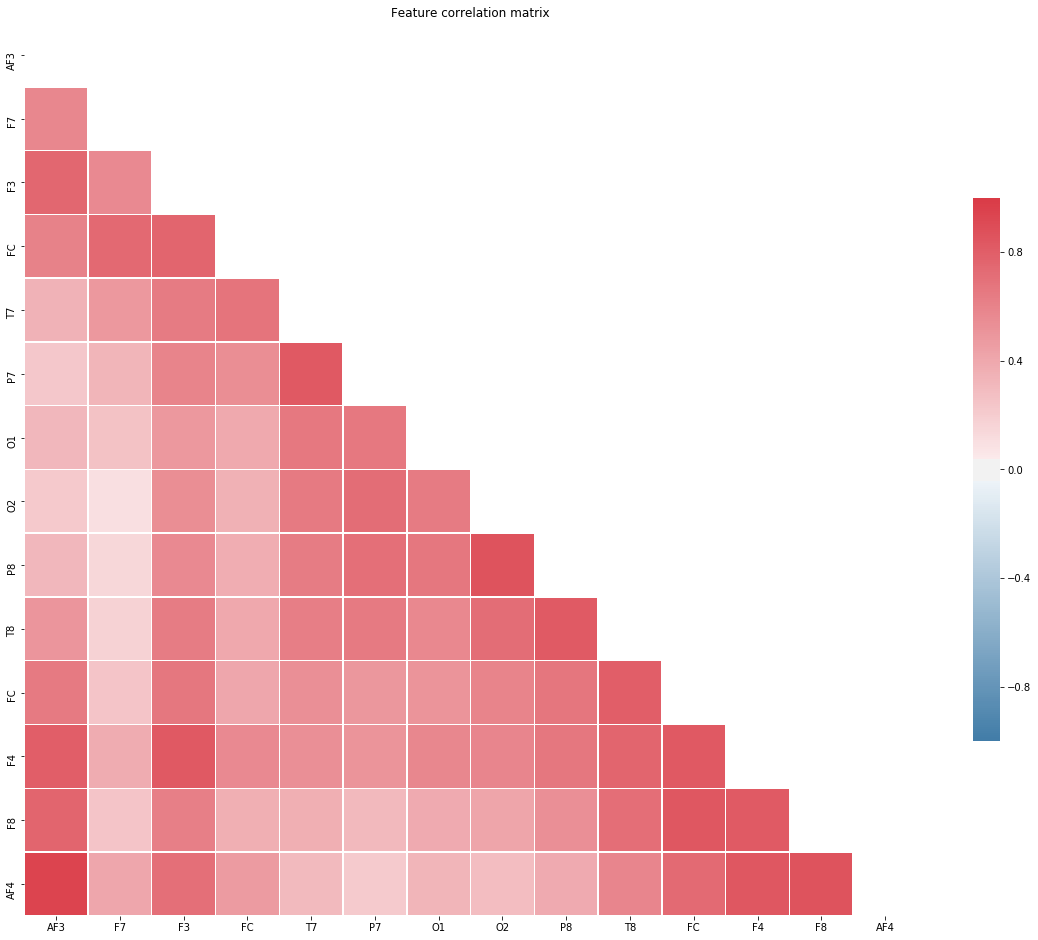

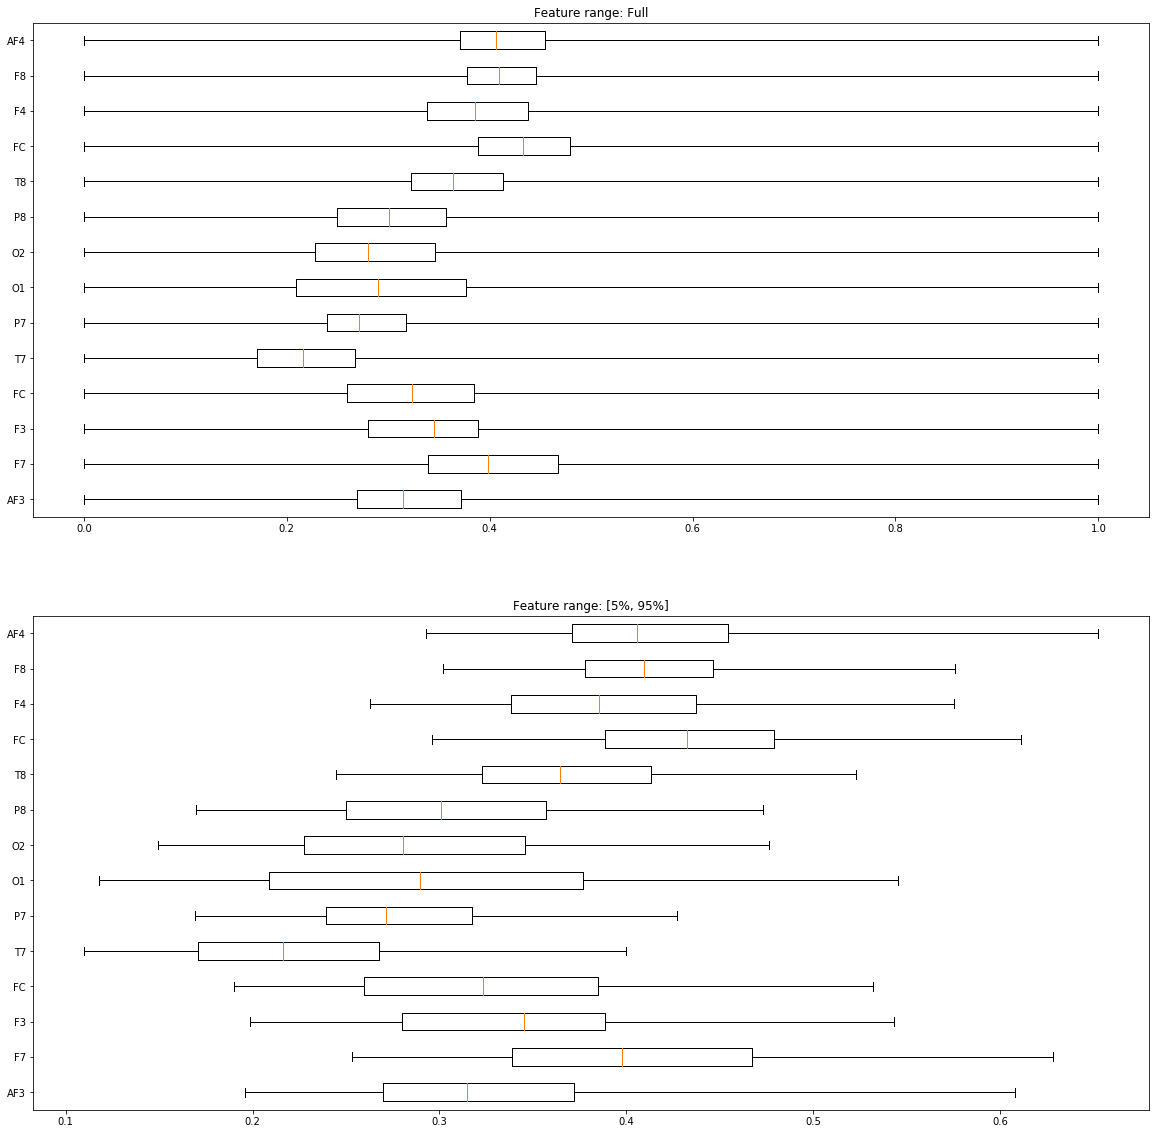

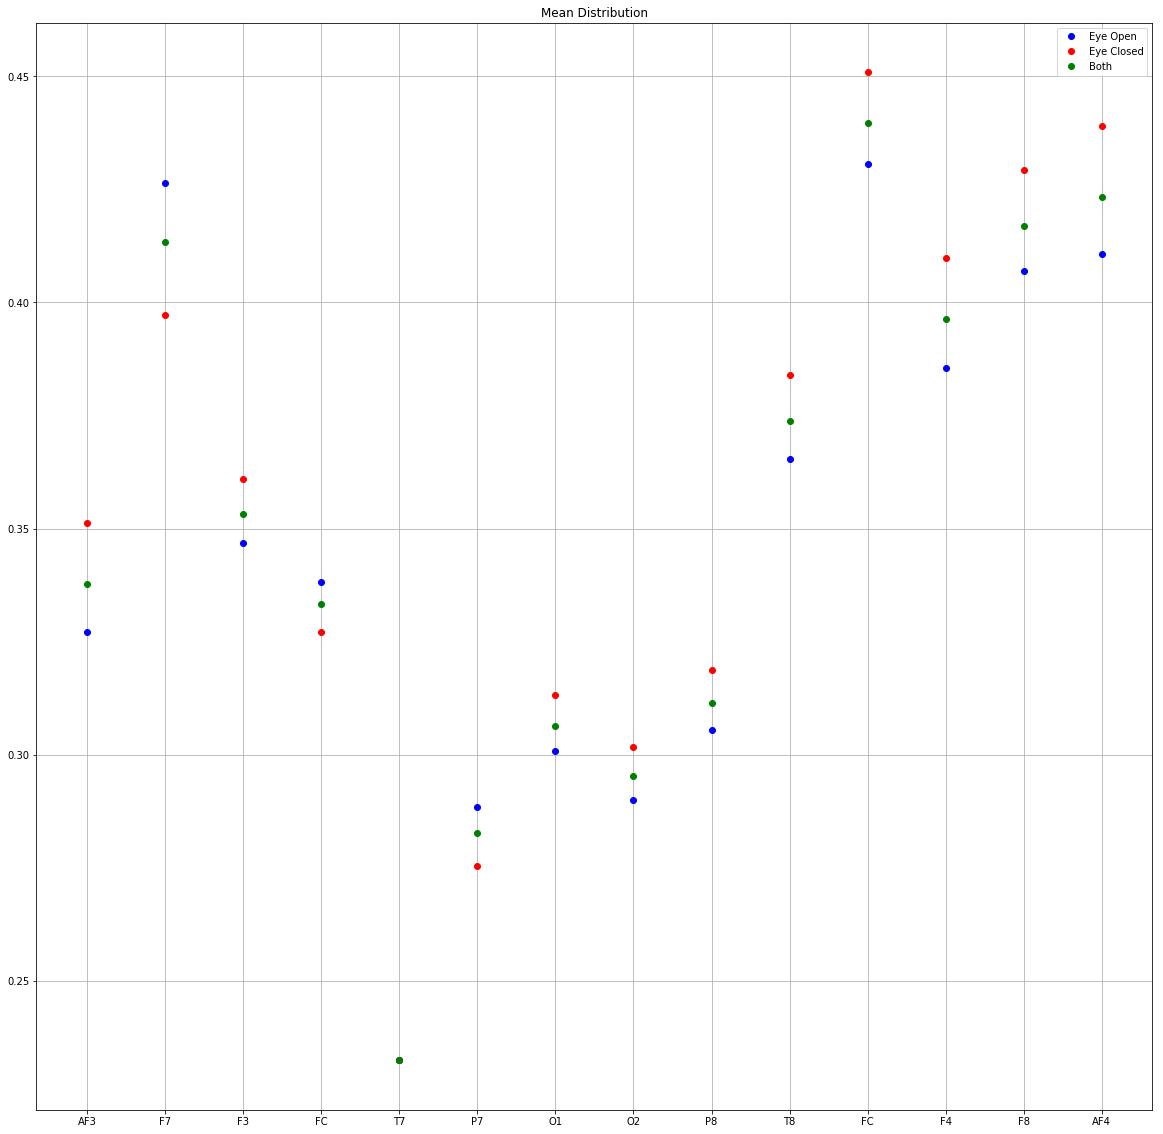

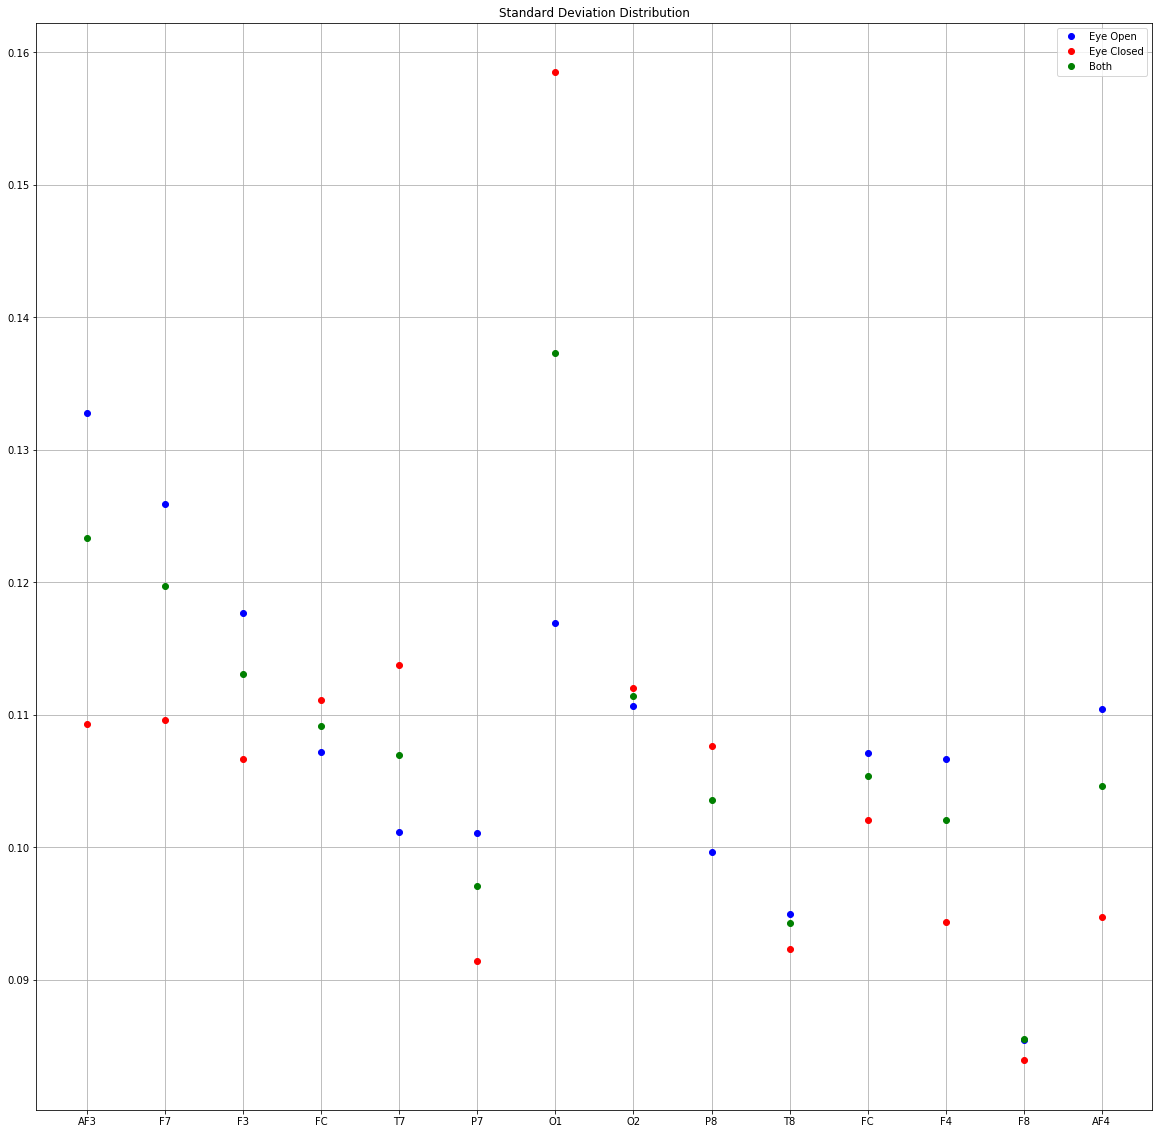

In [81]:
testID = 1

print "TestID: ", testID
predictor = LSTMPredictor(testID
                          , trainFilename='EEGEyeState_Training.arff.csv'
                          , testFilename='EEGEyeState_Testing.arff.csv')

predictor.PlotFeatures(filePrefix='01_01_RawData')
predictor.FeatureCorrelationMatrix(filePrefix='01_02_CorrelationMatrix_RawData')
predictor.PlotBoxPlots(filePrefix='01_03_BoxPlot_RawData')
predictor.PlotMeanDistribution('01_04_MeanDistribution_RawData')
predictor.PlotStdDevDistribution('01_05_StdDevDistribution_RawData')

res = predictor.RemoveOutliers(upperLimit=5000)
predictor.PlotFeatures(filePrefix='02_01_RemovedOutliers')
predictor.FeatureCorrelationMatrix(filePrefix='02_02_CorrelationMatrix_OutliersRemoved')
predictor.PlotBoxPlots(filePrefix='02_03_BoxPlot_OutliersRemove')
predictor.PlotMeanDistribution('02_04_MeanDistribution_OutliersRemove')
predictor.PlotStdDevDistribution('02_05_StdDevDistribution_OutliersRemove')

predictor.NormalizeData()
predictor.PlotFeatures(filePrefix='03_01_NormalizedData')
predictor.FeatureCorrelationMatrix(filePrefix='03_02_CorrelationMatrix_NormalizedData')
predictor.PlotBoxPlots(filePrefix='03_03_BoxPlot_NormalizedData')
predictor.PlotMeanDistribution('03_04_MeanDistribution_NormalizedData')
predictor.PlotStdDevDistribution('03_05_StdDevDistribution_NormalizedData')

### Test_02
- Outliers not removed
- Data not normalized
- lagValue = 1
- epoch = 50
- batch = 50
- lstmStack = 1
- layerOutDim = 50
- dropOut = 0.0

TestID:  2
Train on 8000 samples, validate on 2000 samples
Epoch 1/50
 - 1s - loss: 0.5953 - val_loss: 0.5140
Epoch 2/50
 - 0s - loss: 0.5312 - val_loss: 0.5002
Epoch 3/50
 - 0s - loss: 0.4979 - val_loss: 0.4864
Epoch 4/50
 - 0s - loss: 0.4647 - val_loss: 0.4885
Epoch 5/50
 - 0s - loss: 0.4605 - val_loss: 0.4877
Epoch 6/50
 - 0s - loss: 0.4605 - val_loss: 0.4870
Epoch 7/50
 - 0s - loss: 0.4605 - val_loss: 0.4862
Epoch 8/50
 - 0s - loss: 0.4586 - val_loss: 0.4992
Epoch 9/50
 - 0s - loss: 0.4573 - val_loss: 0.5047
Epoch 10/50
 - 0s - loss: 0.4573 - val_loss: 0.5040
Epoch 11/50
 - 0s - loss: 0.4579 - val_loss: 0.5034
Epoch 12/50
 - 0s - loss: 0.4579 - val_loss: 0.5027
Epoch 13/50
 - 0s - loss: 0.4570 - val_loss: 0.4948
Epoch 14/50
 - 0s - loss: 0.4589 - val_loss: 0.4964
Epoch 15/50
 - 0s - loss: 0.4595 - val_loss: 0.4957
Epoch 16/50
 - 0s - loss: 0.4595 - val_loss: 0.4950
Epoch 17/50
 - 0s - loss: 0.4595 - val_loss: 0.4942
Epoch 18/50
 - 0s - loss: 0.4595 - val_loss: 0.4935
Epoch 19/50
 -

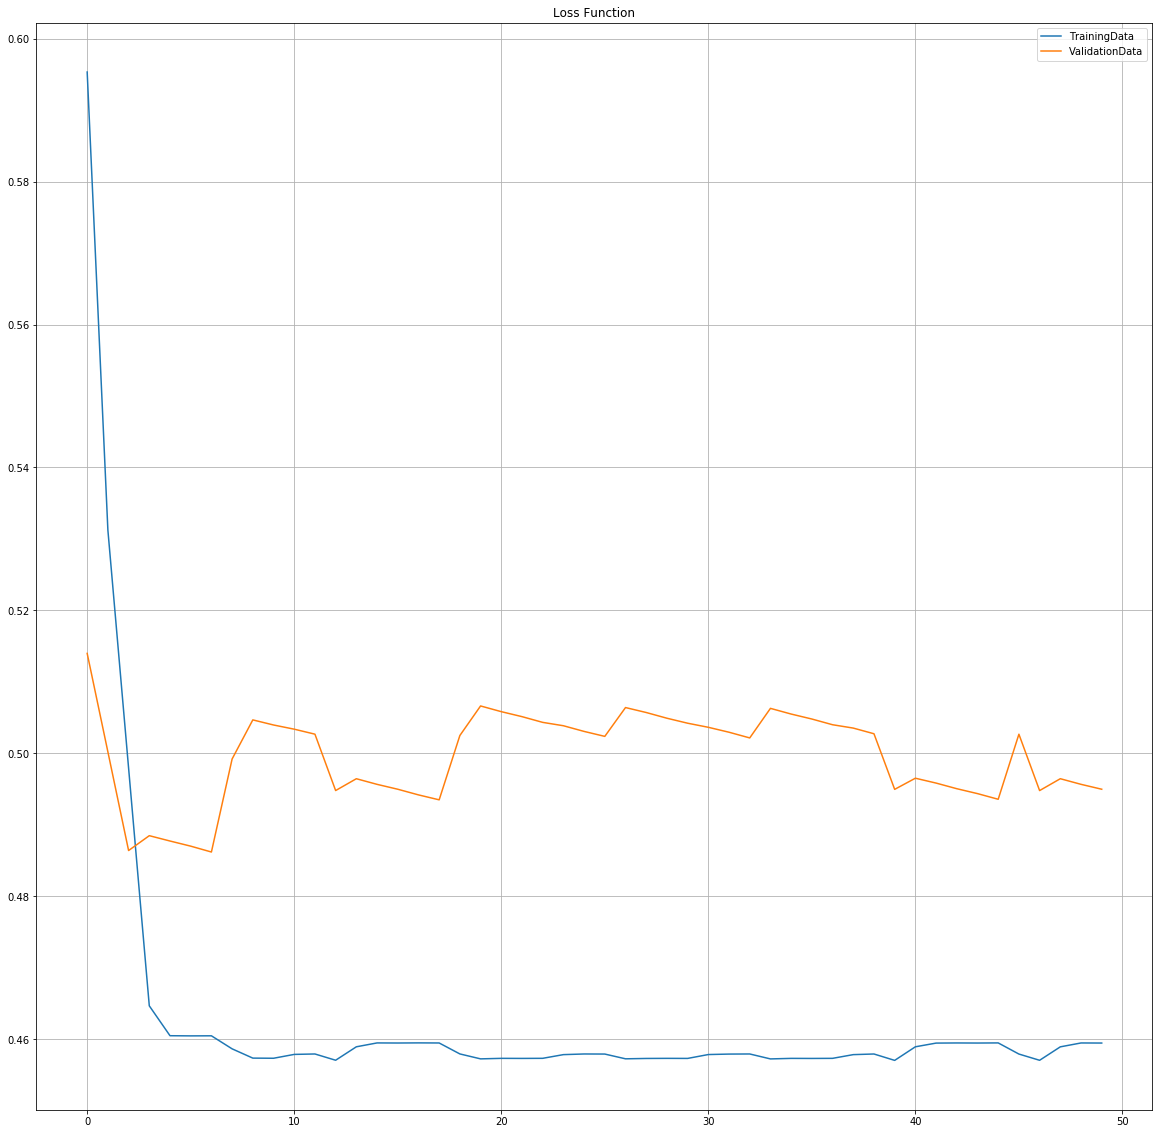

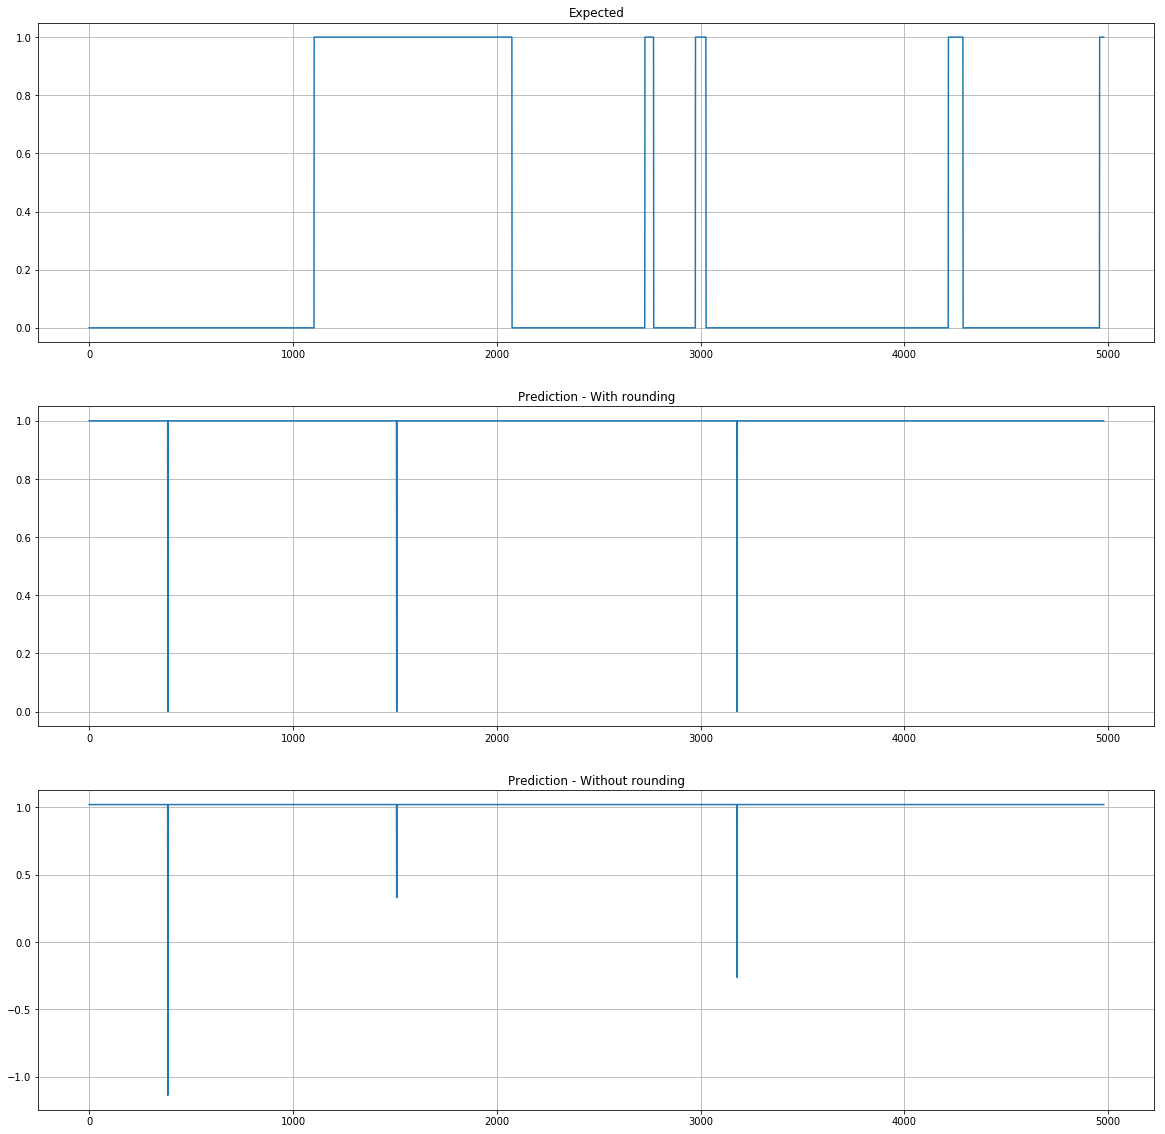

In [82]:
testID = 2
print "TestID: ", testID

###################################
lagValue = 1
epoch = 50
batch = 50
lstmStack = 1
layerOutDim = 50
dropOut = 0.0
resultsFilename = 'TestResults.txt'
###################################

predictor = LSTMPredictor(testID
                          , trainFilename='EEGEyeState_Training.arff.csv'
                          , testFilename='EEGEyeState_Testing.arff.csv')

predictor.CompileModel(lagCount=lagValue
               , neuronCount=layerOutDim
               , dropOut=dropOut
               , useLaggedOutput=True
               , modelArchitectureFilename='01_modelArchitecture')

validationResults = predictor.FitModel(epochCount=epoch
           , batchSize=batch
           , resultsFile=resultsFilename
           , lossFuncFilePrefix='01_lossFile'
           , predictionFilePrefix='01_predictionFile'
           , verbosity=2)

updateResultsToFile(testID, validationResults)

### Test_03
- Outliers not removed
- Data not normalized
- lagValue = 1
- epoch = 1000
- batch = 50
- lstmStack = 1
- layerOutDim = 50
- dropOut = 0.0

TestID:  3
Train on 8000 samples, validate on 2000 samples
Epoch 1/1000
 - 1s - loss: 0.5543 - val_loss: 0.5102
Epoch 2/1000
 - 0s - loss: 0.5208 - val_loss: 0.4940
Epoch 3/1000
 - 0s - loss: 0.4826 - val_loss: 0.4783
Epoch 4/1000
 - 0s - loss: 0.4610 - val_loss: 0.5058
Epoch 5/1000
 - 0s - loss: 0.4616 - val_loss: 0.5048
Epoch 6/1000
 - 0s - loss: 0.4616 - val_loss: 0.5039
Epoch 7/1000
 - 0s - loss: 0.4615 - val_loss: 0.5030
Epoch 8/1000
 - 0s - loss: 0.4615 - val_loss: 0.5021
Epoch 9/1000
 - 0s - loss: 0.4600 - val_loss: 0.5082
Epoch 10/1000
 - 0s - loss: 0.4606 - val_loss: 0.5076
Epoch 11/1000
 - 0s - loss: 0.4606 - val_loss: 0.5068
Epoch 12/1000
 - 0s - loss: 0.4606 - val_loss: 0.5059
Epoch 13/1000
 - 0s - loss: 0.4599 - val_loss: 0.5105
Epoch 14/1000
 - 0s - loss: 0.4599 - val_loss: 0.5097
Epoch 15/1000
 - 0s - loss: 0.4599 - val_loss: 0.5088
Epoch 16/1000
 - 0s - loss: 0.4599 - val_loss: 0.5080
Epoch 17/1000
 - 0s - loss: 0.4605 - val_loss: 0.5074
Epoch 18/1000
 - 0s - loss: 0.46

Epoch 151/1000
 - 0s - loss: 0.4599 - val_loss: 0.5087
Epoch 152/1000
 - 0s - loss: 0.4599 - val_loss: 0.5079
Epoch 153/1000
 - 0s - loss: 0.4605 - val_loss: 0.5073
Epoch 154/1000
 - 0s - loss: 0.4606 - val_loss: 0.5065
Epoch 155/1000
 - 0s - loss: 0.4606 - val_loss: 0.5057
Epoch 156/1000
 - 0s - loss: 0.4598 - val_loss: 0.5103
Epoch 157/1000
 - 0s - loss: 0.4599 - val_loss: 0.5094
Epoch 158/1000
 - 0s - loss: 0.4599 - val_loss: 0.5086
Epoch 159/1000
 - 0s - loss: 0.4599 - val_loss: 0.5077
Epoch 160/1000
 - 0s - loss: 0.4605 - val_loss: 0.5072
Epoch 161/1000
 - 0s - loss: 0.4606 - val_loss: 0.5063
Epoch 162/1000
 - 0s - loss: 0.4596 - val_loss: 0.4975
Epoch 163/1000
 - 0s - loss: 0.4617 - val_loss: 0.4993
Epoch 164/1000
 - 0s - loss: 0.4623 - val_loss: 0.4985
Epoch 165/1000
 - 0s - loss: 0.4623 - val_loss: 0.4977
Epoch 166/1000
 - 0s - loss: 0.4623 - val_loss: 0.4969
Epoch 167/1000
 - 0s - loss: 0.4623 - val_loss: 0.4960
Epoch 168/1000
 - 0s - loss: 0.4606 - val_loss: 0.5062
Epoch 169/

Epoch 300/1000
 - 0s - loss: 0.4623 - val_loss: 0.4985
Epoch 301/1000
 - 0s - loss: 0.4623 - val_loss: 0.4977
Epoch 302/1000
 - 0s - loss: 0.4623 - val_loss: 0.4969
Epoch 303/1000
 - 0s - loss: 0.4623 - val_loss: 0.4960
Epoch 304/1000
 - 0s - loss: 0.4606 - val_loss: 0.5062
Epoch 305/1000
 - 0s - loss: 0.4596 - val_loss: 0.4974
Epoch 306/1000
 - 0s - loss: 0.4617 - val_loss: 0.4992
Epoch 307/1000
 - 0s - loss: 0.4623 - val_loss: 0.4984
Epoch 308/1000
 - 0s - loss: 0.4623 - val_loss: 0.4976
Epoch 309/1000
 - 0s - loss: 0.4623 - val_loss: 0.4967
Epoch 310/1000
 - 0s - loss: 0.4623 - val_loss: 0.4959
Epoch 311/1000
 - 0s - loss: 0.4606 - val_loss: 0.5060
Epoch 312/1000
 - 0s - loss: 0.4598 - val_loss: 0.5106
Epoch 313/1000
 - 0s - loss: 0.4599 - val_loss: 0.5098
Epoch 314/1000
 - 0s - loss: 0.4599 - val_loss: 0.5090
Epoch 315/1000
 - 0s - loss: 0.4599 - val_loss: 0.5081
Epoch 316/1000
 - 0s - loss: 0.4605 - val_loss: 0.5075
Epoch 317/1000
 - 0s - loss: 0.4606 - val_loss: 0.5067
Epoch 318/

Epoch 449/1000
 - 0s - loss: 0.4599 - val_loss: 0.5098
Epoch 450/1000
 - 0s - loss: 0.4599 - val_loss: 0.5090
Epoch 451/1000
 - 0s - loss: 0.4599 - val_loss: 0.5081
Epoch 452/1000
 - 0s - loss: 0.4605 - val_loss: 0.5075
Epoch 453/1000
 - 0s - loss: 0.4606 - val_loss: 0.5067
Epoch 454/1000
 - 0s - loss: 0.4606 - val_loss: 0.5059
Epoch 455/1000
 - 0s - loss: 0.4598 - val_loss: 0.5104
Epoch 456/1000
 - 0s - loss: 0.4599 - val_loss: 0.5096
Epoch 457/1000
 - 0s - loss: 0.4599 - val_loss: 0.5088
Epoch 458/1000
 - 0s - loss: 0.4599 - val_loss: 0.5079
Epoch 459/1000
 - 0s - loss: 0.4605 - val_loss: 0.5073
Epoch 460/1000
 - 0s - loss: 0.4606 - val_loss: 0.5065
Epoch 461/1000
 - 0s - loss: 0.4606 - val_loss: 0.5057
Epoch 462/1000
 - 0s - loss: 0.4598 - val_loss: 0.5103
Epoch 463/1000
 - 0s - loss: 0.4599 - val_loss: 0.5094
Epoch 464/1000
 - 0s - loss: 0.4599 - val_loss: 0.5086
Epoch 465/1000
 - 0s - loss: 0.4599 - val_loss: 0.5077
Epoch 466/1000
 - 0s - loss: 0.4605 - val_loss: 0.5072
Epoch 467/

Epoch 598/1000
 - 0s - loss: 0.4598 - val_loss: 0.5103
Epoch 599/1000
 - 0s - loss: 0.4599 - val_loss: 0.5094
Epoch 600/1000
 - 0s - loss: 0.4599 - val_loss: 0.5086
Epoch 601/1000
 - 0s - loss: 0.4599 - val_loss: 0.5077
Epoch 602/1000
 - 0s - loss: 0.4605 - val_loss: 0.5072
Epoch 603/1000
 - 0s - loss: 0.4606 - val_loss: 0.5063
Epoch 604/1000
 - 0s - loss: 0.4606 - val_loss: 0.5055
Epoch 605/1000
 - 0s - loss: 0.4598 - val_loss: 0.5101
Epoch 606/1000
 - 0s - loss: 0.4599 - val_loss: 0.5093
Epoch 607/1000
 - 0s - loss: 0.4599 - val_loss: 0.5084
Epoch 608/1000
 - 0s - loss: 0.4599 - val_loss: 0.5076
Epoch 609/1000
 - 0s - loss: 0.4605 - val_loss: 0.5070
Epoch 610/1000
 - 0s - loss: 0.4606 - val_loss: 0.5062
Epoch 611/1000
 - 0s - loss: 0.4596 - val_loss: 0.4973
Epoch 612/1000
 - 0s - loss: 0.4617 - val_loss: 0.4992
Epoch 613/1000
 - 0s - loss: 0.4623 - val_loss: 0.4983
Epoch 614/1000
 - 0s - loss: 0.4623 - val_loss: 0.4975
Epoch 615/1000
 - 0s - loss: 0.4623 - val_loss: 0.4967
Epoch 616/

Epoch 747/1000
 - 0s - loss: 0.4596 - val_loss: 0.4973
Epoch 748/1000
 - 0s - loss: 0.4617 - val_loss: 0.4992
Epoch 749/1000
 - 0s - loss: 0.4623 - val_loss: 0.4983
Epoch 750/1000
 - 0s - loss: 0.4623 - val_loss: 0.4975
Epoch 751/1000
 - 0s - loss: 0.4623 - val_loss: 0.4967
Epoch 752/1000
 - 0s - loss: 0.4623 - val_loss: 0.4959
Epoch 753/1000
 - 0s - loss: 0.4606 - val_loss: 0.5060
Epoch 754/1000
 - 0s - loss: 0.4598 - val_loss: 0.5106
Epoch 755/1000
 - 0s - loss: 0.4599 - val_loss: 0.5098
Epoch 756/1000
 - 0s - loss: 0.4599 - val_loss: 0.5089
Epoch 757/1000
 - 0s - loss: 0.4599 - val_loss: 0.5081
Epoch 758/1000
 - 0s - loss: 0.4605 - val_loss: 0.5075
Epoch 759/1000
 - 0s - loss: 0.4606 - val_loss: 0.5067
Epoch 760/1000
 - 0s - loss: 0.4606 - val_loss: 0.5058
Epoch 761/1000
 - 0s - loss: 0.4598 - val_loss: 0.5104
Epoch 762/1000
 - 0s - loss: 0.4599 - val_loss: 0.5096
Epoch 763/1000
 - 0s - loss: 0.4599 - val_loss: 0.5087
Epoch 764/1000
 - 0s - loss: 0.4599 - val_loss: 0.5079
Epoch 765/

Epoch 896/1000
 - 0s - loss: 0.4606 - val_loss: 0.5058
Epoch 897/1000
 - 0s - loss: 0.4598 - val_loss: 0.5104
Epoch 898/1000
 - 0s - loss: 0.4599 - val_loss: 0.5096
Epoch 899/1000
 - 0s - loss: 0.4599 - val_loss: 0.5087
Epoch 900/1000
 - 0s - loss: 0.4599 - val_loss: 0.5079
Epoch 901/1000
 - 0s - loss: 0.4605 - val_loss: 0.5073
Epoch 902/1000
 - 0s - loss: 0.4606 - val_loss: 0.5065
Epoch 903/1000
 - 0s - loss: 0.4606 - val_loss: 0.5056
Epoch 904/1000
 - 0s - loss: 0.4598 - val_loss: 0.5103
Epoch 905/1000
 - 0s - loss: 0.4599 - val_loss: 0.5094
Epoch 906/1000
 - 0s - loss: 0.4599 - val_loss: 0.5086
Epoch 907/1000
 - 0s - loss: 0.4599 - val_loss: 0.5077
Epoch 908/1000
 - 0s - loss: 0.4605 - val_loss: 0.5072
Epoch 909/1000
 - 0s - loss: 0.4606 - val_loss: 0.5063
Epoch 910/1000
 - 0s - loss: 0.4596 - val_loss: 0.4975
Epoch 911/1000
 - 0s - loss: 0.4617 - val_loss: 0.4993
Epoch 912/1000
 - 0s - loss: 0.4623 - val_loss: 0.4985
Epoch 913/1000
 - 0s - loss: 0.4623 - val_loss: 0.4977
Epoch 914/

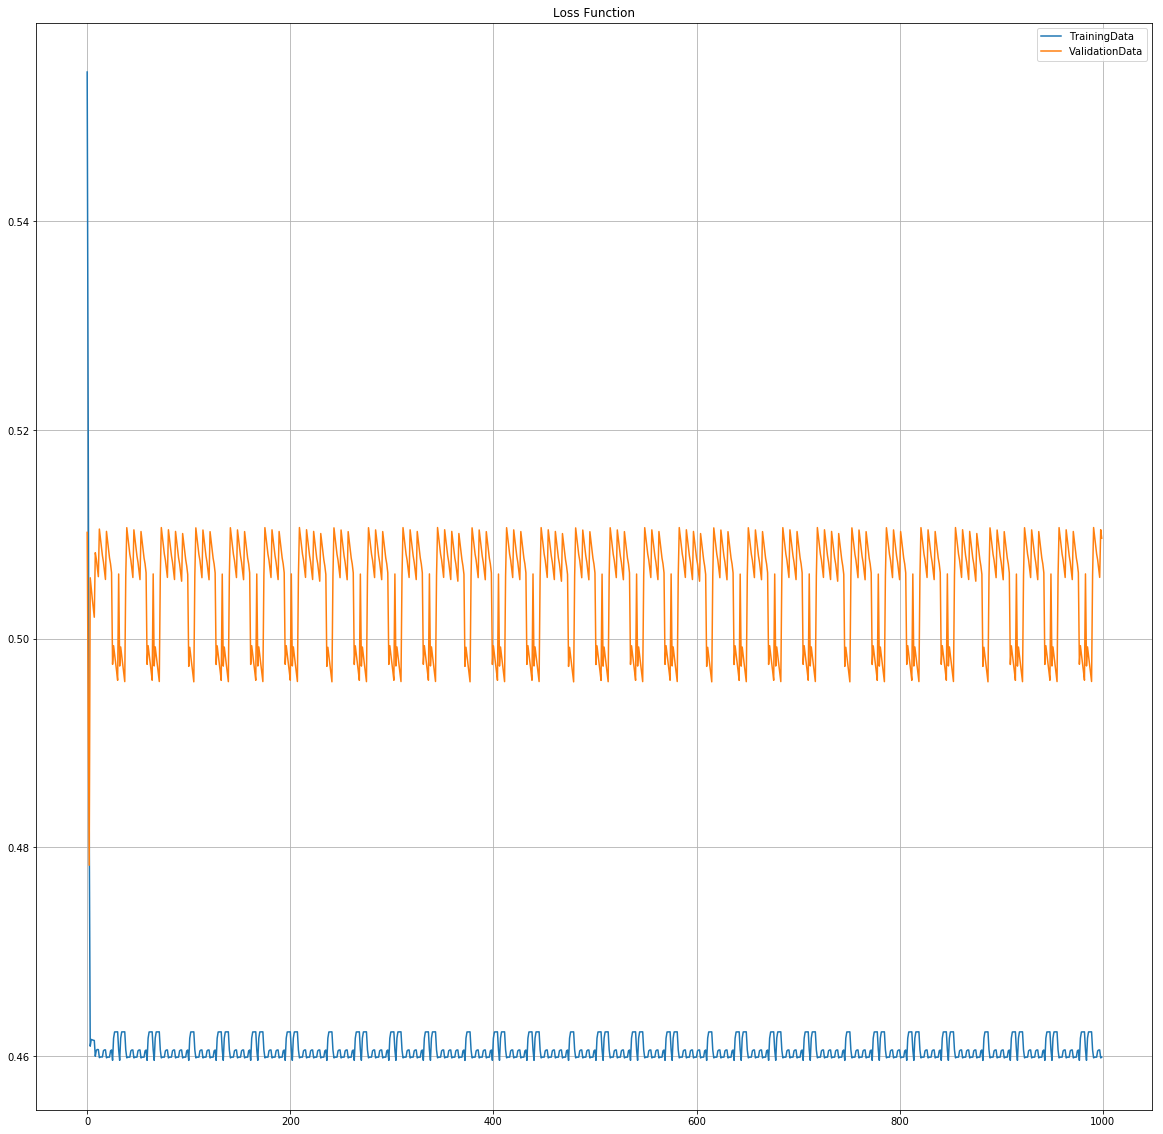

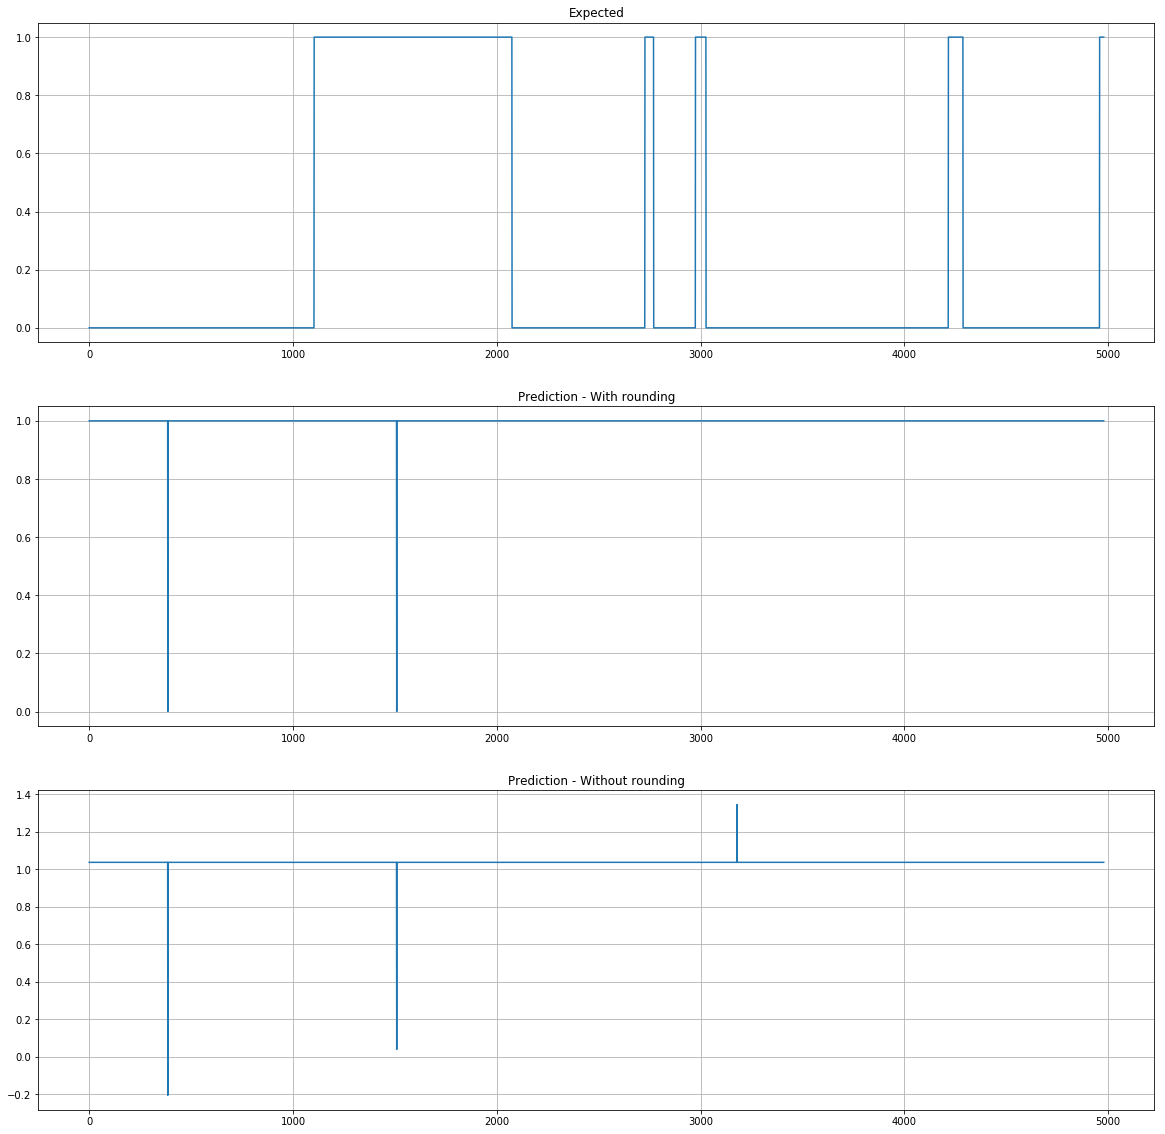

In [83]:
testID = 3
print "TestID: ", testID

###################################
lagValue = 1
epoch = 1000
batch = 50
lstmStack = 1
layerOutDim = 50
dropOut = 0.0
resultsFilename = 'TestResults.txt'
###################################

predictor = LSTMPredictor(testID
                          , trainFilename='EEGEyeState_Training.arff.csv'
                          , testFilename='EEGEyeState_Testing.arff.csv')

predictor.CompileModel(lagCount=lagValue
               , neuronCount=layerOutDim
               , dropOut=dropOut
               , useLaggedOutput=True
               , modelArchitectureFilename='01_modelArchitecture')

validationResults = predictor.FitModel(epochCount=epoch
           , batchSize=batch
           , resultsFile=resultsFilename
           , lossFuncFilePrefix='01_lossFile'
           , predictionFilePrefix='01_predictionFile'
           , verbosity=2)

updateResultsToFile(testID, validationResults)

### Test_04
- Outliers not removed
- Data not normalized
- lagValue = 1
- epoch = 1000
- batch = 50
- lstmStack = 5
- layerOutDim = 50
- dropOut = 0.0

TestID:  4
Train on 8000 samples, validate on 2000 samples
Epoch 1/1000
 - 1s - loss: 0.5697 - val_loss: 0.5184
Epoch 2/1000
 - 0s - loss: 0.5426 - val_loss: 0.5088
Epoch 3/1000
 - 0s - loss: 0.5194 - val_loss: 0.4992
Epoch 4/1000
 - 0s - loss: 0.4962 - val_loss: 0.4896
Epoch 5/1000
 - 0s - loss: 0.4730 - val_loss: 0.4800
Epoch 6/1000
 - 0s - loss: 0.4517 - val_loss: 0.4916
Epoch 7/1000
 - 0s - loss: 0.4513 - val_loss: 0.4911
Epoch 8/1000
 - 0s - loss: 0.4504 - val_loss: 0.4927
Epoch 9/1000
 - 0s - loss: 0.4508 - val_loss: 0.4934
Epoch 10/1000
 - 0s - loss: 0.4504 - val_loss: 0.4951
Epoch 11/1000
 - 0s - loss: 0.4516 - val_loss: 0.4915
Epoch 12/1000
 - 0s - loss: 0.4517 - val_loss: 0.4910
Epoch 13/1000
 - 0s - loss: 0.4508 - val_loss: 0.4948
Epoch 14/1000
 - 0s - loss: 0.4511 - val_loss: 0.4944
Epoch 15/1000
 - 0s - loss: 0.4512 - val_loss: 0.4939
Epoch 16/1000
 - 0s - loss: 0.4512 - val_loss: 0.4934
Epoch 17/1000
 - 0s - loss: 0.4507 - val_loss: 0.4963
Epoch 18/1000
 - 0s - loss: 0.45

Epoch 151/1000
 - 0s - loss: 0.4512 - val_loss: 0.4939
Epoch 152/1000
 - 0s - loss: 0.4512 - val_loss: 0.4934
Epoch 153/1000
 - 0s - loss: 0.4507 - val_loss: 0.4962
Epoch 154/1000
 - 0s - loss: 0.4508 - val_loss: 0.4957
Epoch 155/1000
 - 0s - loss: 0.4508 - val_loss: 0.4952
Epoch 156/1000
 - 0s - loss: 0.4508 - val_loss: 0.4946
Epoch 157/1000
 - 0s - loss: 0.4511 - val_loss: 0.4943
Epoch 158/1000
 - 0s - loss: 0.4512 - val_loss: 0.4938
Epoch 159/1000
 - 0s - loss: 0.4506 - val_loss: 0.4884
Epoch 160/1000
 - 0s - loss: 0.4519 - val_loss: 0.4895
Epoch 161/1000
 - 0s - loss: 0.4523 - val_loss: 0.4890
Epoch 162/1000
 - 0s - loss: 0.4523 - val_loss: 0.4884
Epoch 163/1000
 - 0s - loss: 0.4523 - val_loss: 0.4880
Epoch 164/1000
 - 0s - loss: 0.4523 - val_loss: 0.4874
Epoch 165/1000
 - 0s - loss: 0.4512 - val_loss: 0.4937
Epoch 166/1000
 - 0s - loss: 0.4506 - val_loss: 0.4883
Epoch 167/1000
 - 0s - loss: 0.4519 - val_loss: 0.4894
Epoch 168/1000
 - 0s - loss: 0.4523 - val_loss: 0.4889
Epoch 169/

Epoch 300/1000
 - 0s - loss: 0.4523 - val_loss: 0.4874
Epoch 301/1000
 - 0s - loss: 0.4512 - val_loss: 0.4937
Epoch 302/1000
 - 0s - loss: 0.4506 - val_loss: 0.4883
Epoch 303/1000
 - 0s - loss: 0.4519 - val_loss: 0.4894
Epoch 304/1000
 - 0s - loss: 0.4523 - val_loss: 0.4889
Epoch 305/1000
 - 0s - loss: 0.4523 - val_loss: 0.4884
Epoch 306/1000
 - 0s - loss: 0.4523 - val_loss: 0.4878
Epoch 307/1000
 - 0s - loss: 0.4523 - val_loss: 0.4874
Epoch 308/1000
 - 0s - loss: 0.4512 - val_loss: 0.4936
Epoch 309/1000
 - 0s - loss: 0.4507 - val_loss: 0.4965
Epoch 310/1000
 - 0s - loss: 0.4508 - val_loss: 0.4959
Epoch 311/1000
 - 0s - loss: 0.4508 - val_loss: 0.4954
Epoch 312/1000
 - 0s - loss: 0.4508 - val_loss: 0.4949
Epoch 313/1000
 - 0s - loss: 0.4511 - val_loss: 0.4945
Epoch 314/1000
 - 0s - loss: 0.4512 - val_loss: 0.4940
Epoch 315/1000
 - 0s - loss: 0.4512 - val_loss: 0.4935
Epoch 316/1000
 - 0s - loss: 0.4507 - val_loss: 0.4963
Epoch 317/1000
 - 0s - loss: 0.4508 - val_loss: 0.4958
Epoch 318/

Epoch 449/1000
 - 0s - loss: 0.4511 - val_loss: 0.4945
Epoch 450/1000
 - 0s - loss: 0.4512 - val_loss: 0.4940
Epoch 451/1000
 - 0s - loss: 0.4512 - val_loss: 0.4935
Epoch 452/1000
 - 0s - loss: 0.4507 - val_loss: 0.4963
Epoch 453/1000
 - 0s - loss: 0.4508 - val_loss: 0.4958
Epoch 454/1000
 - 0s - loss: 0.4508 - val_loss: 0.4953
Epoch 455/1000
 - 0s - loss: 0.4508 - val_loss: 0.4948
Epoch 456/1000
 - 0s - loss: 0.4511 - val_loss: 0.4944
Epoch 457/1000
 - 0s - loss: 0.4512 - val_loss: 0.4939
Epoch 458/1000
 - 0s - loss: 0.4512 - val_loss: 0.4934
Epoch 459/1000
 - 0s - loss: 0.4507 - val_loss: 0.4962
Epoch 460/1000
 - 0s - loss: 0.4508 - val_loss: 0.4957
Epoch 461/1000
 - 0s - loss: 0.4508 - val_loss: 0.4952
Epoch 462/1000
 - 0s - loss: 0.4508 - val_loss: 0.4946
Epoch 463/1000
 - 0s - loss: 0.4511 - val_loss: 0.4943
Epoch 464/1000
 - 0s - loss: 0.4512 - val_loss: 0.4938
Epoch 465/1000
 - 0s - loss: 0.4506 - val_loss: 0.4884
Epoch 466/1000
 - 0s - loss: 0.4519 - val_loss: 0.4895
Epoch 467/

Epoch 598/1000
 - 0s - loss: 0.4508 - val_loss: 0.4946
Epoch 599/1000
 - 0s - loss: 0.4511 - val_loss: 0.4943
Epoch 600/1000
 - 0s - loss: 0.4512 - val_loss: 0.4938
Epoch 601/1000
 - 0s - loss: 0.4506 - val_loss: 0.4884
Epoch 602/1000
 - 0s - loss: 0.4519 - val_loss: 0.4895
Epoch 603/1000
 - 0s - loss: 0.4523 - val_loss: 0.4890
Epoch 604/1000
 - 0s - loss: 0.4523 - val_loss: 0.4884
Epoch 605/1000
 - 0s - loss: 0.4523 - val_loss: 0.4880
Epoch 606/1000
 - 0s - loss: 0.4523 - val_loss: 0.4874
Epoch 607/1000
 - 0s - loss: 0.4512 - val_loss: 0.4937
Epoch 608/1000
 - 0s - loss: 0.4506 - val_loss: 0.4883
Epoch 609/1000
 - 0s - loss: 0.4519 - val_loss: 0.4894
Epoch 610/1000
 - 0s - loss: 0.4523 - val_loss: 0.4889
Epoch 611/1000
 - 0s - loss: 0.4523 - val_loss: 0.4884
Epoch 612/1000
 - 0s - loss: 0.4523 - val_loss: 0.4878
Epoch 613/1000
 - 0s - loss: 0.4523 - val_loss: 0.4874
Epoch 614/1000
 - 0s - loss: 0.4512 - val_loss: 0.4936
Epoch 615/1000
 - 0s - loss: 0.4507 - val_loss: 0.4965
Epoch 616/

Epoch 747/1000
 - 0s - loss: 0.4512 - val_loss: 0.4934
Epoch 748/1000
 - 0s - loss: 0.4507 - val_loss: 0.4962
Epoch 749/1000
 - 0s - loss: 0.4508 - val_loss: 0.4957
Epoch 750/1000
 - 0s - loss: 0.4508 - val_loss: 0.4951
Epoch 751/1000
 - 0s - loss: 0.4508 - val_loss: 0.4946
Epoch 752/1000
 - 0s - loss: 0.4511 - val_loss: 0.4942
Epoch 753/1000
 - 0s - loss: 0.4512 - val_loss: 0.4938
Epoch 754/1000
 - 0s - loss: 0.4506 - val_loss: 0.4883
Epoch 755/1000
 - 0s - loss: 0.4519 - val_loss: 0.4895
Epoch 756/1000
 - 0s - loss: 0.4523 - val_loss: 0.4889
Epoch 757/1000
 - 0s - loss: 0.4523 - val_loss: 0.4884
Epoch 758/1000
 - 0s - loss: 0.4523 - val_loss: 0.4879
Epoch 759/1000
 - 0s - loss: 0.4523 - val_loss: 0.4874
Epoch 760/1000
 - 0s - loss: 0.4512 - val_loss: 0.4936
Epoch 761/1000
 - 0s - loss: 0.4506 - val_loss: 0.4882
Epoch 762/1000
 - 0s - loss: 0.4519 - val_loss: 0.4893
Epoch 763/1000
 - 0s - loss: 0.4523 - val_loss: 0.4889
Epoch 764/1000
 - 0s - loss: 0.4523 - val_loss: 0.4883
Epoch 765/

Epoch 896/1000
 - 0s - loss: 0.4512 - val_loss: 0.4936
Epoch 897/1000
 - 1s - loss: 0.4506 - val_loss: 0.4883
Epoch 898/1000
 - 1s - loss: 0.4519 - val_loss: 0.4893
Epoch 899/1000
 - 1s - loss: 0.4523 - val_loss: 0.4889
Epoch 900/1000
 - 1s - loss: 0.4523 - val_loss: 0.4883
Epoch 901/1000
 - 1s - loss: 0.4523 - val_loss: 0.4878
Epoch 902/1000
 - 1s - loss: 0.4523 - val_loss: 0.4873
Epoch 903/1000
 - 1s - loss: 0.4512 - val_loss: 0.4936
Epoch 904/1000
 - 0s - loss: 0.4507 - val_loss: 0.4964
Epoch 905/1000
 - 0s - loss: 0.4508 - val_loss: 0.4959
Epoch 906/1000
 - 0s - loss: 0.4508 - val_loss: 0.4954
Epoch 907/1000
 - 0s - loss: 0.4508 - val_loss: 0.4949
Epoch 908/1000
 - 0s - loss: 0.4511 - val_loss: 0.4945
Epoch 909/1000
 - 0s - loss: 0.4512 - val_loss: 0.4940
Epoch 910/1000
 - 0s - loss: 0.4512 - val_loss: 0.4934
Epoch 911/1000
 - 0s - loss: 0.4507 - val_loss: 0.4963
Epoch 912/1000
 - 0s - loss: 0.4508 - val_loss: 0.4958
Epoch 913/1000
 - 0s - loss: 0.4508 - val_loss: 0.4953
Epoch 914/

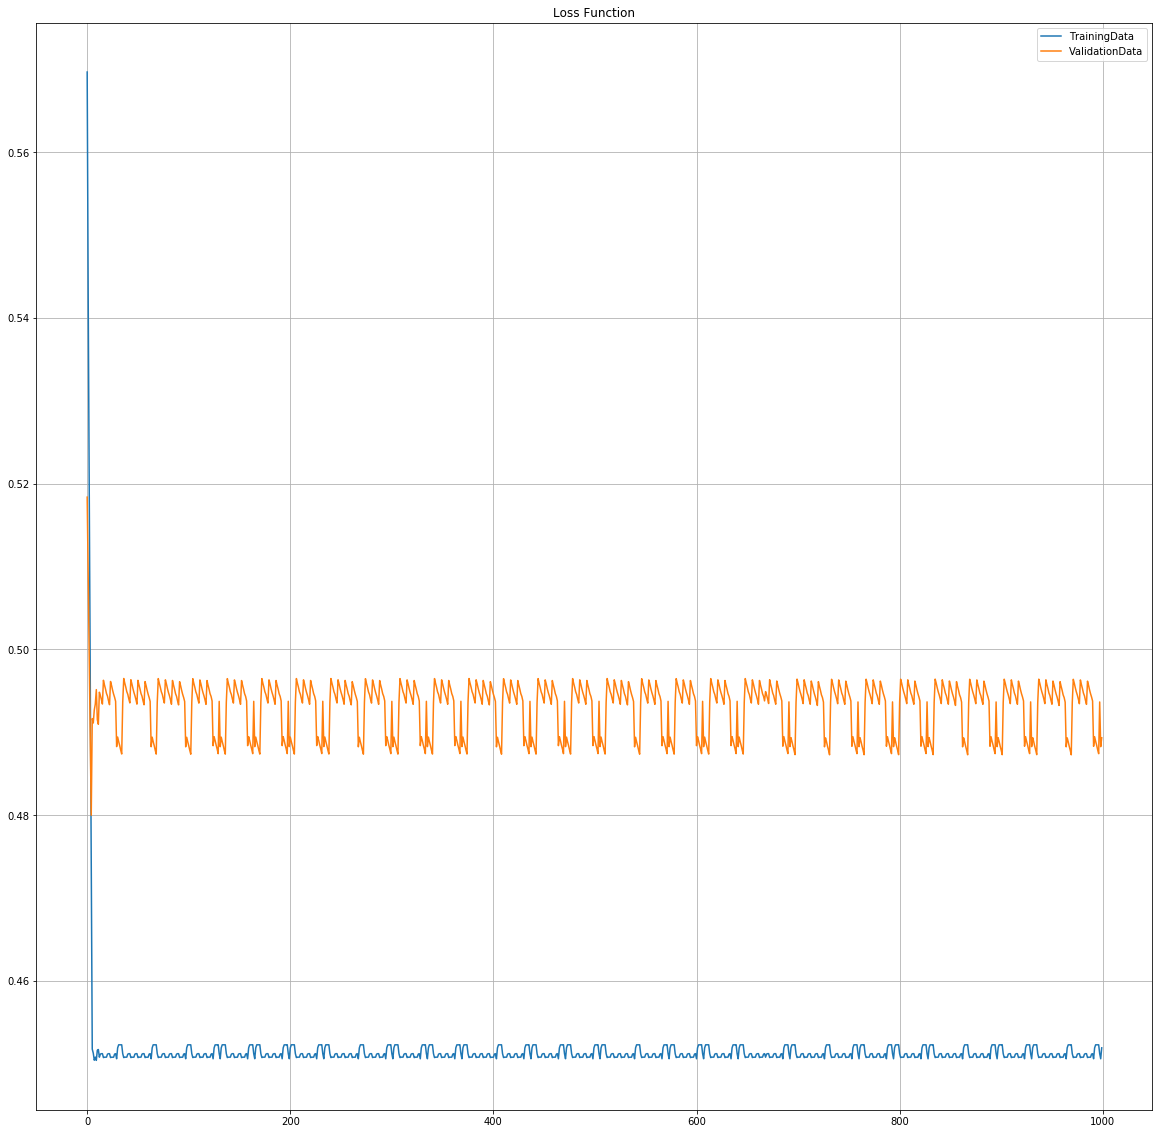

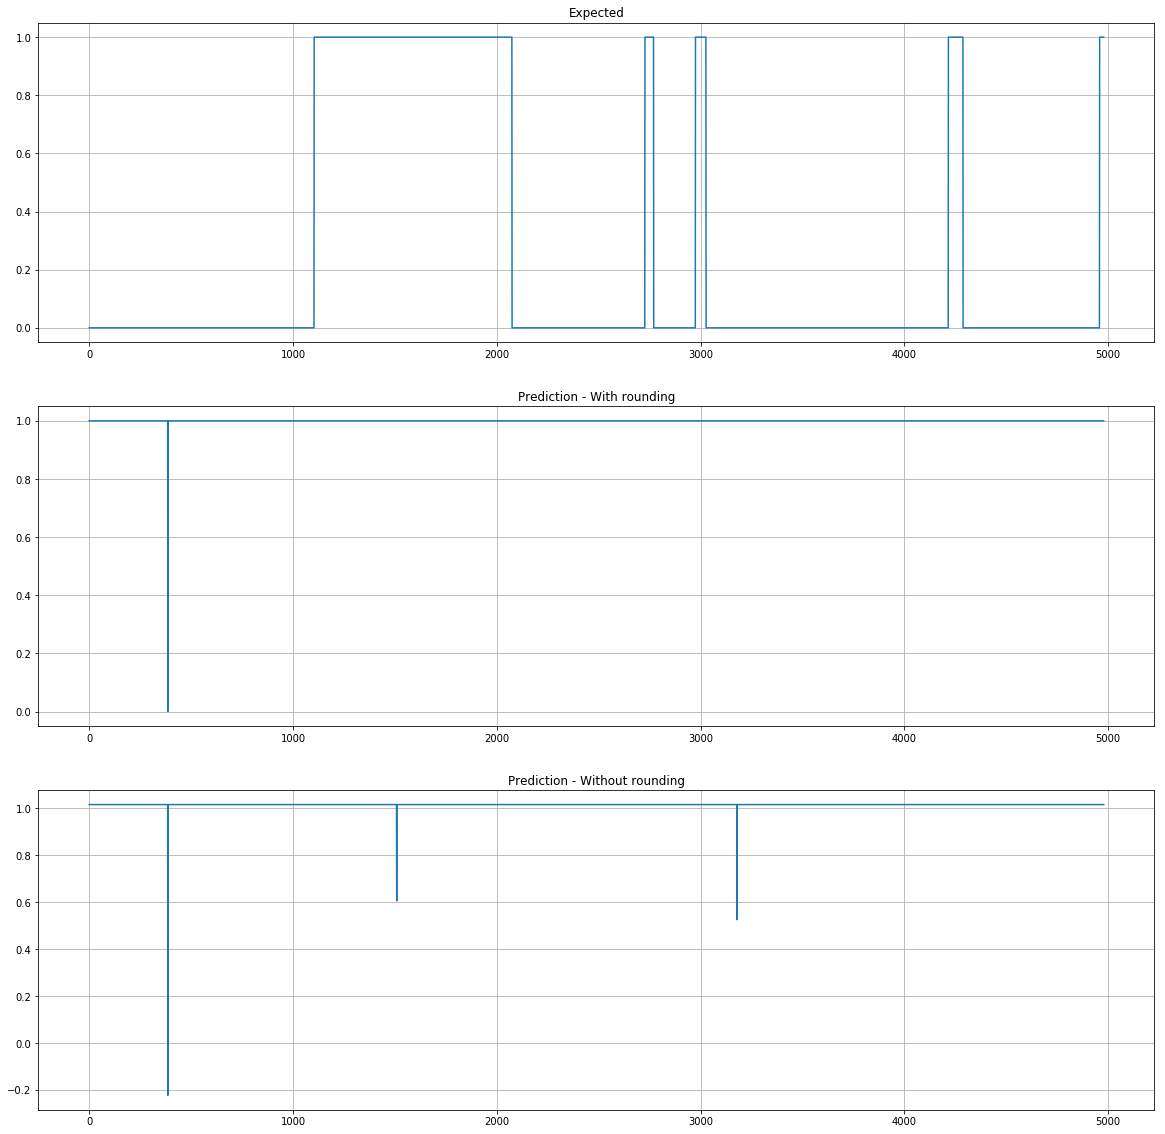

In [85]:
testID = 4
print "TestID: ", testID

###################################
lagValue = 1
epoch = 1000
batch = 50
lstmStack = 5
layerOutDim = 50
dropOut = 0.0
resultsFilename = 'TestResults.txt'
###################################

predictor = LSTMPredictor(testID
                          , trainFilename='EEGEyeState_Training.arff.csv'
                          , testFilename='EEGEyeState_Testing.arff.csv')

predictor.CompileModel(lagCount=lagValue
               , neuronCount=layerOutDim
               , dropOut=dropOut
               , useLaggedOutput=True
               , modelArchitectureFilename='01_modelArchitecture')

validationResults = predictor.FitModel(epochCount=epoch
           , batchSize=batch
           , resultsFile=resultsFilename
           , lossFuncFilePrefix='01_lossFile'
           , predictionFilePrefix='01_predictionFile'
           , verbosity=2)

updateResultsToFile(testID, validationResults)

### Test_05
- Outliers removed
- Data normalized
- lagValue = 1
- epoch = 50
- batch = 50
- lstmStack = 1
- layerOutDim = 50
- dropOut = 0.0

TestID:  5
Train on 8000 samples, validate on 2000 samples
Epoch 1/50
 - 1s - loss: 0.4227 - val_loss: 0.2093
Epoch 2/50
 - 0s - loss: 0.1175 - val_loss: 0.0461
Epoch 3/50
 - 0s - loss: 0.0342 - val_loss: 0.0262
Epoch 4/50
 - 0s - loss: 0.0329 - val_loss: 0.0260
Epoch 5/50
 - 0s - loss: 0.0284 - val_loss: 0.0525
Epoch 6/50
 - 0s - loss: 0.0237 - val_loss: 0.0311
Epoch 7/50
 - 0s - loss: 0.0235 - val_loss: 0.0158
Epoch 8/50
 - 0s - loss: 0.0179 - val_loss: 0.0121
Epoch 9/50
 - 0s - loss: 0.0163 - val_loss: 0.0094
Epoch 10/50
 - 0s - loss: 0.0140 - val_loss: 0.0096
Epoch 11/50
 - 0s - loss: 0.0137 - val_loss: 0.0391
Epoch 12/50
 - 0s - loss: 0.0273 - val_loss: 0.0110
Epoch 13/50
 - 0s - loss: 0.0123 - val_loss: 0.0087
Epoch 14/50
 - 0s - loss: 0.0114 - val_loss: 0.0182
Epoch 15/50
 - 0s - loss: 0.0138 - val_loss: 0.0125
Epoch 16/50
 - 0s - loss: 0.0152 - val_loss: 0.0422
Epoch 17/50
 - 0s - loss: 0.0143 - val_loss: 0.0258
Epoch 18/50
 - 0s - loss: 0.0150 - val_loss: 0.0081
Epoch 19/50
 -

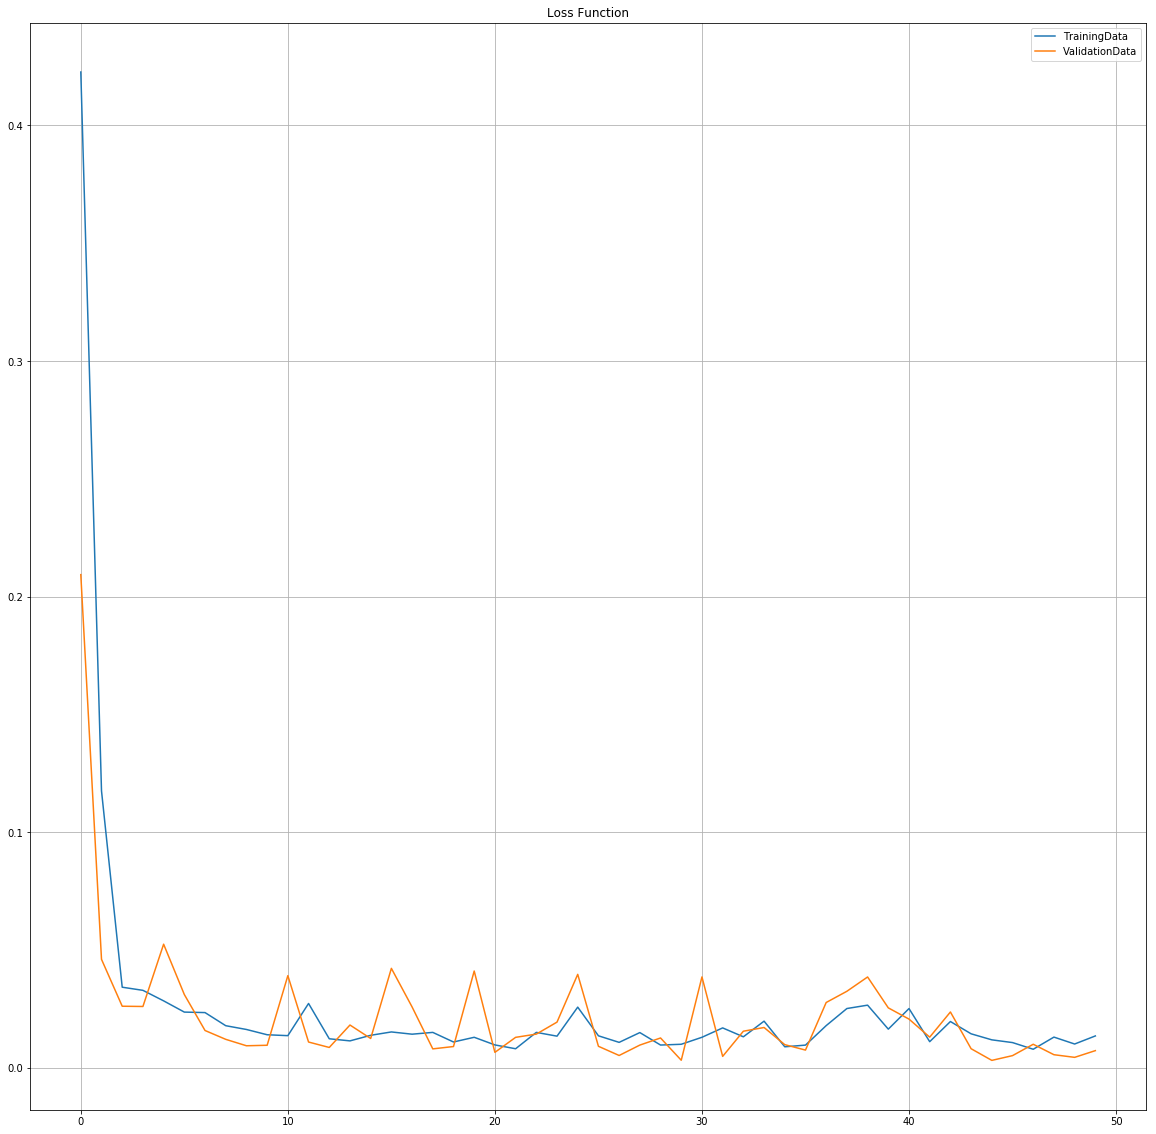

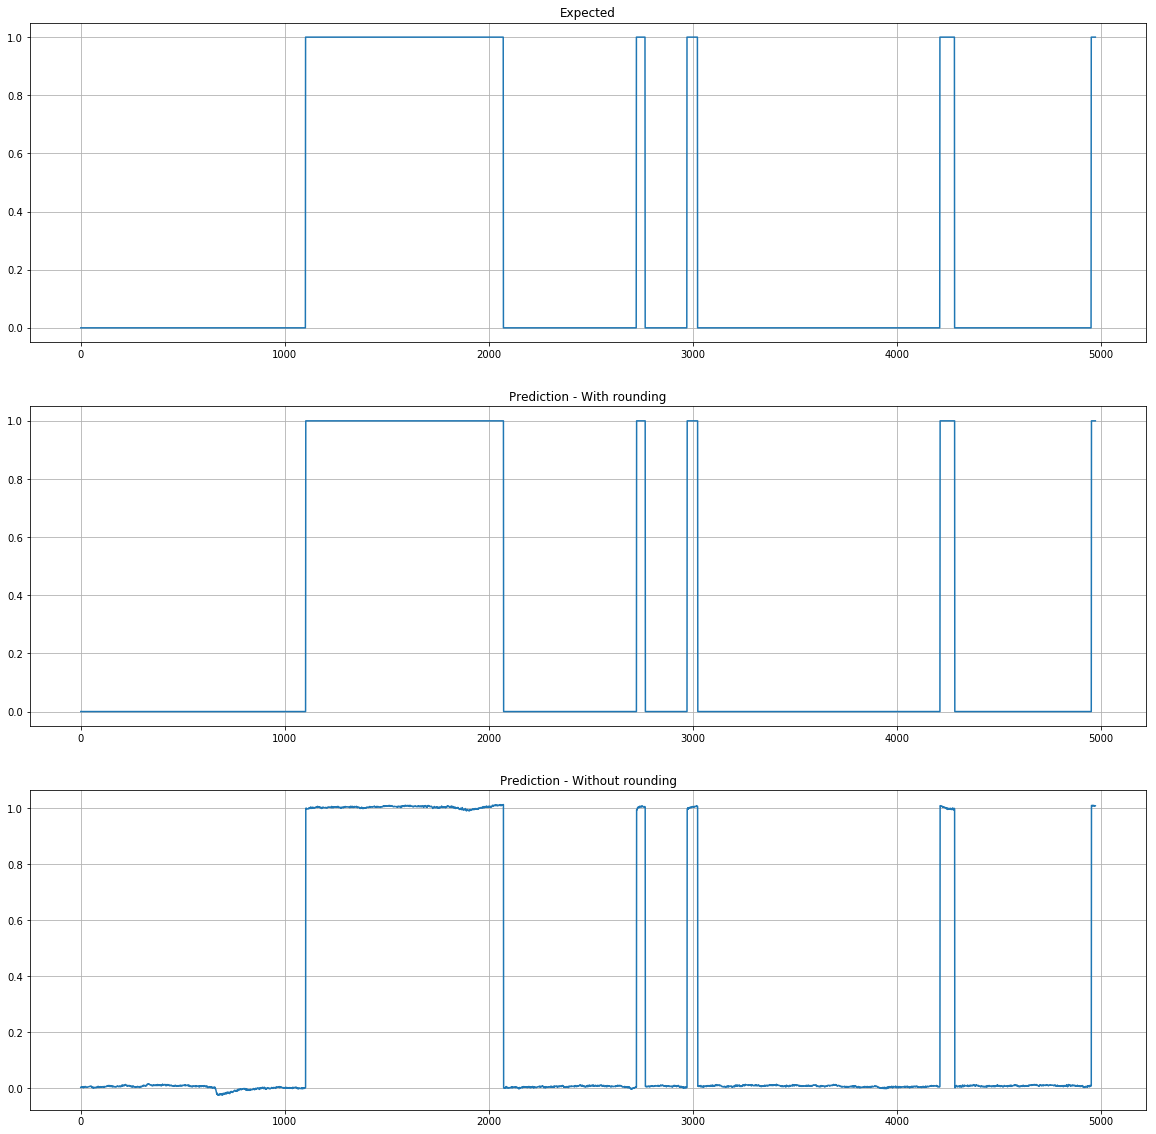

In [86]:
testID = 5
print "TestID: ", testID

###################################
lagValue = 1
epoch = 50
batch = 50
lstmStack = 1
layerOutDim = 50
dropOut = 0.0
resultsFilename = 'TestResults.txt'
###################################

predictor = LSTMPredictor(testID
                          , trainFilename='EEGEyeState_Training.arff.csv'
                          , testFilename='EEGEyeState_Testing.arff.csv')

tmp = predictor.RemoveOutliers(upperLimit=5000)
predictor.NormalizeData()

predictor.CompileModel(lagCount=lagValue
               , neuronCount=layerOutDim
               , dropOut=dropOut
               , useLaggedOutput=True
               , modelArchitectureFilename='01_modelArchitecture')

validationResults = predictor.FitModel(epochCount=epoch
           , batchSize=batch
           , resultsFile=resultsFilename
           , lossFuncFilePrefix='01_lossFile'
           , predictionFilePrefix='01_predictionFile'
           , verbosity=2)

updateResultsToFile(testID, validationResults)

### Test_06
- Outliers removed
- Data normalized
- lagValue = 1
- epoch = 1000
- batch = 50
- lstmStack = 1
- layerOutDim = 50
- dropOut = 0.0

TestID:  6
Train on 8000 samples, validate on 2000 samples
Epoch 1/1000
 - 1s - loss: 0.4087 - val_loss: 0.2179
Epoch 2/1000
 - 0s - loss: 0.0886 - val_loss: 0.0182
Epoch 3/1000
 - 0s - loss: 0.0379 - val_loss: 0.0275
Epoch 4/1000
 - 0s - loss: 0.0480 - val_loss: 0.0241
Epoch 5/1000
 - 0s - loss: 0.0276 - val_loss: 0.0245
Epoch 6/1000
 - 0s - loss: 0.0237 - val_loss: 0.0151
Epoch 7/1000
 - 0s - loss: 0.0210 - val_loss: 0.0173
Epoch 8/1000
 - 0s - loss: 0.0175 - val_loss: 0.0155
Epoch 9/1000
 - 0s - loss: 0.0184 - val_loss: 0.0126
Epoch 10/1000
 - 0s - loss: 0.0207 - val_loss: 0.0386
Epoch 11/1000
 - 0s - loss: 0.0277 - val_loss: 0.0290
Epoch 12/1000
 - 0s - loss: 0.0234 - val_loss: 0.0203
Epoch 13/1000
 - 0s - loss: 0.0211 - val_loss: 0.0251
Epoch 14/1000
 - 0s - loss: 0.0212 - val_loss: 0.0169
Epoch 15/1000
 - 0s - loss: 0.0147 - val_loss: 0.0196
Epoch 16/1000
 - 0s - loss: 0.0170 - val_loss: 0.0273
Epoch 17/1000
 - 0s - loss: 0.0182 - val_loss: 0.0202
Epoch 18/1000
 - 0s - loss: 0.01

Epoch 151/1000
 - 0s - loss: 0.0106 - val_loss: 0.0154
Epoch 152/1000
 - 0s - loss: 0.0098 - val_loss: 0.0065
Epoch 153/1000
 - 0s - loss: 0.0107 - val_loss: 0.0138
Epoch 154/1000
 - 0s - loss: 0.0080 - val_loss: 0.0089
Epoch 155/1000
 - 1s - loss: 0.0082 - val_loss: 0.0046
Epoch 156/1000
 - 1s - loss: 0.0069 - val_loss: 0.0040
Epoch 157/1000
 - 1s - loss: 0.0100 - val_loss: 0.0102
Epoch 158/1000
 - 1s - loss: 0.0079 - val_loss: 0.0052
Epoch 159/1000
 - 1s - loss: 0.0114 - val_loss: 0.0033
Epoch 160/1000
 - 1s - loss: 0.0056 - val_loss: 0.0024
Epoch 161/1000
 - 1s - loss: 0.0081 - val_loss: 0.0098
Epoch 162/1000
 - 0s - loss: 0.0067 - val_loss: 0.0039
Epoch 163/1000
 - 0s - loss: 0.0122 - val_loss: 0.0167
Epoch 164/1000
 - 0s - loss: 0.0094 - val_loss: 0.0197
Epoch 165/1000
 - 0s - loss: 0.0075 - val_loss: 0.0076
Epoch 166/1000
 - 0s - loss: 0.0107 - val_loss: 0.0135
Epoch 167/1000
 - 0s - loss: 0.0084 - val_loss: 0.0088
Epoch 168/1000
 - 0s - loss: 0.0102 - val_loss: 0.0040
Epoch 169/

Epoch 300/1000
 - 0s - loss: 0.0069 - val_loss: 0.0020
Epoch 301/1000
 - 0s - loss: 0.0084 - val_loss: 0.0147
Epoch 302/1000
 - 0s - loss: 0.0088 - val_loss: 0.0039
Epoch 303/1000
 - 0s - loss: 0.0055 - val_loss: 0.0060
Epoch 304/1000
 - 0s - loss: 0.0108 - val_loss: 0.0029
Epoch 305/1000
 - 0s - loss: 0.0139 - val_loss: 0.0092
Epoch 306/1000
 - 0s - loss: 0.0080 - val_loss: 0.0039
Epoch 307/1000
 - 0s - loss: 0.0046 - val_loss: 0.0021
Epoch 308/1000
 - 0s - loss: 0.0090 - val_loss: 0.0049
Epoch 309/1000
 - 0s - loss: 0.0056 - val_loss: 0.0031
Epoch 310/1000
 - 0s - loss: 0.0054 - val_loss: 0.0075
Epoch 311/1000
 - 0s - loss: 0.0090 - val_loss: 0.0103
Epoch 312/1000
 - 0s - loss: 0.0103 - val_loss: 0.0159
Epoch 313/1000
 - 0s - loss: 0.0087 - val_loss: 0.0083
Epoch 314/1000
 - 0s - loss: 0.0052 - val_loss: 0.0028
Epoch 315/1000
 - 0s - loss: 0.0045 - val_loss: 0.0052
Epoch 316/1000
 - 0s - loss: 0.0083 - val_loss: 0.0037
Epoch 317/1000
 - 0s - loss: 0.0072 - val_loss: 0.0138
Epoch 318/

Epoch 449/1000
 - 0s - loss: 0.0080 - val_loss: 0.0024
Epoch 450/1000
 - 0s - loss: 0.0081 - val_loss: 0.0041
Epoch 451/1000
 - 0s - loss: 0.0132 - val_loss: 0.0110
Epoch 452/1000
 - 0s - loss: 0.0169 - val_loss: 0.0149
Epoch 453/1000
 - 0s - loss: 0.0070 - val_loss: 0.0024
Epoch 454/1000
 - 0s - loss: 0.0053 - val_loss: 0.0061
Epoch 455/1000
 - 0s - loss: 0.0108 - val_loss: 0.0124
Epoch 456/1000
 - 0s - loss: 0.0074 - val_loss: 0.0067
Epoch 457/1000
 - 0s - loss: 0.0066 - val_loss: 0.0021
Epoch 458/1000
 - 0s - loss: 0.0082 - val_loss: 0.0194
Epoch 459/1000
 - 0s - loss: 0.0119 - val_loss: 0.0178
Epoch 460/1000
 - 0s - loss: 0.0129 - val_loss: 0.0104
Epoch 461/1000
 - 0s - loss: 0.0083 - val_loss: 0.0105
Epoch 462/1000
 - 0s - loss: 0.0072 - val_loss: 0.0034
Epoch 463/1000
 - 0s - loss: 0.0061 - val_loss: 0.0054
Epoch 464/1000
 - 0s - loss: 0.0090 - val_loss: 0.0072
Epoch 465/1000
 - 0s - loss: 0.0074 - val_loss: 0.0027
Epoch 466/1000
 - 0s - loss: 0.0065 - val_loss: 0.0072
Epoch 467/

Epoch 598/1000
 - 0s - loss: 0.0111 - val_loss: 0.0156
Epoch 599/1000
 - 0s - loss: 0.0063 - val_loss: 0.0056
Epoch 600/1000
 - 0s - loss: 0.0131 - val_loss: 0.0084
Epoch 601/1000
 - 0s - loss: 0.0115 - val_loss: 0.0083
Epoch 602/1000
 - 1s - loss: 0.0059 - val_loss: 0.0022
Epoch 603/1000
 - 1s - loss: 0.0047 - val_loss: 0.0073
Epoch 604/1000
 - 1s - loss: 0.0105 - val_loss: 0.0019
Epoch 605/1000
 - 1s - loss: 0.0099 - val_loss: 0.0090
Epoch 606/1000
 - 1s - loss: 0.0059 - val_loss: 0.0071
Epoch 607/1000
 - 1s - loss: 0.0088 - val_loss: 0.0062
Epoch 608/1000
 - 1s - loss: 0.0128 - val_loss: 0.0084
Epoch 609/1000
 - 0s - loss: 0.0104 - val_loss: 0.0158
Epoch 610/1000
 - 0s - loss: 0.0101 - val_loss: 0.0204
Epoch 611/1000
 - 0s - loss: 0.0117 - val_loss: 0.0098
Epoch 612/1000
 - 0s - loss: 0.0088 - val_loss: 0.0047
Epoch 613/1000
 - 0s - loss: 0.0114 - val_loss: 0.0068
Epoch 614/1000
 - 0s - loss: 0.0142 - val_loss: 0.0160
Epoch 615/1000
 - 0s - loss: 0.0075 - val_loss: 0.0048
Epoch 616/

Epoch 747/1000
 - 0s - loss: 0.0114 - val_loss: 0.0100
Epoch 748/1000
 - 0s - loss: 0.0091 - val_loss: 0.0023
Epoch 749/1000
 - 0s - loss: 0.0062 - val_loss: 0.0030
Epoch 750/1000
 - 0s - loss: 0.0066 - val_loss: 0.0143
Epoch 751/1000
 - 0s - loss: 0.0100 - val_loss: 0.0037
Epoch 752/1000
 - 0s - loss: 0.0088 - val_loss: 0.0021
Epoch 753/1000
 - 0s - loss: 0.0036 - val_loss: 0.0063
Epoch 754/1000
 - 0s - loss: 0.0102 - val_loss: 0.0042
Epoch 755/1000
 - 0s - loss: 0.0050 - val_loss: 0.0062
Epoch 756/1000
 - 0s - loss: 0.0044 - val_loss: 0.0023
Epoch 757/1000
 - 0s - loss: 0.0093 - val_loss: 0.0021
Epoch 758/1000
 - 0s - loss: 0.0062 - val_loss: 0.0121
Epoch 759/1000
 - 0s - loss: 0.0053 - val_loss: 0.0021
Epoch 760/1000
 - 0s - loss: 0.0063 - val_loss: 0.0154
Epoch 761/1000
 - 0s - loss: 0.0057 - val_loss: 0.0035
Epoch 762/1000
 - 0s - loss: 0.0085 - val_loss: 0.0110
Epoch 763/1000
 - 0s - loss: 0.0043 - val_loss: 0.0042
Epoch 764/1000
 - 0s - loss: 0.0081 - val_loss: 0.0046
Epoch 765/

Epoch 896/1000
 - 0s - loss: 0.0040 - val_loss: 0.0036
Epoch 897/1000
 - 0s - loss: 0.0056 - val_loss: 0.0034
Epoch 898/1000
 - 0s - loss: 0.0066 - val_loss: 0.0095
Epoch 899/1000
 - 0s - loss: 0.0055 - val_loss: 0.0028
Epoch 900/1000
 - 0s - loss: 0.0037 - val_loss: 0.0019
Epoch 901/1000
 - 0s - loss: 0.0037 - val_loss: 0.0011
Epoch 902/1000
 - 0s - loss: 0.0047 - val_loss: 0.0043
Epoch 903/1000
 - 0s - loss: 0.0076 - val_loss: 0.0018
Epoch 904/1000
 - 0s - loss: 0.0047 - val_loss: 0.0047
Epoch 905/1000
 - 0s - loss: 0.0074 - val_loss: 0.0051
Epoch 906/1000
 - 0s - loss: 0.0109 - val_loss: 0.0019
Epoch 907/1000
 - 0s - loss: 0.0064 - val_loss: 0.0084
Epoch 908/1000
 - 0s - loss: 0.0040 - val_loss: 0.0059
Epoch 909/1000
 - 0s - loss: 0.0088 - val_loss: 0.0053
Epoch 910/1000
 - 0s - loss: 0.0086 - val_loss: 0.0035
Epoch 911/1000
 - 0s - loss: 0.0088 - val_loss: 0.0042
Epoch 912/1000
 - 0s - loss: 0.0055 - val_loss: 0.0049
Epoch 913/1000
 - 0s - loss: 0.0055 - val_loss: 0.0027
Epoch 914/

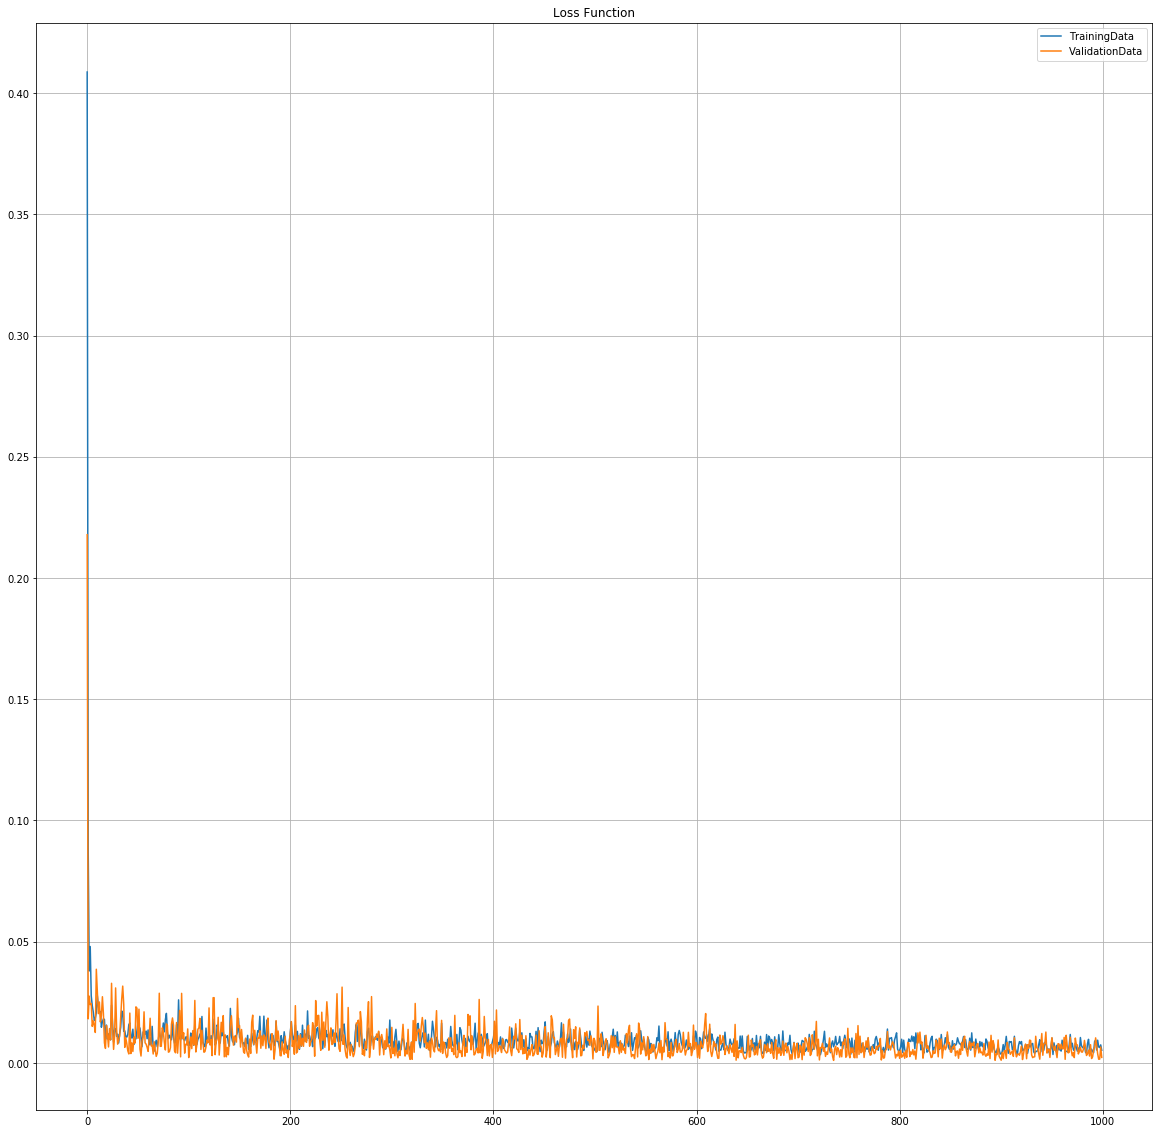

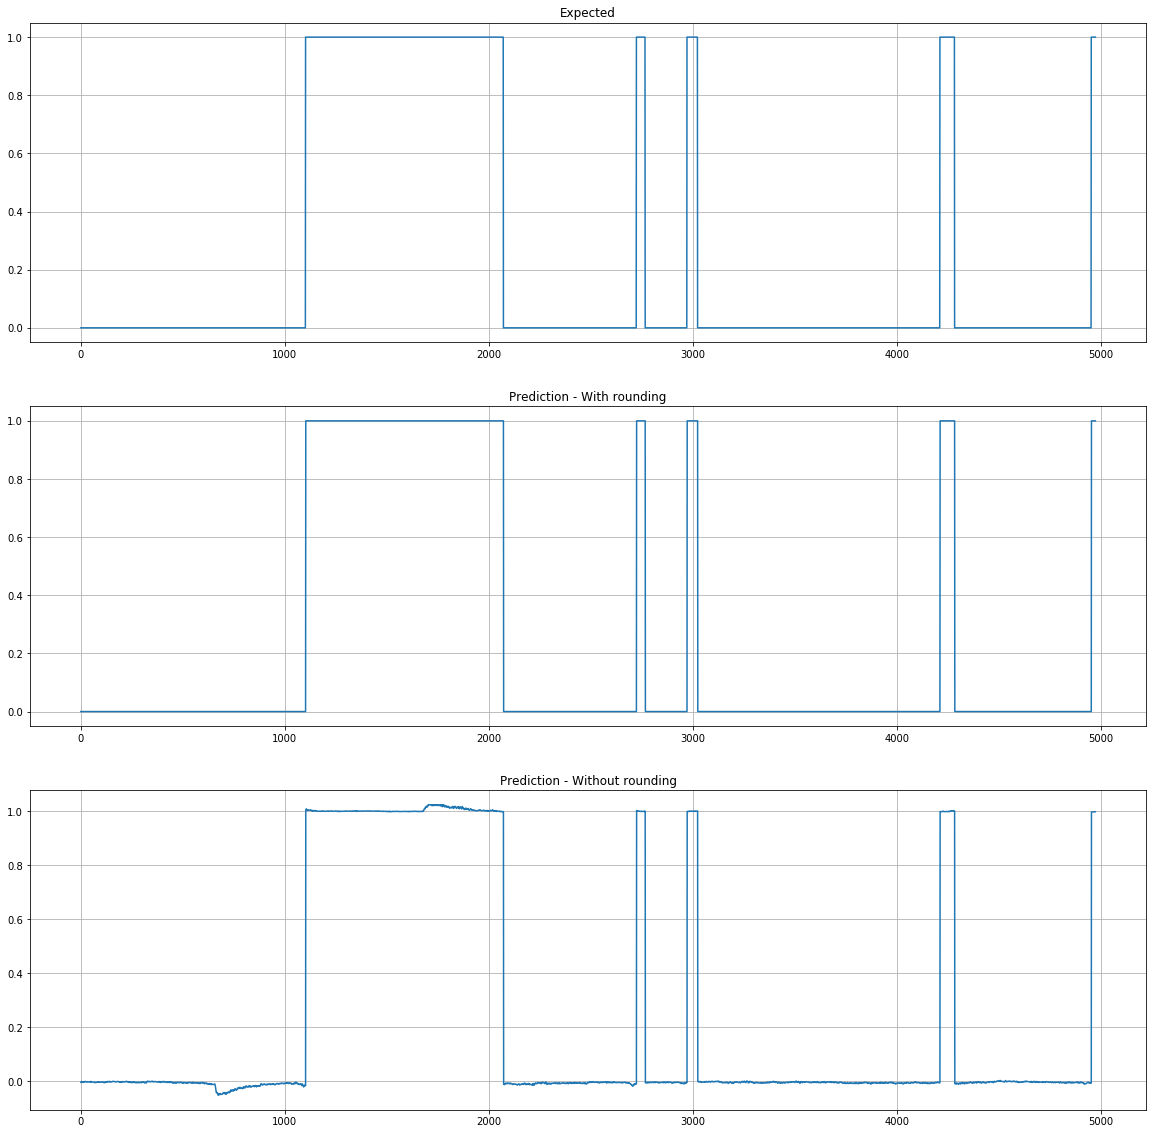

In [87]:
testID = 6
print "TestID: ", testID

###################################
lagValue = 1
epoch = 1000
batch = 50
lstmStack = 1
layerOutDim = 50
dropOut = 0.0
resultsFilename = 'TestResults.txt'
###################################

predictor = LSTMPredictor(testID
                          , trainFilename='EEGEyeState_Training.arff.csv'
                          , testFilename='EEGEyeState_Testing.arff.csv')

tmp = predictor.RemoveOutliers(upperLimit=5000)
predictor.NormalizeData()

predictor.CompileModel(lagCount=lagValue
               , neuronCount=layerOutDim
               , dropOut=dropOut
               , useLaggedOutput=True
               , modelArchitectureFilename='01_modelArchitecture')

validationResults = predictor.FitModel(epochCount=epoch
           , batchSize=batch
           , resultsFile=resultsFilename
           , lossFuncFilePrefix='01_lossFile'
           , predictionFilePrefix='01_predictionFile'
           , verbosity=2)

updateResultsToFile(testID, validationResults)

### Test_07
- Outliers removed
- Data normalized
- lagValue = 1
- epoch = 1000
- batch = 50
- lstmStack = 5
- layerOutDim = 50
- dropOut = 0.0

TestID:  7
Train on 8000 samples, validate on 2000 samples
Epoch 1/1000
 - 1s - loss: 0.4299 - val_loss: 0.1816
Epoch 2/1000
 - 0s - loss: 0.1079 - val_loss: 0.0510
Epoch 3/1000
 - 0s - loss: 0.0387 - val_loss: 0.0357
Epoch 4/1000
 - 0s - loss: 0.0417 - val_loss: 0.0314
Epoch 5/1000
 - 0s - loss: 0.0299 - val_loss: 0.0561
Epoch 6/1000
 - 0s - loss: 0.0258 - val_loss: 0.0226
Epoch 7/1000
 - 0s - loss: 0.0252 - val_loss: 0.0412
Epoch 8/1000
 - 0s - loss: 0.0263 - val_loss: 0.0196
Epoch 9/1000
 - 0s - loss: 0.0213 - val_loss: 0.0340
Epoch 10/1000
 - 0s - loss: 0.0184 - val_loss: 0.0177
Epoch 11/1000
 - 0s - loss: 0.0174 - val_loss: 0.0300
Epoch 12/1000
 - 0s - loss: 0.0212 - val_loss: 0.0489
Epoch 13/1000
 - 0s - loss: 0.0168 - val_loss: 0.0174
Epoch 14/1000
 - 0s - loss: 0.0192 - val_loss: 0.0123
Epoch 15/1000
 - 0s - loss: 0.0100 - val_loss: 0.0077
Epoch 16/1000
 - 0s - loss: 0.0087 - val_loss: 0.0153
Epoch 17/1000
 - 0s - loss: 0.0127 - val_loss: 0.0214
Epoch 18/1000
 - 0s - loss: 0.01

Epoch 151/1000
 - 0s - loss: 0.0143 - val_loss: 0.0107
Epoch 152/1000
 - 0s - loss: 0.0088 - val_loss: 0.0034
Epoch 153/1000
 - 0s - loss: 0.0043 - val_loss: 0.0062
Epoch 154/1000
 - 0s - loss: 0.0106 - val_loss: 0.0076
Epoch 155/1000
 - 0s - loss: 0.0109 - val_loss: 0.0205
Epoch 156/1000
 - 0s - loss: 0.0090 - val_loss: 0.0118
Epoch 157/1000
 - 0s - loss: 0.0069 - val_loss: 0.0046
Epoch 158/1000
 - 0s - loss: 0.0064 - val_loss: 0.0049
Epoch 159/1000
 - 0s - loss: 0.0060 - val_loss: 0.0089
Epoch 160/1000
 - 0s - loss: 0.0089 - val_loss: 0.0113
Epoch 161/1000
 - 0s - loss: 0.0089 - val_loss: 0.0115
Epoch 162/1000
 - 0s - loss: 0.0086 - val_loss: 0.0035
Epoch 163/1000
 - 0s - loss: 0.0082 - val_loss: 0.0115
Epoch 164/1000
 - 0s - loss: 0.0094 - val_loss: 0.0081
Epoch 165/1000
 - 0s - loss: 0.0154 - val_loss: 0.0096
Epoch 166/1000
 - 0s - loss: 0.0121 - val_loss: 0.0095
Epoch 167/1000
 - 0s - loss: 0.0075 - val_loss: 0.0057
Epoch 168/1000
 - 0s - loss: 0.0199 - val_loss: 0.0188
Epoch 169/

Epoch 300/1000
 - 0s - loss: 0.0106 - val_loss: 0.0039
Epoch 301/1000
 - 0s - loss: 0.0100 - val_loss: 0.0064
Epoch 302/1000
 - 0s - loss: 0.0159 - val_loss: 0.0071
Epoch 303/1000
 - 0s - loss: 0.0071 - val_loss: 0.0099
Epoch 304/1000
 - 0s - loss: 0.0105 - val_loss: 0.0206
Epoch 305/1000
 - 0s - loss: 0.0073 - val_loss: 0.0085
Epoch 306/1000
 - 0s - loss: 0.0097 - val_loss: 0.0108
Epoch 307/1000
 - 0s - loss: 0.0110 - val_loss: 0.0019
Epoch 308/1000
 - 0s - loss: 0.0073 - val_loss: 0.0061
Epoch 309/1000
 - 0s - loss: 0.0133 - val_loss: 0.0185
Epoch 310/1000
 - 0s - loss: 0.0059 - val_loss: 0.0027
Epoch 311/1000
 - 0s - loss: 0.0052 - val_loss: 0.0059
Epoch 312/1000
 - 0s - loss: 0.0073 - val_loss: 0.0115
Epoch 313/1000
 - 0s - loss: 0.0072 - val_loss: 0.0074
Epoch 314/1000
 - 0s - loss: 0.0094 - val_loss: 0.0175
Epoch 315/1000
 - 0s - loss: 0.0075 - val_loss: 0.0133
Epoch 316/1000
 - 0s - loss: 0.0062 - val_loss: 0.0045
Epoch 317/1000
 - 0s - loss: 0.0113 - val_loss: 0.0045
Epoch 318/

Epoch 449/1000
 - 0s - loss: 0.0070 - val_loss: 0.0096
Epoch 450/1000
 - 0s - loss: 0.0164 - val_loss: 0.0118
Epoch 451/1000
 - 0s - loss: 0.0054 - val_loss: 0.0050
Epoch 452/1000
 - 0s - loss: 0.0042 - val_loss: 0.0067
Epoch 453/1000
 - 0s - loss: 0.0064 - val_loss: 0.0066
Epoch 454/1000
 - 0s - loss: 0.0103 - val_loss: 0.0030
Epoch 455/1000
 - 0s - loss: 0.0125 - val_loss: 0.0029
Epoch 456/1000
 - 0s - loss: 0.0078 - val_loss: 0.0027
Epoch 457/1000
 - 0s - loss: 0.0063 - val_loss: 0.0053
Epoch 458/1000
 - 0s - loss: 0.0085 - val_loss: 0.0126
Epoch 459/1000
 - 0s - loss: 0.0073 - val_loss: 0.0024
Epoch 460/1000
 - 0s - loss: 0.0075 - val_loss: 0.0112
Epoch 461/1000
 - 0s - loss: 0.0057 - val_loss: 0.0017
Epoch 462/1000
 - 0s - loss: 0.0060 - val_loss: 0.0038
Epoch 463/1000
 - 0s - loss: 0.0074 - val_loss: 0.0111
Epoch 464/1000
 - 0s - loss: 0.0082 - val_loss: 0.0051
Epoch 465/1000
 - 0s - loss: 0.0091 - val_loss: 0.0025
Epoch 466/1000
 - 0s - loss: 0.0058 - val_loss: 0.0155
Epoch 467/

Epoch 598/1000
 - 0s - loss: 0.0088 - val_loss: 0.0072
Epoch 599/1000
 - 0s - loss: 0.0115 - val_loss: 0.0101
Epoch 600/1000
 - 0s - loss: 0.0061 - val_loss: 0.0012
Epoch 601/1000
 - 0s - loss: 0.0066 - val_loss: 0.0101
Epoch 602/1000
 - 0s - loss: 0.0068 - val_loss: 0.0032
Epoch 603/1000
 - 0s - loss: 0.0083 - val_loss: 0.0059
Epoch 604/1000
 - 0s - loss: 0.0078 - val_loss: 0.0045
Epoch 605/1000
 - 0s - loss: 0.0077 - val_loss: 0.0078
Epoch 606/1000
 - 0s - loss: 0.0074 - val_loss: 0.0037
Epoch 607/1000
 - 0s - loss: 0.0133 - val_loss: 0.0105
Epoch 608/1000
 - 0s - loss: 0.0062 - val_loss: 0.0065
Epoch 609/1000
 - 0s - loss: 0.0082 - val_loss: 0.0044
Epoch 610/1000
 - 0s - loss: 0.0085 - val_loss: 0.0104
Epoch 611/1000
 - 0s - loss: 0.0062 - val_loss: 0.0063
Epoch 612/1000
 - 0s - loss: 0.0068 - val_loss: 0.0051
Epoch 613/1000
 - 0s - loss: 0.0068 - val_loss: 0.0076
Epoch 614/1000
 - 0s - loss: 0.0048 - val_loss: 0.0048
Epoch 615/1000
 - 0s - loss: 0.0106 - val_loss: 0.0021
Epoch 616/

Epoch 747/1000
 - 0s - loss: 0.0111 - val_loss: 0.0094
Epoch 748/1000
 - 0s - loss: 0.0053 - val_loss: 0.0012
Epoch 749/1000
 - 0s - loss: 0.0113 - val_loss: 0.0037
Epoch 750/1000
 - 0s - loss: 0.0083 - val_loss: 0.0086
Epoch 751/1000
 - 0s - loss: 0.0086 - val_loss: 0.0017
Epoch 752/1000
 - 0s - loss: 0.0045 - val_loss: 0.0047
Epoch 753/1000
 - 0s - loss: 0.0095 - val_loss: 0.0026
Epoch 754/1000
 - 0s - loss: 0.0088 - val_loss: 0.0046
Epoch 755/1000
 - 0s - loss: 0.0058 - val_loss: 0.0034
Epoch 756/1000
 - 0s - loss: 0.0099 - val_loss: 0.0059
Epoch 757/1000
 - 0s - loss: 0.0103 - val_loss: 0.0128
Epoch 758/1000
 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 759/1000
 - 0s - loss: 0.0062 - val_loss: 0.0055
Epoch 760/1000
 - 0s - loss: 0.0123 - val_loss: 0.0097
Epoch 761/1000
 - 0s - loss: 0.0108 - val_loss: 0.0060
Epoch 762/1000
 - 0s - loss: 0.0038 - val_loss: 9.9860e-04
Epoch 763/1000
 - 0s - loss: 0.0065 - val_loss: 0.0062
Epoch 764/1000
 - 0s - loss: 0.0115 - val_loss: 0.0075
Epoch 

Epoch 896/1000
 - 0s - loss: 0.0081 - val_loss: 0.0039
Epoch 897/1000
 - 0s - loss: 0.0125 - val_loss: 0.0077
Epoch 898/1000
 - 0s - loss: 0.0063 - val_loss: 0.0034
Epoch 899/1000
 - 0s - loss: 0.0087 - val_loss: 0.0072
Epoch 900/1000
 - 0s - loss: 0.0055 - val_loss: 0.0022
Epoch 901/1000
 - 0s - loss: 0.0048 - val_loss: 0.0072
Epoch 902/1000
 - 0s - loss: 0.0079 - val_loss: 0.0129
Epoch 903/1000
 - 0s - loss: 0.0077 - val_loss: 0.0024
Epoch 904/1000
 - 0s - loss: 0.0098 - val_loss: 0.0023
Epoch 905/1000
 - 0s - loss: 0.0062 - val_loss: 0.0086
Epoch 906/1000
 - 0s - loss: 0.0067 - val_loss: 0.0052
Epoch 907/1000
 - 0s - loss: 0.0118 - val_loss: 0.0100
Epoch 908/1000
 - 0s - loss: 0.0060 - val_loss: 0.0023
Epoch 909/1000
 - 0s - loss: 0.0094 - val_loss: 0.0046
Epoch 910/1000
 - 0s - loss: 0.0048 - val_loss: 0.0030
Epoch 911/1000
 - 0s - loss: 0.0070 - val_loss: 0.0073
Epoch 912/1000
 - 0s - loss: 0.0053 - val_loss: 0.0038
Epoch 913/1000
 - 0s - loss: 0.0066 - val_loss: 0.0047
Epoch 914/

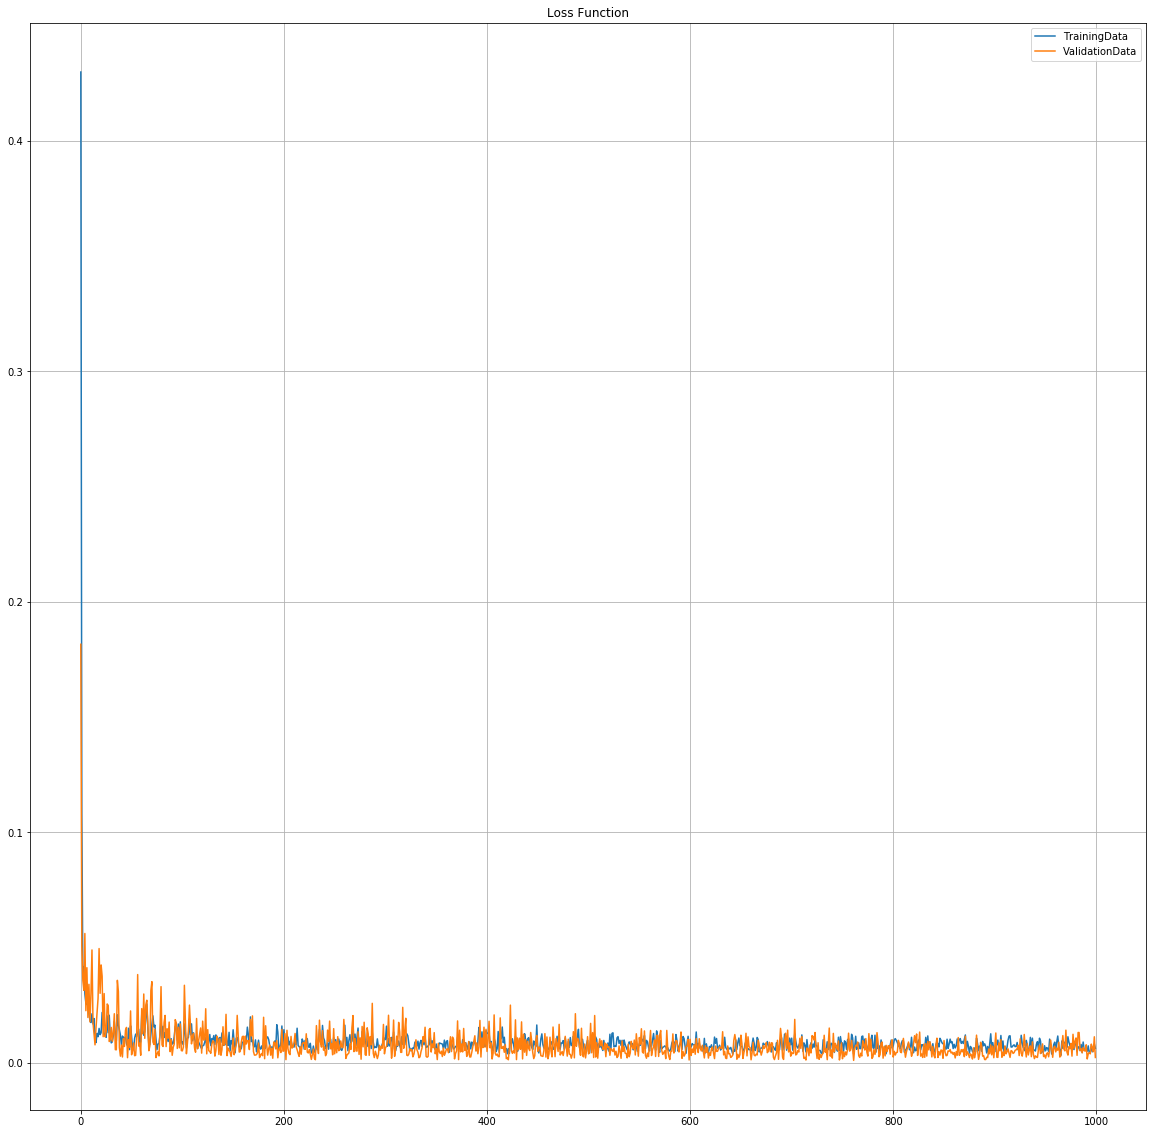

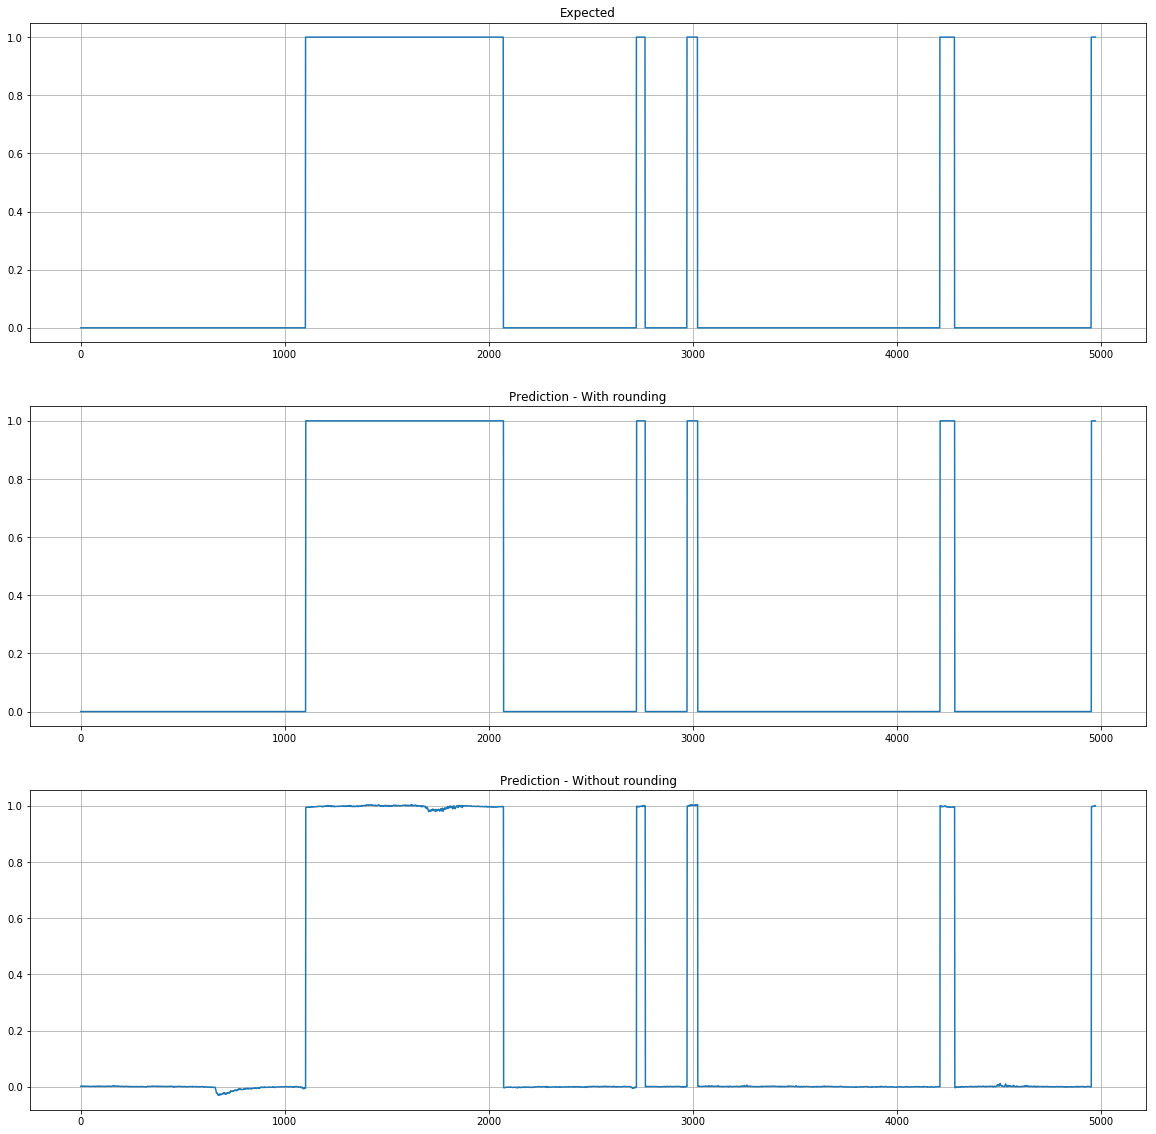

In [88]:
testID = 7
print "TestID: ", testID

###################################
lagValue = 1
epoch = 1000
batch = 50
lstmStack = 5
layerOutDim = 50
dropOut = 0.0
resultsFilename = 'TestResults.txt'
###################################

predictor = LSTMPredictor(testID
                          , trainFilename='EEGEyeState_Training.arff.csv'
                          , testFilename='EEGEyeState_Testing.arff.csv')

tmp = predictor.RemoveOutliers(upperLimit=5000)
predictor.NormalizeData()

predictor.CompileModel(lagCount=lagValue
               , neuronCount=layerOutDim
               , dropOut=dropOut
               , useLaggedOutput=True
               , modelArchitectureFilename='01_modelArchitecture')

validationResults = predictor.FitModel(epochCount=epoch
           , batchSize=batch
           , resultsFile=resultsFilename
           , lossFuncFilePrefix='01_lossFile'
           , predictionFilePrefix='01_predictionFile'
           , verbosity=2)

updateResultsToFile(testID, validationResults)

### Test_08
- Outliers removed
- Data normalized
- lagValue = 1
- epoch = 50
- batch = 500
- lstmStack = 1
- layerOutDim = 50
- dropOut = 0.0

TestID:  8
Train on 8000 samples, validate on 2000 samples
Epoch 1/50
 - 1s - loss: 0.5549 - val_loss: 0.5050
Epoch 2/50
 - 0s - loss: 0.5157 - val_loss: 0.4712
Epoch 3/50
 - 0s - loss: 0.4746 - val_loss: 0.4344
Epoch 4/50
 - 0s - loss: 0.4282 - val_loss: 0.3920
Epoch 5/50
 - 0s - loss: 0.3742 - val_loss: 0.3422
Epoch 6/50
 - 0s - loss: 0.3102 - val_loss: 0.2832
Epoch 7/50
 - 0s - loss: 0.2542 - val_loss: 0.2327
Epoch 8/50
 - 0s - loss: 0.2321 - val_loss: 0.2094
Epoch 9/50
 - 0s - loss: 0.1918 - val_loss: 0.1713
Epoch 10/50
 - 0s - loss: 0.1538 - val_loss: 0.1300
Epoch 11/50
 - 0s - loss: 0.1090 - val_loss: 0.0830
Epoch 12/50
 - 0s - loss: 0.0558 - val_loss: 0.0291
Epoch 13/50
 - 0s - loss: 0.0268 - val_loss: 0.0192
Epoch 14/50
 - 0s - loss: 0.0381 - val_loss: 0.0188
Epoch 15/50
 - 0s - loss: 0.0354 - val_loss: 0.0217
Epoch 16/50
 - 0s - loss: 0.0296 - val_loss: 0.0207
Epoch 17/50
 - 0s - loss: 0.0279 - val_loss: 0.0190
Epoch 18/50
 - 0s - loss: 0.0293 - val_loss: 0.0182
Epoch 19/50
 -

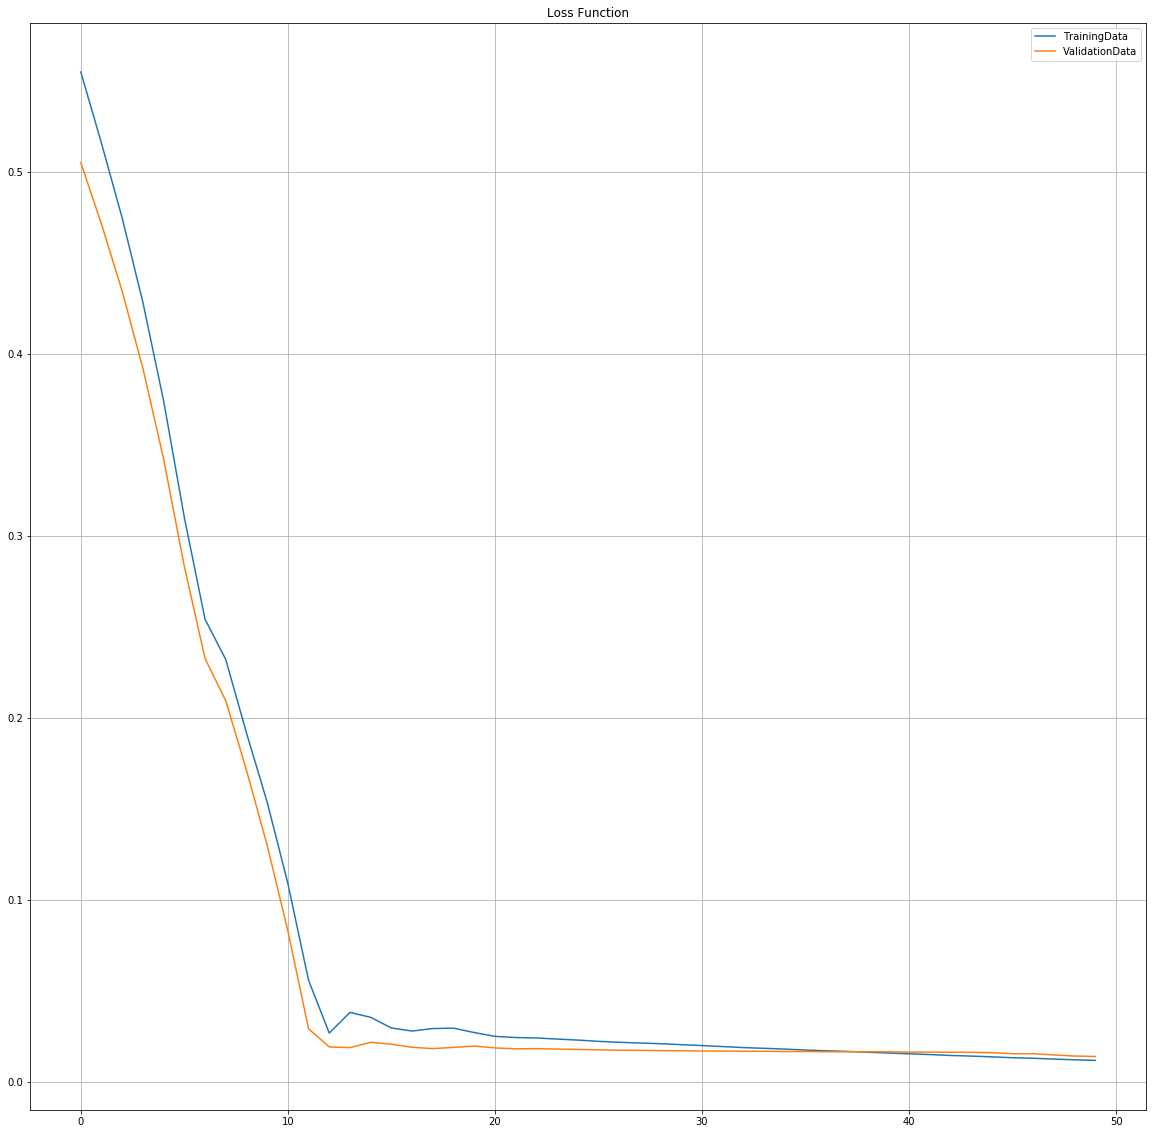

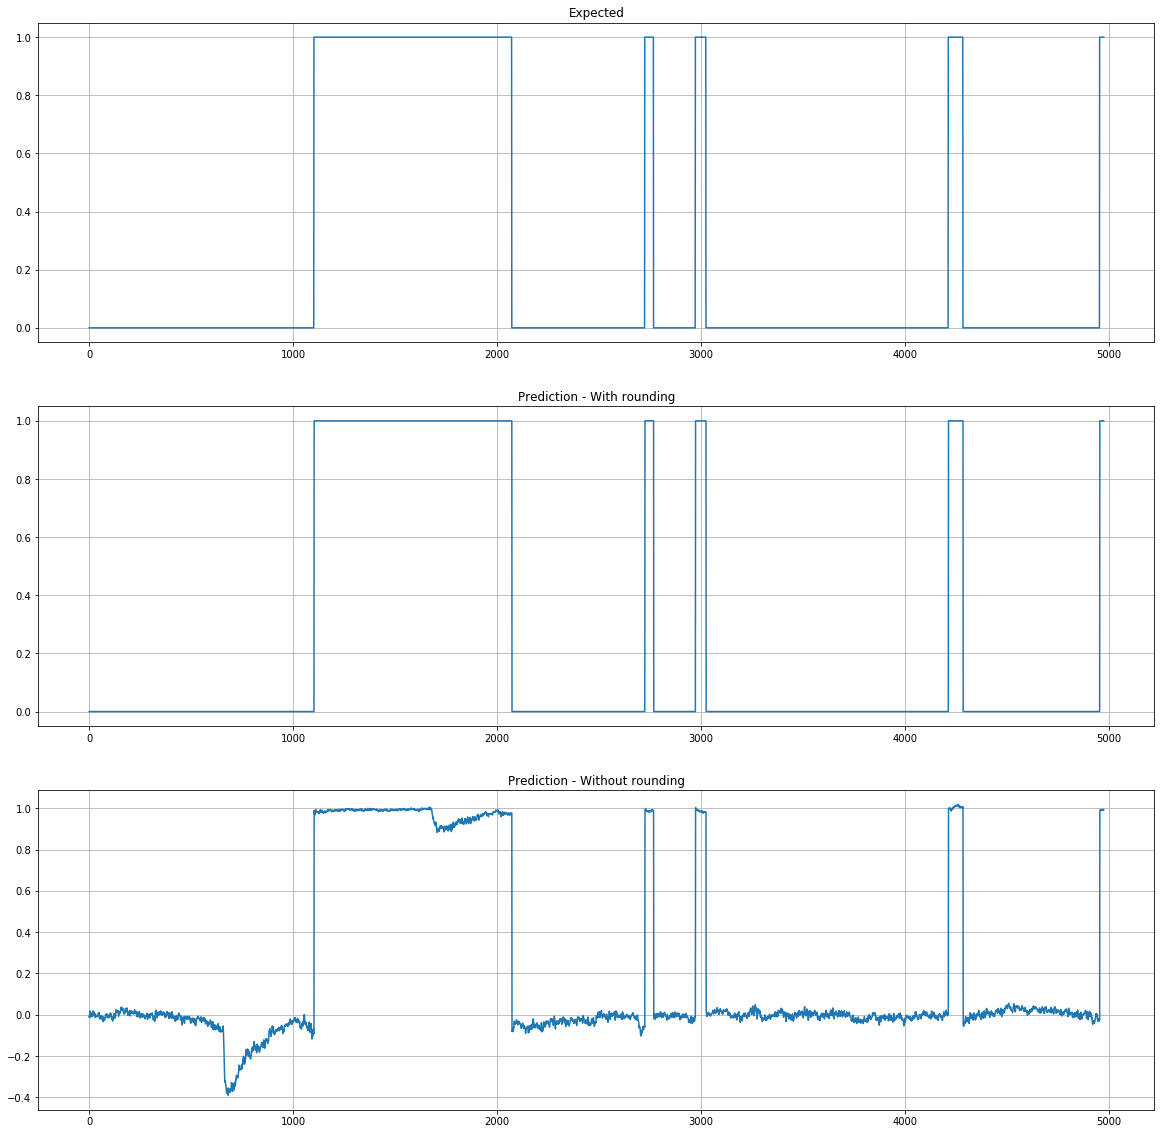

In [89]:
testID = 8
print "TestID: ", testID

###################################
lagValue = 1
epoch = 50
batch = 500
lstmStack = 1
layerOutDim = 50
dropOut = 0.0
resultsFilename = 'TestResults.txt'
###################################

predictor = LSTMPredictor(testID
                          , trainFilename='EEGEyeState_Training.arff.csv'
                          , testFilename='EEGEyeState_Testing.arff.csv')

tmp = predictor.RemoveOutliers(upperLimit=5000)
predictor.NormalizeData()

predictor.CompileModel(lagCount=lagValue
               , neuronCount=layerOutDim
               , dropOut=dropOut
               , useLaggedOutput=True
               , modelArchitectureFilename='01_modelArchitecture')

validationResults = predictor.FitModel(epochCount=epoch
           , batchSize=batch
           , resultsFile=resultsFilename
           , lossFuncFilePrefix='01_lossFile'
           , predictionFilePrefix='01_predictionFile'
           , verbosity=2)

updateResultsToFile(testID, validationResults)

### Test_9
- Outliers removed
- Data normalized
- lagValue = 1
- epoch = 1000
- batch = 500
- lstmStack = 5
- layerOutDim = 50
- dropOut = 0.0

TestID:  9
Train on 8000 samples, validate on 2000 samples
Epoch 1/1000
 - 1s - loss: 0.5734 - val_loss: 0.5245
Epoch 2/1000
 - 0s - loss: 0.5403 - val_loss: 0.4968
Epoch 3/1000
 - 0s - loss: 0.5071 - val_loss: 0.4675
Epoch 4/1000
 - 0s - loss: 0.4708 - val_loss: 0.4346
Epoch 5/1000
 - 0s - loss: 0.4290 - val_loss: 0.3961
Epoch 6/1000
 - 0s - loss: 0.3792 - val_loss: 0.3499
Epoch 7/1000
 - 0s - loss: 0.3193 - val_loss: 0.2941
Epoch 8/1000
 - 0s - loss: 0.2651 - val_loss: 0.2450
Epoch 9/1000
 - 0s - loss: 0.2410 - val_loss: 0.2190
Epoch 10/1000
 - 0s - loss: 0.1993 - val_loss: 0.1781
Epoch 11/1000
 - 0s - loss: 0.1581 - val_loss: 0.1330
Epoch 12/1000
 - 0s - loss: 0.1069 - val_loss: 0.0781
Epoch 13/1000
 - 0s - loss: 0.0473 - val_loss: 0.0270
Epoch 14/1000
 - 0s - loss: 0.0341 - val_loss: 0.0340
Epoch 15/1000
 - 0s - loss: 0.0428 - val_loss: 0.0248
Epoch 16/1000
 - 0s - loss: 0.0394 - val_loss: 0.0222
Epoch 17/1000
 - 0s - loss: 0.0355 - val_loss: 0.0220
Epoch 18/1000
 - 0s - loss: 0.03

Epoch 151/1000
 - 0s - loss: 0.0084 - val_loss: 0.0029
Epoch 152/1000
 - 0s - loss: 0.0055 - val_loss: 0.0055
Epoch 153/1000
 - 0s - loss: 0.0068 - val_loss: 0.0057
Epoch 154/1000
 - 0s - loss: 0.0060 - val_loss: 0.0038
Epoch 155/1000
 - 0s - loss: 0.0062 - val_loss: 0.0072
Epoch 156/1000
 - 0s - loss: 0.0115 - val_loss: 0.0049
Epoch 157/1000
 - 0s - loss: 0.0072 - val_loss: 0.0056
Epoch 158/1000
 - 0s - loss: 0.0078 - val_loss: 0.0060
Epoch 159/1000
 - 0s - loss: 0.0051 - val_loss: 0.0036
Epoch 160/1000
 - 0s - loss: 0.0048 - val_loss: 0.0019
Epoch 161/1000
 - 0s - loss: 0.0035 - val_loss: 0.0023
Epoch 162/1000
 - 0s - loss: 0.0068 - val_loss: 0.0114
Epoch 163/1000
 - 0s - loss: 0.0120 - val_loss: 0.0034
Epoch 164/1000
 - 0s - loss: 0.0066 - val_loss: 0.0071
Epoch 165/1000
 - 0s - loss: 0.0080 - val_loss: 0.0103
Epoch 166/1000
 - 0s - loss: 0.0093 - val_loss: 0.0039
Epoch 167/1000
 - 0s - loss: 0.0089 - val_loss: 0.0103
Epoch 168/1000
 - 0s - loss: 0.0087 - val_loss: 0.0078
Epoch 169/

Epoch 300/1000
 - 0s - loss: 0.0043 - val_loss: 0.0012
Epoch 301/1000
 - 0s - loss: 0.0035 - val_loss: 0.0055
Epoch 302/1000
 - 0s - loss: 0.0054 - val_loss: 0.0032
Epoch 303/1000
 - 0s - loss: 0.0045 - val_loss: 0.0027
Epoch 304/1000
 - 0s - loss: 0.0041 - val_loss: 0.0035
Epoch 305/1000
 - 0s - loss: 0.0039 - val_loss: 0.0065
Epoch 306/1000
 - 0s - loss: 0.0081 - val_loss: 0.0097
Epoch 307/1000
 - 0s - loss: 0.0124 - val_loss: 0.0047
Epoch 308/1000
 - 0s - loss: 0.0066 - val_loss: 0.0077
Epoch 309/1000
 - 0s - loss: 0.0061 - val_loss: 0.0048
Epoch 310/1000
 - 0s - loss: 0.0043 - val_loss: 0.0019
Epoch 311/1000
 - 0s - loss: 0.0034 - val_loss: 0.0013
Epoch 312/1000
 - 0s - loss: 0.0043 - val_loss: 0.0032
Epoch 313/1000
 - 0s - loss: 0.0048 - val_loss: 0.0029
Epoch 314/1000
 - 0s - loss: 0.0043 - val_loss: 0.0055
Epoch 315/1000
 - 0s - loss: 0.0042 - val_loss: 0.0018
Epoch 316/1000
 - 0s - loss: 0.0050 - val_loss: 0.0022
Epoch 317/1000
 - 0s - loss: 0.0045 - val_loss: 0.0026
Epoch 318/

Epoch 449/1000
 - 0s - loss: 0.0052 - val_loss: 0.0063
Epoch 450/1000
 - 0s - loss: 0.0050 - val_loss: 0.0035
Epoch 451/1000
 - 0s - loss: 0.0043 - val_loss: 0.0033
Epoch 452/1000
 - 0s - loss: 0.0115 - val_loss: 0.0042
Epoch 453/1000
 - 0s - loss: 0.0064 - val_loss: 0.0073
Epoch 454/1000
 - 0s - loss: 0.0111 - val_loss: 0.0042
Epoch 455/1000
 - 0s - loss: 0.0065 - val_loss: 0.0033
Epoch 456/1000
 - 0s - loss: 0.0040 - val_loss: 0.0014
Epoch 457/1000
 - 0s - loss: 0.0038 - val_loss: 0.0043
Epoch 458/1000
 - 0s - loss: 0.0049 - val_loss: 0.0038
Epoch 459/1000
 - 0s - loss: 0.0043 - val_loss: 0.0025
Epoch 460/1000
 - 0s - loss: 0.0036 - val_loss: 0.0039
Epoch 461/1000
 - 0s - loss: 0.0046 - val_loss: 0.0024
Epoch 462/1000
 - 0s - loss: 0.0041 - val_loss: 0.0028
Epoch 463/1000
 - 0s - loss: 0.0047 - val_loss: 0.0030
Epoch 464/1000
 - 0s - loss: 0.0054 - val_loss: 0.0044
Epoch 465/1000
 - 0s - loss: 0.0040 - val_loss: 0.0016
Epoch 466/1000
 - 0s - loss: 0.0032 - val_loss: 0.0046
Epoch 467/

Epoch 598/1000
 - 0s - loss: 0.0072 - val_loss: 0.0029
Epoch 599/1000
 - 0s - loss: 0.0066 - val_loss: 0.0048
Epoch 600/1000
 - 0s - loss: 0.0044 - val_loss: 0.0049
Epoch 601/1000
 - 0s - loss: 0.0044 - val_loss: 0.0032
Epoch 602/1000
 - 0s - loss: 0.0051 - val_loss: 0.0027
Epoch 603/1000
 - 0s - loss: 0.0054 - val_loss: 0.0028
Epoch 604/1000
 - 0s - loss: 0.0048 - val_loss: 0.0028
Epoch 605/1000
 - 0s - loss: 0.0082 - val_loss: 0.0025
Epoch 606/1000
 - 0s - loss: 0.0065 - val_loss: 0.0033
Epoch 607/1000
 - 0s - loss: 0.0053 - val_loss: 0.0077
Epoch 608/1000
 - 0s - loss: 0.0092 - val_loss: 0.0091
Epoch 609/1000
 - 0s - loss: 0.0087 - val_loss: 0.0016
Epoch 610/1000
 - 0s - loss: 0.0029 - val_loss: 0.0022
Epoch 611/1000
 - 0s - loss: 0.0044 - val_loss: 0.0042
Epoch 612/1000
 - 0s - loss: 0.0063 - val_loss: 0.0050
Epoch 613/1000
 - 0s - loss: 0.0081 - val_loss: 0.0080
Epoch 614/1000
 - 0s - loss: 0.0066 - val_loss: 0.0070
Epoch 615/1000
 - 0s - loss: 0.0059 - val_loss: 0.0023
Epoch 616/

Epoch 747/1000
 - 0s - loss: 0.0076 - val_loss: 0.0060
Epoch 748/1000
 - 0s - loss: 0.0098 - val_loss: 0.0019
Epoch 749/1000
 - 0s - loss: 0.0045 - val_loss: 0.0060
Epoch 750/1000
 - 0s - loss: 0.0051 - val_loss: 0.0020
Epoch 751/1000
 - 0s - loss: 0.0049 - val_loss: 0.0019
Epoch 752/1000
 - 0s - loss: 0.0058 - val_loss: 0.0059
Epoch 753/1000
 - 0s - loss: 0.0053 - val_loss: 0.0042
Epoch 754/1000
 - 0s - loss: 0.0047 - val_loss: 0.0043
Epoch 755/1000
 - 0s - loss: 0.0053 - val_loss: 0.0073
Epoch 756/1000
 - 0s - loss: 0.0070 - val_loss: 0.0062
Epoch 757/1000
 - 0s - loss: 0.0108 - val_loss: 0.0038
Epoch 758/1000
 - 0s - loss: 0.0034 - val_loss: 0.0017
Epoch 759/1000
 - 0s - loss: 0.0040 - val_loss: 0.0053
Epoch 760/1000
 - 0s - loss: 0.0058 - val_loss: 0.0022
Epoch 761/1000
 - 0s - loss: 0.0053 - val_loss: 0.0044
Epoch 762/1000
 - 0s - loss: 0.0066 - val_loss: 0.0061
Epoch 763/1000
 - 0s - loss: 0.0067 - val_loss: 0.0099
Epoch 764/1000
 - 0s - loss: 0.0081 - val_loss: 0.0047
Epoch 765/

Epoch 896/1000
 - 0s - loss: 0.0046 - val_loss: 0.0020
Epoch 897/1000
 - 0s - loss: 0.0074 - val_loss: 0.0062
Epoch 898/1000
 - 0s - loss: 0.0060 - val_loss: 0.0082
Epoch 899/1000
 - 0s - loss: 0.0088 - val_loss: 0.0063
Epoch 900/1000
 - 0s - loss: 0.0067 - val_loss: 0.0084
Epoch 901/1000
 - 0s - loss: 0.0086 - val_loss: 0.0036
Epoch 902/1000
 - 0s - loss: 0.0043 - val_loss: 0.0018
Epoch 903/1000
 - 0s - loss: 0.0050 - val_loss: 0.0043
Epoch 904/1000
 - 0s - loss: 0.0053 - val_loss: 0.0051
Epoch 905/1000
 - 0s - loss: 0.0043 - val_loss: 0.0053
Epoch 906/1000
 - 0s - loss: 0.0083 - val_loss: 0.0118
Epoch 907/1000
 - 0s - loss: 0.0087 - val_loss: 0.0048
Epoch 908/1000
 - 0s - loss: 0.0082 - val_loss: 0.0054
Epoch 909/1000
 - 0s - loss: 0.0065 - val_loss: 0.0014
Epoch 910/1000
 - 0s - loss: 0.0074 - val_loss: 0.0020
Epoch 911/1000
 - 0s - loss: 0.0047 - val_loss: 0.0038
Epoch 912/1000
 - 0s - loss: 0.0060 - val_loss: 0.0055
Epoch 913/1000
 - 0s - loss: 0.0084 - val_loss: 0.0065
Epoch 914/

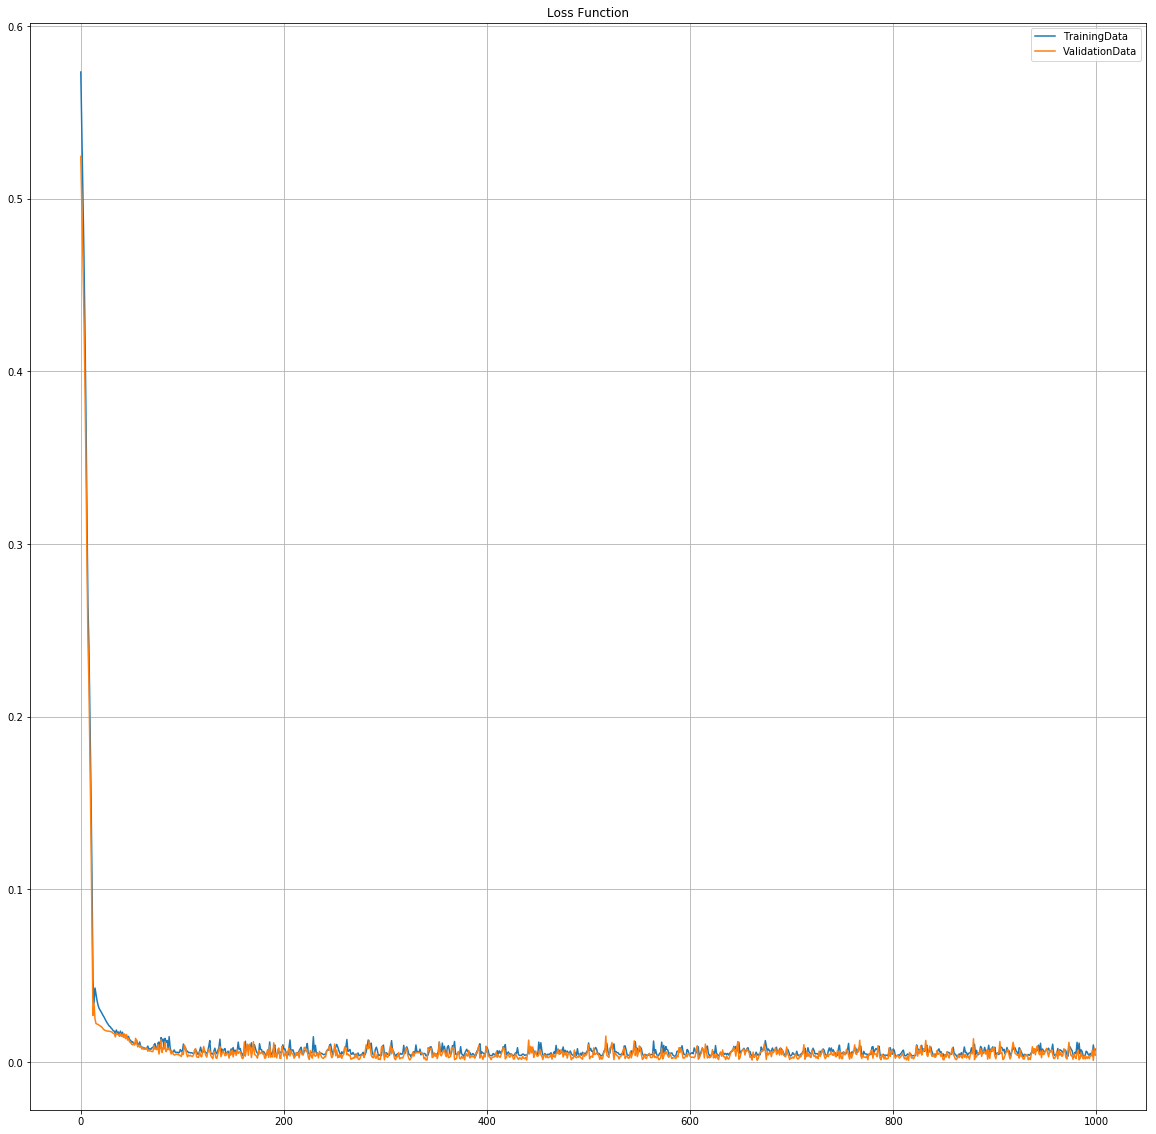

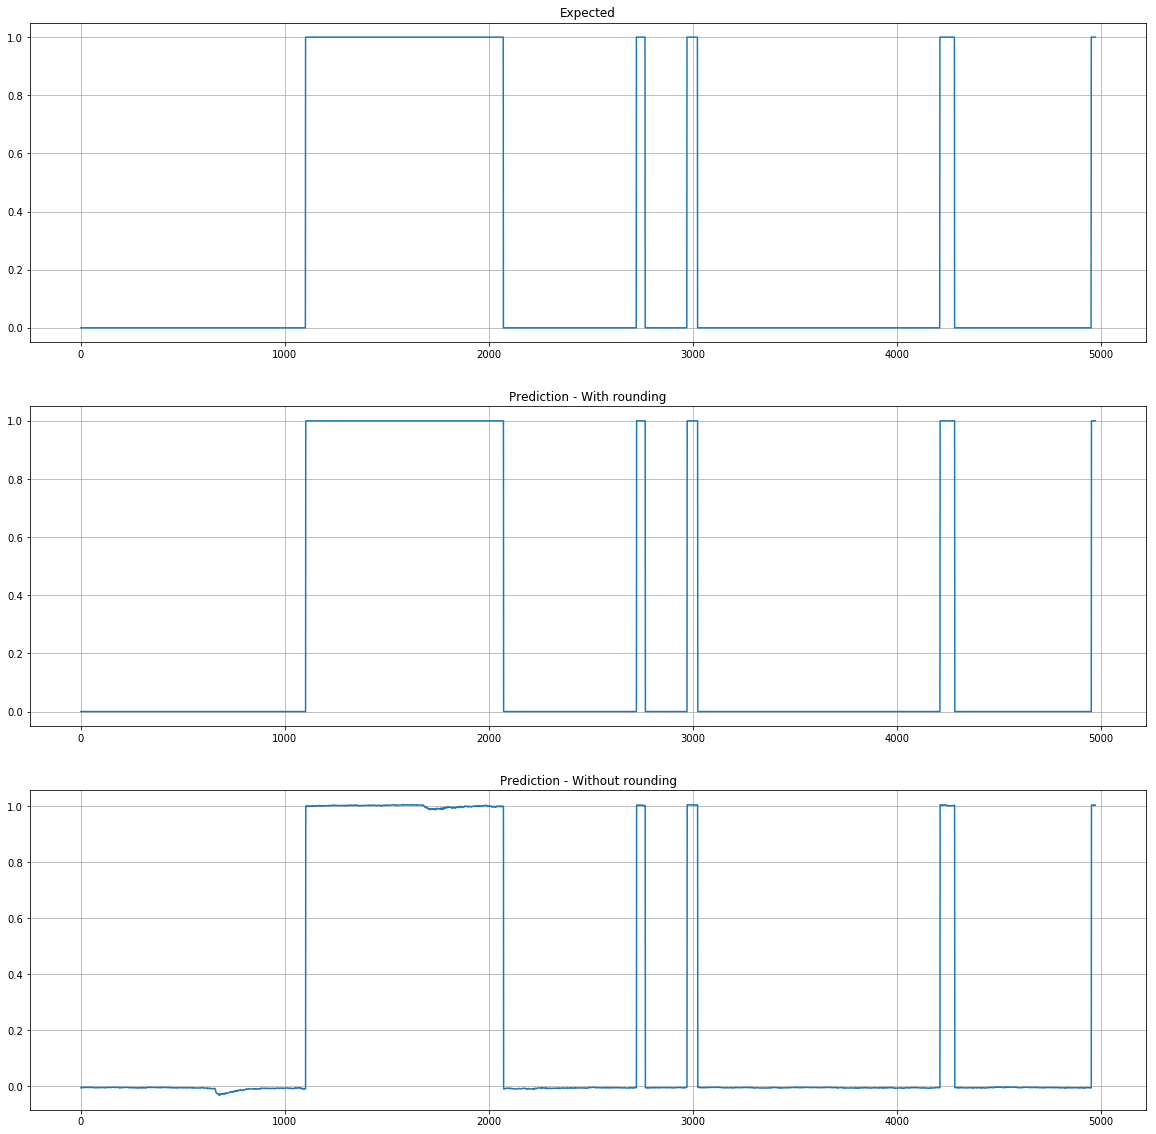

In [90]:
testID = 9
print "TestID: ", testID

###################################
lagValue = 1
epoch = 1000
batch = 500
lstmStack = 5
layerOutDim = 50
dropOut = 0.0
resultsFilename = 'TestResults.txt'
###################################

predictor = LSTMPredictor(testID
                          , trainFilename='EEGEyeState_Training.arff.csv'
                          , testFilename='EEGEyeState_Testing.arff.csv')

tmp = predictor.RemoveOutliers(upperLimit=5000)
predictor.NormalizeData()

predictor.CompileModel(lagCount=lagValue
               , neuronCount=layerOutDim
               , dropOut=dropOut
               , useLaggedOutput=True
               , modelArchitectureFilename='01_modelArchitecture')

validationResults = predictor.FitModel(epochCount=epoch
           , batchSize=batch
           , resultsFile=resultsFilename
           , lossFuncFilePrefix='01_lossFile'
           , predictionFilePrefix='01_predictionFile'
           , verbosity=2)

updateResultsToFile(testID, validationResults)

### Test_10
- Outliers not removed
- Data not normalized
- lagValue = 10
- epoch = 50
- batch = 50
- lstmStack = 1
- layerOutDim = 50
- dropOut = 0.0

TestID:  10
Train on 8000 samples, validate on 2000 samples
Epoch 1/50
 - 2s - loss: 0.5544 - val_loss: 0.5112
Epoch 2/50
 - 1s - loss: 0.5313 - val_loss: 0.5034
Epoch 3/50
 - 1s - loss: 0.5080 - val_loss: 0.4955
Epoch 4/50
 - 1s - loss: 0.4847 - val_loss: 0.4876
Epoch 5/50
 - 1s - loss: 0.4615 - val_loss: 0.4798
Epoch 6/50
 - 1s - loss: 0.4510 - val_loss: 0.4906
Epoch 7/50
 - 1s - loss: 0.4516 - val_loss: 0.4901
Epoch 8/50
 - 1s - loss: 0.4516 - val_loss: 0.4896
Epoch 9/50
 - 1s - loss: 0.4515 - val_loss: 0.4891
Epoch 10/50
 - 1s - loss: 0.4515 - val_loss: 0.4887
Epoch 11/50
 - 1s - loss: 0.4515 - val_loss: 0.4882
Epoch 12/50
 - 1s - loss: 0.4514 - val_loss: 0.4878
Epoch 13/50
 - 1s - loss: 0.4514 - val_loss: 0.4873
Epoch 14/50
 - 1s - loss: 0.4514 - val_loss: 0.4869
Epoch 15/50
 - 1s - loss: 0.4514 - val_loss: 0.4866
Epoch 16/50
 - 1s - loss: 0.4513 - val_loss: 0.4861
Epoch 17/50
 - 1s - loss: 0.4501 - val_loss: 0.4949
Epoch 18/50
 - 1s - loss: 0.4492 - val_loss: 0.4986
Epoch 19/50
 

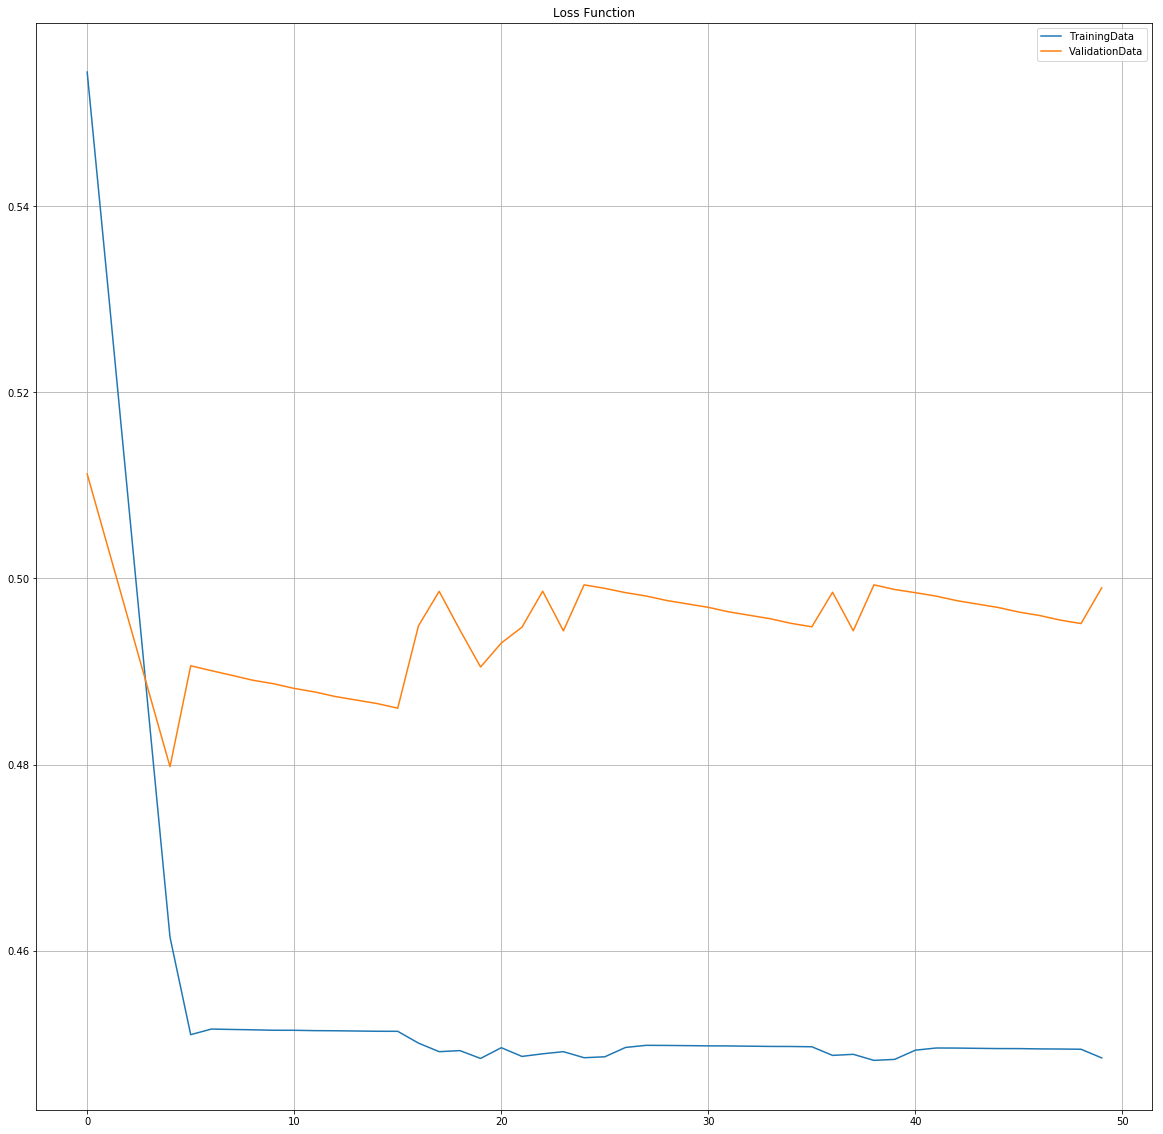

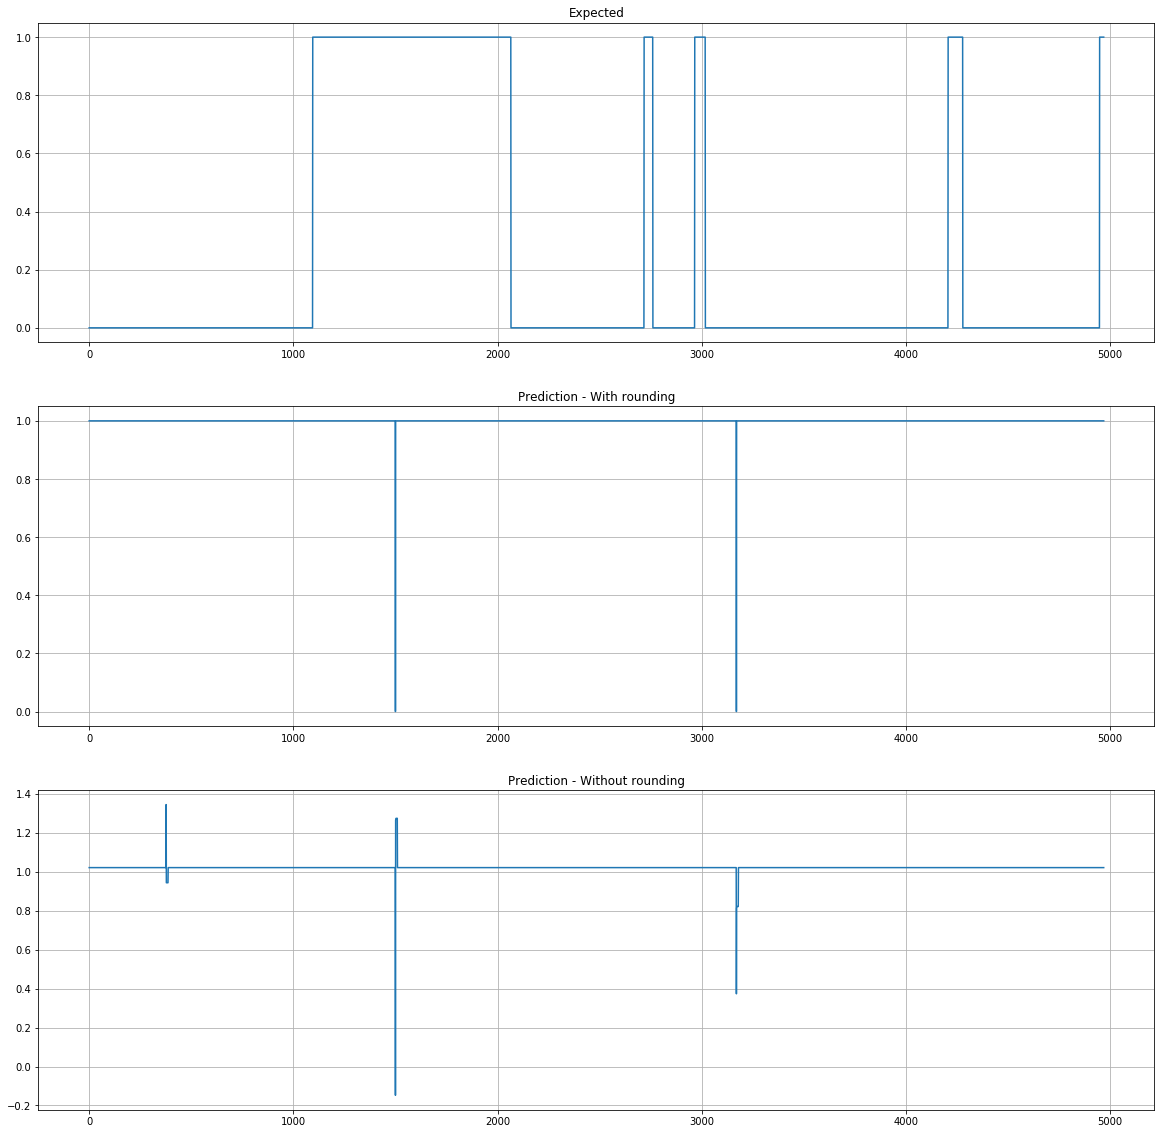

In [91]:
testID = 10
print "TestID: ", testID

###################################
lagValue = 10
epoch = 50
batch = 50
lstmStack = 1
layerOutDim = 50
dropOut = 0.0
resultsFilename = 'TestResults.txt'
###################################

predictor = LSTMPredictor(testID
                          , trainFilename='EEGEyeState_Training.arff.csv'
                          , testFilename='EEGEyeState_Testing.arff.csv')

predictor.CompileModel(lagCount=lagValue
               , neuronCount=layerOutDim
               , dropOut=dropOut
               , useLaggedOutput=True
               , modelArchitectureFilename='01_modelArchitecture')

validationResults = predictor.FitModel(epochCount=epoch
           , batchSize=batch
           , resultsFile=resultsFilename
           , lossFuncFilePrefix='01_lossFile'
           , predictionFilePrefix='01_predictionFile'
           , verbosity=2)

updateResultsToFile(testID, validationResults)

### Test_11
- Outliers not removed
- Data not normalized
- lagValue = 10
- epoch = 1000
- batch = 50
- lstmStack = 1
- layerOutDim = 50
- dropOut = 0.0

TestID:  11
Train on 8000 samples, validate on 2000 samples
Epoch 1/1000
 - 2s - loss: 0.4684 - val_loss: 0.4789
Epoch 2/1000
 - 1s - loss: 0.4555 - val_loss: 0.5028
Epoch 3/1000
 - 1s - loss: 0.4571 - val_loss: 0.5020
Epoch 4/1000
 - 1s - loss: 0.4571 - val_loss: 0.5013
Epoch 5/1000
 - 1s - loss: 0.4571 - val_loss: 0.5006
Epoch 6/1000
 - 1s - loss: 0.4570 - val_loss: 0.4999
Epoch 7/1000
 - 1s - loss: 0.4570 - val_loss: 0.4992
Epoch 8/1000
 - 1s - loss: 0.4570 - val_loss: 0.4985
Epoch 9/1000
 - 1s - loss: 0.4570 - val_loss: 0.4978
Epoch 10/1000
 - 1s - loss: 0.4570 - val_loss: 0.4970
Epoch 11/1000
 - 1s - loss: 0.4570 - val_loss: 0.4965
Epoch 12/1000
 - 1s - loss: 0.4555 - val_loss: 0.5049
Epoch 13/1000
 - 1s - loss: 0.4545 - val_loss: 0.5020
Epoch 14/1000
 - 1s - loss: 0.4547 - val_loss: 0.5072
Epoch 15/1000
 - 1s - loss: 0.4549 - val_loss: 0.5066
Epoch 16/1000
 - 1s - loss: 0.4551 - val_loss: 0.5006
Epoch 17/1000
 - 1s - loss: 0.4567 - val_loss: 0.4954
Epoch 18/1000
 - 1s - loss: 0.4

Epoch 151/1000
 - 1s - loss: 0.4562 - val_loss: 0.5021
Epoch 152/1000
 - 1s - loss: 0.4562 - val_loss: 0.5014
Epoch 153/1000
 - 1s - loss: 0.4549 - val_loss: 0.5067
Epoch 154/1000
 - 1s - loss: 0.4551 - val_loss: 0.5007
Epoch 155/1000
 - 1s - loss: 0.4542 - val_loss: 0.5075
Epoch 156/1000
 - 1s - loss: 0.4544 - val_loss: 0.5068
Epoch 157/1000
 - 1s - loss: 0.4558 - val_loss: 0.5062
Epoch 158/1000
 - 1s - loss: 0.4562 - val_loss: 0.5055
Epoch 159/1000
 - 1s - loss: 0.4561 - val_loss: 0.5050
Epoch 160/1000
 - 1s - loss: 0.4562 - val_loss: 0.5042
Epoch 161/1000
 - 1s - loss: 0.4562 - val_loss: 0.5037
Epoch 162/1000
 - 1s - loss: 0.4562 - val_loss: 0.5029
Epoch 163/1000
 - 1s - loss: 0.4562 - val_loss: 0.5024
Epoch 164/1000
 - 1s - loss: 0.4562 - val_loss: 0.5016
Epoch 165/1000
 - 1s - loss: 0.4549 - val_loss: 0.5069
Epoch 166/1000
 - 1s - loss: 0.4551 - val_loss: 0.5009
Epoch 167/1000
 - 1s - loss: 0.4542 - val_loss: 0.5078
Epoch 168/1000
 - 1s - loss: 0.4544 - val_loss: 0.5070
Epoch 169/

Epoch 300/1000
 - 1s - loss: 0.4551 - val_loss: 0.5006
Epoch 301/1000
 - 1s - loss: 0.4567 - val_loss: 0.4954
Epoch 302/1000
 - 1s - loss: 0.4555 - val_loss: 0.5038
Epoch 303/1000
 - 1s - loss: 0.4545 - val_loss: 0.5009
Epoch 304/1000
 - 1s - loss: 0.4535 - val_loss: 0.4927
Epoch 305/1000
 - 1s - loss: 0.4564 - val_loss: 0.5009
Epoch 306/1000
 - 1s - loss: 0.4570 - val_loss: 0.5001
Epoch 307/1000
 - 1s - loss: 0.4569 - val_loss: 0.4996
Epoch 308/1000
 - 1s - loss: 0.4570 - val_loss: 0.4989
Epoch 309/1000
 - 1s - loss: 0.4569 - val_loss: 0.4983
Epoch 310/1000
 - 1s - loss: 0.4570 - val_loss: 0.4976
Epoch 311/1000
 - 1s - loss: 0.4569 - val_loss: 0.4970
Epoch 312/1000
 - 1s - loss: 0.4570 - val_loss: 0.4963
Epoch 313/1000
 - 1s - loss: 0.4555 - val_loss: 0.5049
Epoch 314/1000
 - 1s - loss: 0.4545 - val_loss: 0.5018
Epoch 315/1000
 - 1s - loss: 0.4547 - val_loss: 0.5072
Epoch 316/1000
 - 1s - loss: 0.4549 - val_loss: 0.5064
Epoch 317/1000
 - 1s - loss: 0.4551 - val_loss: 0.5006
Epoch 318/

Epoch 449/1000
 - 1s - loss: 0.4569 - val_loss: 0.4970
Epoch 450/1000
 - 1s - loss: 0.4570 - val_loss: 0.4963
Epoch 451/1000
 - 1s - loss: 0.4555 - val_loss: 0.5049
Epoch 452/1000
 - 1s - loss: 0.4545 - val_loss: 0.5019
Epoch 453/1000
 - 1s - loss: 0.4547 - val_loss: 0.5072
Epoch 454/1000
 - 1s - loss: 0.4549 - val_loss: 0.5065
Epoch 455/1000
 - 1s - loss: 0.4551 - val_loss: 0.5006
Epoch 456/1000
 - 1s - loss: 0.4567 - val_loss: 0.4952
Epoch 457/1000
 - 1s - loss: 0.4554 - val_loss: 0.5039
Epoch 458/1000
 - 1s - loss: 0.4545 - val_loss: 0.5008
Epoch 459/1000
 - 1s - loss: 0.4576 - val_loss: 0.4874
Epoch 460/1000
 - 1s - loss: 0.4561 - val_loss: 0.4996
Epoch 461/1000
 - 1s - loss: 0.4548 - val_loss: 0.5049
Epoch 462/1000
 - 1s - loss: 0.4540 - val_loss: 0.4991
Epoch 463/1000
 - 1s - loss: 0.4569 - val_loss: 0.4936
Epoch 464/1000
 - 1s - loss: 0.4554 - val_loss: 0.5021
Epoch 465/1000
 - 1s - loss: 0.4543 - val_loss: 0.5044
Epoch 466/1000
 - 1s - loss: 0.4545 - val_loss: 0.4985
Epoch 467/

Epoch 598/1000
 - 1s - loss: 0.4561 - val_loss: 0.4996
Epoch 599/1000
 - 1s - loss: 0.4548 - val_loss: 0.5049
Epoch 600/1000
 - 1s - loss: 0.4540 - val_loss: 0.4991
Epoch 601/1000
 - 1s - loss: 0.4569 - val_loss: 0.4937
Epoch 602/1000
 - 1s - loss: 0.4554 - val_loss: 0.5021
Epoch 603/1000
 - 2s - loss: 0.4543 - val_loss: 0.5045
Epoch 604/1000
 - 2s - loss: 0.4545 - val_loss: 0.4985
Epoch 605/1000
 - 2s - loss: 0.4561 - val_loss: 0.4979
Epoch 606/1000
 - 2s - loss: 0.4548 - val_loss: 0.5031
Epoch 607/1000
 - 1s - loss: 0.4540 - val_loss: 0.4975
Epoch 608/1000
 - 1s - loss: 0.4570 - val_loss: 0.4964
Epoch 609/1000
 - 1s - loss: 0.4578 - val_loss: 0.4959
Epoch 610/1000
 - 1s - loss: 0.4579 - val_loss: 0.4952
Epoch 611/1000
 - 1s - loss: 0.4579 - val_loss: 0.4946
Epoch 612/1000
 - 1s - loss: 0.4579 - val_loss: 0.4939
Epoch 613/1000
 - 1s - loss: 0.4579 - val_loss: 0.4933
Epoch 614/1000
 - 1s - loss: 0.4579 - val_loss: 0.4926
Epoch 615/1000
 - 1s - loss: 0.4579 - val_loss: 0.4920
Epoch 616/

Epoch 747/1000
 - 2s - loss: 0.4569 - val_loss: 0.4936
Epoch 748/1000
 - 2s - loss: 0.4554 - val_loss: 0.5021
Epoch 749/1000
 - 1s - loss: 0.4543 - val_loss: 0.5044
Epoch 750/1000
 - 1s - loss: 0.4545 - val_loss: 0.4984
Epoch 751/1000
 - 1s - loss: 0.4561 - val_loss: 0.4979
Epoch 752/1000
 - 1s - loss: 0.4548 - val_loss: 0.5031
Epoch 753/1000
 - 1s - loss: 0.4540 - val_loss: 0.4975
Epoch 754/1000
 - 1s - loss: 0.4570 - val_loss: 0.4964
Epoch 755/1000
 - 1s - loss: 0.4578 - val_loss: 0.4958
Epoch 756/1000
 - 1s - loss: 0.4579 - val_loss: 0.4951
Epoch 757/1000
 - 1s - loss: 0.4579 - val_loss: 0.4946
Epoch 758/1000
 - 1s - loss: 0.4579 - val_loss: 0.4938
Epoch 759/1000
 - 2s - loss: 0.4579 - val_loss: 0.4933
Epoch 760/1000
 - 2s - loss: 0.4579 - val_loss: 0.4926
Epoch 761/1000
 - 3s - loss: 0.4579 - val_loss: 0.4920
Epoch 762/1000
 - 2s - loss: 0.4579 - val_loss: 0.4913
Epoch 763/1000
 - 1s - loss: 0.4579 - val_loss: 0.4907
Epoch 764/1000
 - 1s - loss: 0.4579 - val_loss: 0.4900
Epoch 765/

Epoch 896/1000
 - 1s - loss: 0.4579 - val_loss: 0.4939
Epoch 897/1000
 - 1s - loss: 0.4579 - val_loss: 0.4933
Epoch 898/1000
 - 1s - loss: 0.4579 - val_loss: 0.4926
Epoch 899/1000
 - 1s - loss: 0.4579 - val_loss: 0.4920
Epoch 900/1000
 - 1s - loss: 0.4579 - val_loss: 0.4913
Epoch 901/1000
 - 1s - loss: 0.4579 - val_loss: 0.4907
Epoch 902/1000
 - 1s - loss: 0.4579 - val_loss: 0.4900
Epoch 903/1000
 - 1s - loss: 0.4579 - val_loss: 0.4895
Epoch 904/1000
 - 1s - loss: 0.4562 - val_loss: 0.5016
Epoch 905/1000
 - 1s - loss: 0.4549 - val_loss: 0.5069
Epoch 906/1000
 - 1s - loss: 0.4551 - val_loss: 0.5009
Epoch 907/1000
 - 1s - loss: 0.4542 - val_loss: 0.5077
Epoch 908/1000
 - 1s - loss: 0.4544 - val_loss: 0.5070
Epoch 909/1000
 - 1s - loss: 0.4558 - val_loss: 0.5065
Epoch 910/1000
 - 1s - loss: 0.4562 - val_loss: 0.5057
Epoch 911/1000
 - 1s - loss: 0.4561 - val_loss: 0.5052
Epoch 912/1000
 - 1s - loss: 0.4562 - val_loss: 0.5045
Epoch 913/1000
 - 1s - loss: 0.4562 - val_loss: 0.5039
Epoch 914/

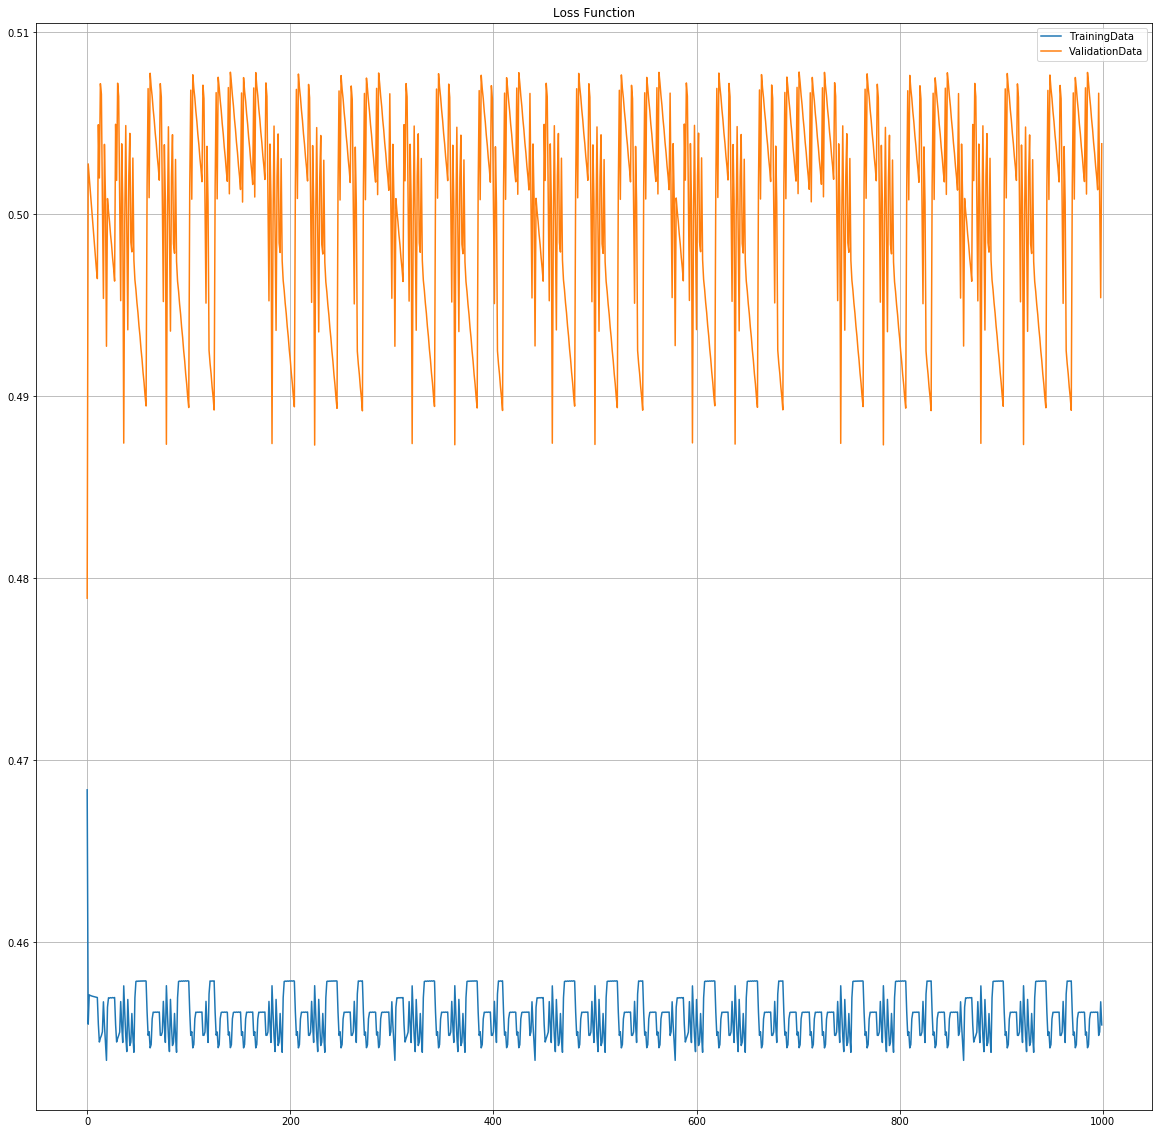

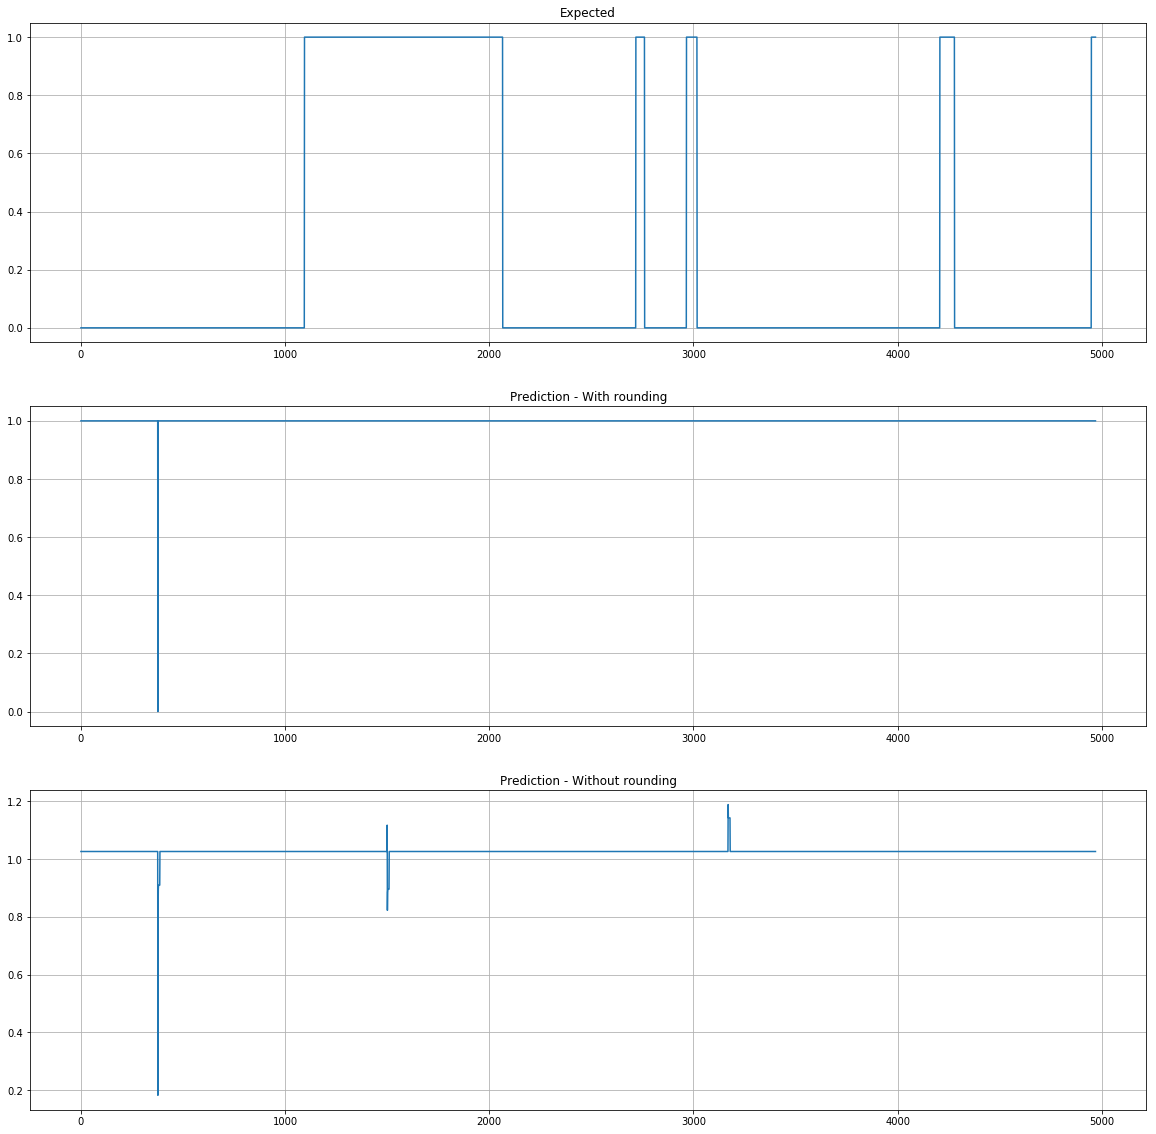

In [92]:
testID = 11
print "TestID: ", testID

###################################
lagValue = 10
epoch = 1000
batch = 50
lstmStack = 1
layerOutDim = 50
dropOut = 0.0
resultsFilename = 'TestResults.txt'
###################################

predictor = LSTMPredictor(testID
                          , trainFilename='EEGEyeState_Training.arff.csv'
                          , testFilename='EEGEyeState_Testing.arff.csv')

predictor.CompileModel(lagCount=lagValue
               , neuronCount=layerOutDim
               , dropOut=dropOut
               , useLaggedOutput=True
               , modelArchitectureFilename='01_modelArchitecture')

validationResults = predictor.FitModel(epochCount=epoch
           , batchSize=batch
           , resultsFile=resultsFilename
           , lossFuncFilePrefix='01_lossFile'
           , predictionFilePrefix='01_predictionFile'
           , verbosity=2)

updateResultsToFile(testID, validationResults)

### Test_12
- Outliers not removed
- Data not normalized
- lagValue = 10
- epoch = 1000
- batch = 50
- lstmStack = 5
- layerOutDim = 50
- dropOut = 0.0

TestID:  12
Train on 8000 samples, validate on 2000 samples
Epoch 1/1000
 - 2s - loss: 0.5249 - val_loss: 0.4987
Epoch 2/1000
 - 1s - loss: 0.4932 - val_loss: 0.4885
Epoch 3/1000
 - 1s - loss: 0.4628 - val_loss: 0.4782
Epoch 4/1000
 - 1s - loss: 0.4537 - val_loss: 0.5044
Epoch 5/1000
 - 1s - loss: 0.4545 - val_loss: 0.5038
Epoch 6/1000
 - 1s - loss: 0.4545 - val_loss: 0.5031
Epoch 7/1000
 - 1s - loss: 0.4544 - val_loss: 0.5025
Epoch 8/1000
 - 1s - loss: 0.4544 - val_loss: 0.5019
Epoch 9/1000
 - 1s - loss: 0.4544 - val_loss: 0.5012
Epoch 10/1000
 - 1s - loss: 0.4543 - val_loss: 0.5006
Epoch 11/1000
 - 1s - loss: 0.4543 - val_loss: 0.4999
Epoch 12/1000
 - 1s - loss: 0.4531 - val_loss: 0.5048
Epoch 13/1000
 - 1s - loss: 0.4532 - val_loss: 0.4993
Epoch 14/1000
 - 1s - loss: 0.4524 - val_loss: 0.5056
Epoch 15/1000
 - 1s - loss: 0.4525 - val_loss: 0.5050
Epoch 16/1000
 - 1s - loss: 0.4538 - val_loss: 0.5044
Epoch 17/1000
 - 1s - loss: 0.4541 - val_loss: 0.5038
Epoch 18/1000
 - 1s - loss: 0.4

Epoch 151/1000
 - 1s - loss: 0.4534 - val_loss: 0.5038
Epoch 152/1000
 - 1s - loss: 0.4537 - val_loss: 0.5032
Epoch 153/1000
 - 1s - loss: 0.4534 - val_loss: 0.4989
Epoch 154/1000
 - 1s - loss: 0.4520 - val_loss: 0.5010
Epoch 155/1000
 - 1s - loss: 0.4520 - val_loss: 0.4994
Epoch 156/1000
 - 1s - loss: 0.4512 - val_loss: 0.4918
Epoch 157/1000
 - 1s - loss: 0.4536 - val_loss: 0.4972
Epoch 158/1000
 - 1s - loss: 0.4525 - val_loss: 0.5022
Epoch 159/1000
 - 1s - loss: 0.4516 - val_loss: 0.5008
Epoch 160/1000
 - 1s - loss: 0.4529 - val_loss: 0.5042
Epoch 161/1000
 - 1s - loss: 0.4527 - val_loss: 0.4984
Epoch 162/1000
 - 1s - loss: 0.4529 - val_loss: 0.5020
Epoch 163/1000
 - 1s - loss: 0.4520 - val_loss: 0.5032
Epoch 164/1000
 - 1s - loss: 0.4521 - val_loss: 0.4977
Epoch 165/1000
 - 2s - loss: 0.4533 - val_loss: 0.5010
Epoch 166/1000
 - 2s - loss: 0.4537 - val_loss: 0.5004
Epoch 167/1000
 - 2s - loss: 0.4534 - val_loss: 0.5038
Epoch 168/1000
 - 1s - loss: 0.4537 - val_loss: 0.5032
Epoch 169/

Epoch 300/1000
 - 1s - loss: 0.4512 - val_loss: 0.4919
Epoch 301/1000
 - 1s - loss: 0.4536 - val_loss: 0.4973
Epoch 302/1000
 - 1s - loss: 0.4525 - val_loss: 0.5022
Epoch 303/1000
 - 1s - loss: 0.4516 - val_loss: 0.5008
Epoch 304/1000
 - 2s - loss: 0.4529 - val_loss: 0.5042
Epoch 305/1000
 - 2s - loss: 0.4527 - val_loss: 0.4984
Epoch 306/1000
 - 2s - loss: 0.4529 - val_loss: 0.5020
Epoch 307/1000
 - 2s - loss: 0.4520 - val_loss: 0.5032
Epoch 308/1000
 - 1s - loss: 0.4521 - val_loss: 0.4977
Epoch 309/1000
 - 1s - loss: 0.4533 - val_loss: 0.5010
Epoch 310/1000
 - 1s - loss: 0.4537 - val_loss: 0.5005
Epoch 311/1000
 - 1s - loss: 0.4534 - val_loss: 0.5038
Epoch 312/1000
 - 1s - loss: 0.4537 - val_loss: 0.5032
Epoch 313/1000
 - 1s - loss: 0.4534 - val_loss: 0.4989
Epoch 314/1000
 - 1s - loss: 0.4520 - val_loss: 0.5010
Epoch 315/1000
 - 1s - loss: 0.4520 - val_loss: 0.4994
Epoch 316/1000
 - 1s - loss: 0.4512 - val_loss: 0.4919
Epoch 317/1000
 - 1s - loss: 0.4536 - val_loss: 0.4973
Epoch 318/

Epoch 449/1000
 - 1s - loss: 0.4527 - val_loss: 0.4984
Epoch 450/1000
 - 1s - loss: 0.4529 - val_loss: 0.5021
Epoch 451/1000
 - 1s - loss: 0.4520 - val_loss: 0.5032
Epoch 452/1000
 - 1s - loss: 0.4521 - val_loss: 0.4977
Epoch 453/1000
 - 1s - loss: 0.4533 - val_loss: 0.5011
Epoch 454/1000
 - 2s - loss: 0.4537 - val_loss: 0.5005
Epoch 455/1000
 - 2s - loss: 0.4534 - val_loss: 0.5038
Epoch 456/1000
 - 2s - loss: 0.4537 - val_loss: 0.5032
Epoch 457/1000
 - 2s - loss: 0.4534 - val_loss: 0.4989
Epoch 458/1000
 - 2s - loss: 0.4520 - val_loss: 0.5010
Epoch 459/1000
 - 1s - loss: 0.4520 - val_loss: 0.4994
Epoch 460/1000
 - 1s - loss: 0.4512 - val_loss: 0.4919
Epoch 461/1000
 - 1s - loss: 0.4536 - val_loss: 0.4973
Epoch 462/1000
 - 1s - loss: 0.4525 - val_loss: 0.5022
Epoch 463/1000
 - 1s - loss: 0.4516 - val_loss: 0.5008
Epoch 464/1000
 - 1s - loss: 0.4529 - val_loss: 0.5042
Epoch 465/1000
 - 1s - loss: 0.4527 - val_loss: 0.4984
Epoch 466/1000
 - 1s - loss: 0.4529 - val_loss: 0.5021
Epoch 467/

Epoch 598/1000
 - 1s - loss: 0.4537 - val_loss: 0.5005
Epoch 599/1000
 - 1s - loss: 0.4534 - val_loss: 0.5039
Epoch 600/1000
 - 1s - loss: 0.4537 - val_loss: 0.5033
Epoch 601/1000
 - 1s - loss: 0.4534 - val_loss: 0.4989
Epoch 602/1000
 - 1s - loss: 0.4520 - val_loss: 0.5011
Epoch 603/1000
 - 1s - loss: 0.4520 - val_loss: 0.4995
Epoch 604/1000
 - 1s - loss: 0.4512 - val_loss: 0.4919
Epoch 605/1000
 - 1s - loss: 0.4536 - val_loss: 0.4973
Epoch 606/1000
 - 1s - loss: 0.4525 - val_loss: 0.5022
Epoch 607/1000
 - 1s - loss: 0.4516 - val_loss: 0.5009
Epoch 608/1000
 - 1s - loss: 0.4529 - val_loss: 0.5043
Epoch 609/1000
 - 1s - loss: 0.4527 - val_loss: 0.4985
Epoch 610/1000
 - 1s - loss: 0.4529 - val_loss: 0.5021
Epoch 611/1000
 - 1s - loss: 0.4520 - val_loss: 0.5032
Epoch 612/1000
 - 1s - loss: 0.4521 - val_loss: 0.4977
Epoch 613/1000
 - 1s - loss: 0.4533 - val_loss: 0.5011
Epoch 614/1000
 - 1s - loss: 0.4537 - val_loss: 0.5005
Epoch 615/1000
 - 1s - loss: 0.4534 - val_loss: 0.5039
Epoch 616/

Epoch 747/1000
 - 1s - loss: 0.4520 - val_loss: 0.4995
Epoch 748/1000
 - 1s - loss: 0.4512 - val_loss: 0.4919
Epoch 749/1000
 - 1s - loss: 0.4536 - val_loss: 0.4973
Epoch 750/1000
 - 1s - loss: 0.4525 - val_loss: 0.5022
Epoch 751/1000
 - 1s - loss: 0.4516 - val_loss: 0.5009
Epoch 752/1000
 - 1s - loss: 0.4529 - val_loss: 0.5043
Epoch 753/1000
 - 1s - loss: 0.4527 - val_loss: 0.4985
Epoch 754/1000
 - 1s - loss: 0.4529 - val_loss: 0.5021
Epoch 755/1000
 - 1s - loss: 0.4520 - val_loss: 0.5032
Epoch 756/1000
 - 1s - loss: 0.4521 - val_loss: 0.4977
Epoch 757/1000
 - 1s - loss: 0.4533 - val_loss: 0.5011
Epoch 758/1000
 - 1s - loss: 0.4537 - val_loss: 0.5005
Epoch 759/1000
 - 1s - loss: 0.4534 - val_loss: 0.5039
Epoch 760/1000
 - 1s - loss: 0.4537 - val_loss: 0.5033
Epoch 761/1000
 - 1s - loss: 0.4534 - val_loss: 0.4990
Epoch 762/1000
 - 1s - loss: 0.4520 - val_loss: 0.5011
Epoch 763/1000
 - 1s - loss: 0.4520 - val_loss: 0.4995
Epoch 764/1000
 - 1s - loss: 0.4512 - val_loss: 0.4919
Epoch 765/

Epoch 896/1000
 - 1s - loss: 0.4545 - val_loss: 0.4948
Epoch 897/1000
 - 1s - loss: 0.4550 - val_loss: 0.4939
Epoch 898/1000
 - 1s - loss: 0.4530 - val_loss: 0.5019
Epoch 899/1000
 - 1s - loss: 0.4520 - val_loss: 0.5030
Epoch 900/1000
 - 1s - loss: 0.4521 - val_loss: 0.4975
Epoch 901/1000
 - 1s - loss: 0.4534 - val_loss: 0.5009
Epoch 902/1000
 - 1s - loss: 0.4537 - val_loss: 0.5003
Epoch 903/1000
 - 1s - loss: 0.4522 - val_loss: 0.4987
Epoch 904/1000
 - 2s - loss: 0.4536 - val_loss: 0.4981
Epoch 905/1000
 - 2s - loss: 0.4523 - val_loss: 0.5069
Epoch 906/1000
 - 2s - loss: 0.4525 - val_loss: 0.5063
Epoch 907/1000
 - 2s - loss: 0.4522 - val_loss: 0.4992
Epoch 908/1000
 - 1s - loss: 0.4551 - val_loss: 0.4866
Epoch 909/1000
 - 1s - loss: 0.4534 - val_loss: 0.5020
Epoch 910/1000
 - 1s - loss: 0.4537 - val_loss: 0.5014
Epoch 911/1000
 - 1s - loss: 0.4535 - val_loss: 0.5047
Epoch 912/1000
 - 1s - loss: 0.4537 - val_loss: 0.5042
Epoch 913/1000
 - 1s - loss: 0.4534 - val_loss: 0.4998
Epoch 914/

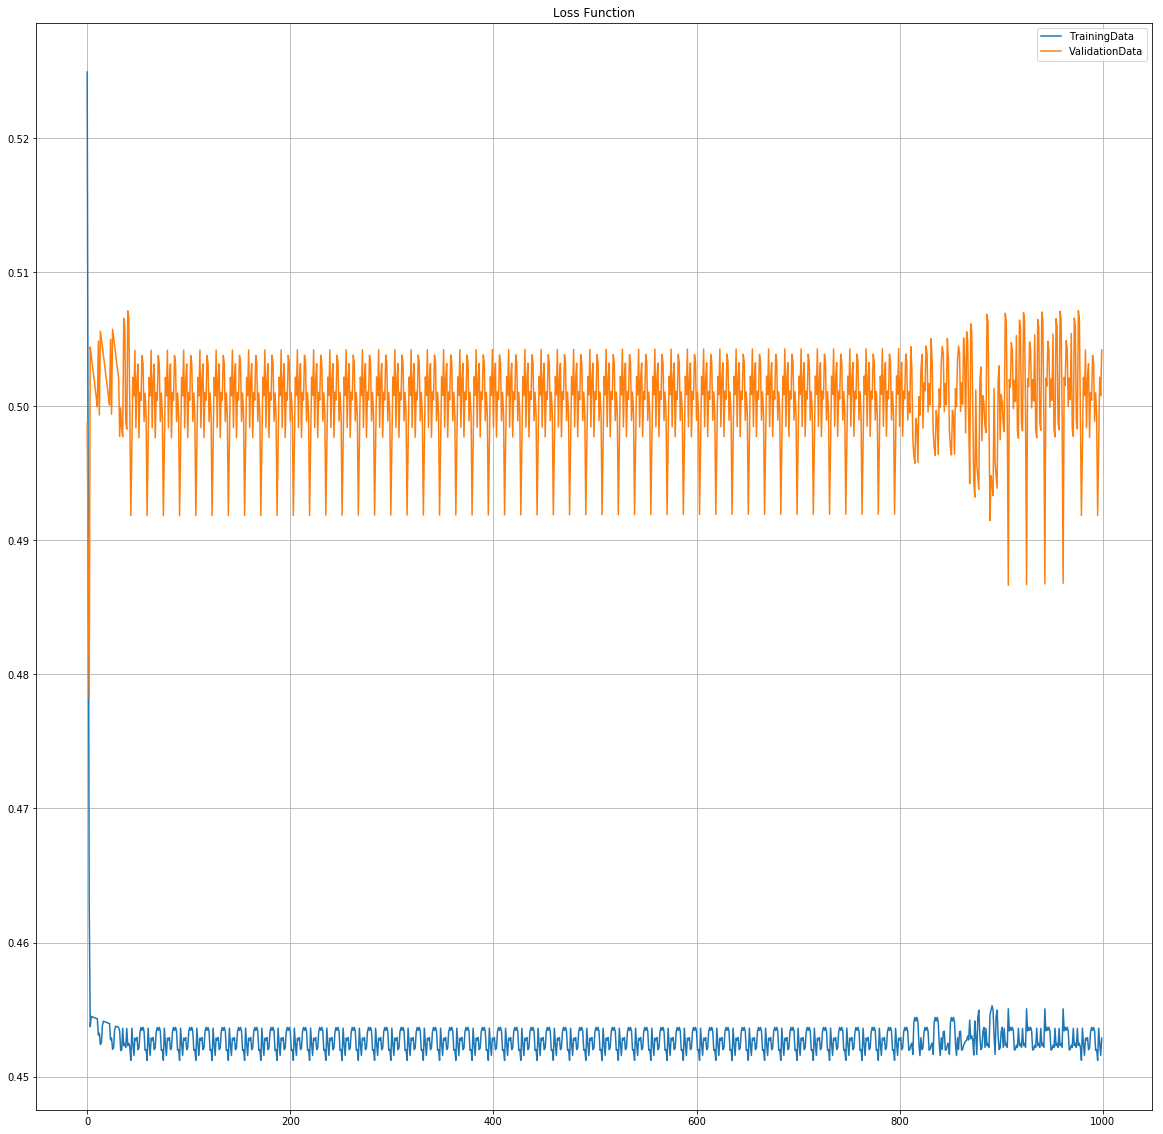

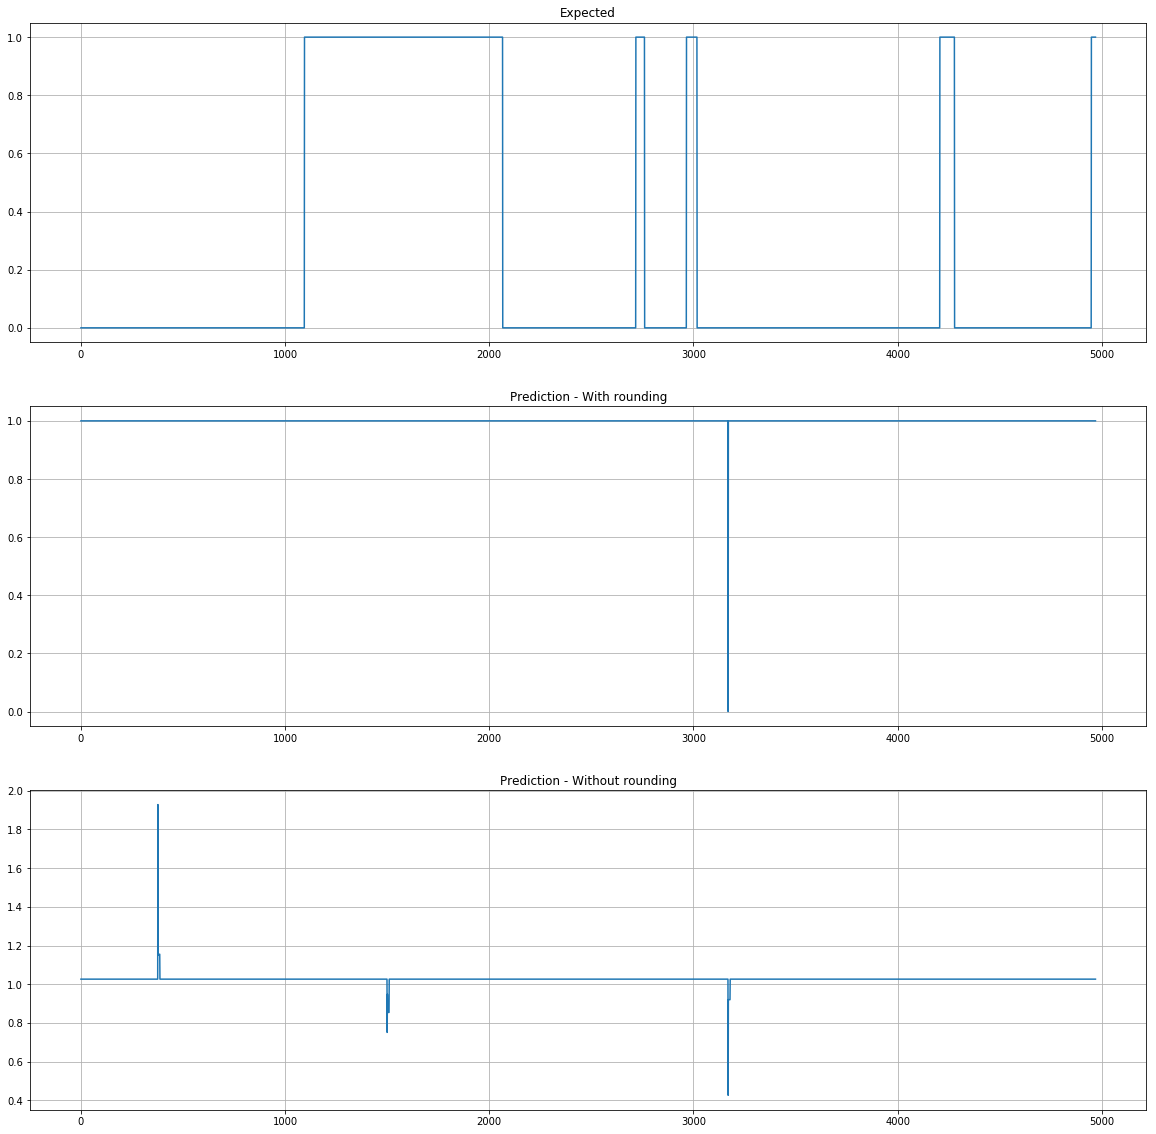

In [94]:
testID = 12
print "TestID: ", testID

###################################
lagValue = 10
epoch = 1000
batch = 50
lstmStack = 5
layerOutDim = 50
dropOut = 0.0
resultsFilename = 'TestResults.txt'
###################################

predictor = LSTMPredictor(testID
                          , trainFilename='EEGEyeState_Training.arff.csv'
                          , testFilename='EEGEyeState_Testing.arff.csv')

predictor.CompileModel(lagCount=lagValue
               , neuronCount=layerOutDim
               , dropOut=dropOut
               , useLaggedOutput=True
               , modelArchitectureFilename='01_modelArchitecture')

validationResults = predictor.FitModel(epochCount=epoch
           , batchSize=batch
           , resultsFile=resultsFilename
           , lossFuncFilePrefix='01_lossFile'
           , predictionFilePrefix='01_predictionFile'
           , verbosity=2)

updateResultsToFile(testID, validationResults)